 # 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("C:/Users/wkdgu/권철민 머신러닝/실습파일/4장/train_santander.csv", encoding='latin-1')
print(cust_df.shape)
cust_df
# TARGET =  0 : 만족한 고객, TARGET = 1 : 불만족 고객이다.
# 이 데이터는 null값은 없는 데이터이다.
# 은행의 고객정보 데이터이기 때문에 인코딩이 되어있다.
# 컬럼명이 스페인어 약자이며 봐도 알 수 없다.

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [2]:
# shape로 나오는 객체는 튜플이다.
type(cust_df[cust_df['TARGET'] == 1].shape)

tuple

In [3]:
# TARGET = 1인 고객의 수를 세어본다. (불만족 고객의 수)
print(cust_df[cust_df['TARGET'] == 1].shape)
print("")
print("불만족 고객의 수 :", cust_df[cust_df['TARGET'] == 1].shape[0])

(3008, 371)

불만족 고객의 수 : 3008


In [4]:
print(cust_df[cust_df['TARGET'] == 1].TARGET.count())

3008


In [5]:
# 73,012명이 만족, 3,008명의 고객이 불만족함
cust_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [6]:
# unsatisfied_cnt에 불만족한 고객의 수를 담아줍니다. 
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].shape[0]
unsatisfied_cnt

3008

In [7]:
# total_cnt에 전체 고객의 수를 담아줍니다.
total_cnt = cust_df['TARGET'].shape[0]
total_cnt

76020

In [8]:
# 전체 고객중에서 불만족한 고객의 비율을 구합니다.
print("불만족한 고객의 비율은 {0: 0.2f}".format(unsatisfied_cnt / total_cnt))

불만족한 고객의 비율은  0.04


In [9]:
# var3의 min값이 이상치인 것을 확인합니다.
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
# 머신러닝 모델이 영항을 줄 수 있는 이상치인 var3의 -999999값을 2로 대체합니다.
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [11]:
# replace()로 -999999를 2로 대체합니다.
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df['var3'].value_counts()

2      74281
8        138
9        110
3        108
1        105
       ...  
231        1
188        1
168        1
135        1
87         1
Name: var3, Length: 207, dtype: int64

In [12]:
# cust_df에서 쓸모없는 'ID'칼럼을 제거합니다. 
cust_df.drop('ID', axis = 1, inplace = True)
cust_df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [13]:
# .iloc로 피처 세트와 레이블 세트분리합니다.
X_features = cust_df.iloc[:, :-1]
y_lables = cust_df.iloc[:, -1]
display(X_features)
print("")
print(y_lables)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000



0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

# stratify = y_lables로 줘야 stratified k폴드 방식으로 수행합니다.
# stratified k폴드 : 불균형한 분포도를 가진 레이블(결정 클래스) 데이터를 위한 k폴드 방식
# 학습 데이터세트와 검증 or 테스트 데이터세트가 가지는 레이블 분포도가 유사하도록 만들어줌 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables,
                                                   test_size = 0.2, random_state = 0, stratify = y_lables)

In [15]:
print("train 데이터 셋의 행 개수 :", y_train.count())
print("test 데이터 셋의 행 개수 : ", y_test.count())

train 데이터 셋의 행 개수 : 60816
test 데이터 셋의 행 개수 :  15204


In [16]:
# train_cnt은 train 데이터 셋의 행 개수입니다.
# test_cnt은 test 데이터 셋의 행 개수입니다. 
train_cnt = y_train.count()
test_cnt = y_test.count()
print(train_cnt)
print(test_cnt)

60816
15204


In [17]:
y_train.value_counts()

0    58410
1     2406
Name: TARGET, dtype: int64

In [18]:
# train_cnt은 train 데이터 셋의 행 개수입니다.
train_cnt

60816

In [19]:
# y_train에서 값 분포 비율
y_train.value_counts()/train_cnt

0    0.960438
1    0.039562
Name: TARGET, dtype: float64

In [20]:
# test_cnt은 test 데이터 셋의 행 개수입니다. 
test_cnt

15204

In [21]:
# y_test에서 값 분포 비율
y_test.value_counts()/test_cnt

0    0.960405
1    0.039595
Name: TARGET, dtype: float64

In [22]:
# 검증을 위해 train데이터를 tr과 val로 분리합니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3,
                                           random_state = 0)

# XGBoost 모델 학습과 하이퍼 파라미터 튜닝

 ## 하이퍼 파라미터 튜닝을 하지 않은 XGBoost

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05,
                              random_state = 156)

In [24]:
# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_val, y_val)])

[0]	validation_0-auc:0.80088
[1]	validation_0-auc:0.80089
[2]	validation_0-auc:0.80303
[3]	validation_0-auc:0.80251
[4]	validation_0-auc:0.80252
[5]	validation_0-auc:0.80237
[6]	validation_0-auc:0.80673
[7]	validation_0-auc:0.80660
[8]	validation_0-auc:0.80861
[9]	validation_0-auc:0.80920
[10]	validation_0-auc:0.80930
[11]	validation_0-auc:0.80985
[12]	validation_0-auc:0.81022
[13]	validation_0-auc:0.81036
[14]	validation_0-auc:0.81059
[15]	validation_0-auc:0.81081
[16]	validation_0-auc:0.81093
[17]	validation_0-auc:0.81394
[18]	validation_0-auc:0.81460
[19]	validation_0-auc:0.81485
[20]	validation_0-auc:0.81529
[21]	validation_0-auc:0.81509
[22]	validation_0-auc:0.81484
[23]	validation_0-auc:0.81598
[24]	validation_0-auc:0.81619
[25]	validation_0-auc:0.81746
[26]	validation_0-auc:0.81753
[27]	validation_0-auc:0.81816
[28]	validation_0-auc:0.81833
[29]	validation_0-auc:0.81989
[30]	validation_0-auc:0.82003
[31]	validation_0-auc:0.82018
[32]	validation_0-auc:0.82068
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
# roc_auc_score(y_true, y_score)
# y_true : 실제 클래스값 array(보통 "y_test" 형식으로 들어감)
# y_score : predict_prob()의 반환 값 array에서 Positive 칼럼의 예측확률이 보통 사용됨
# 반환값을 Auc 스코어 값입니다.
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
xgb_roc_score

# 하이퍼 파라미터 튜닝을 하지 않은 XGBosst의 결과값

0.8223594160177394

 ## hyperopt로 하이퍼 파라미터 튜닝을 한 XGBoost

In [26]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 15, 1), 
                   'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                   'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)}

In [27]:
# cross_val_score()은 XGBoost에서 early_stopping이 적용이 안됨
# 그래서 KFold 방식을 써줌
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환. 
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           colsample_bytree = search_space['colsample_bytree'],
                           learning_rate = search_space['learning_rate'])
    
    # 3개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 roc_auc 지표를 담을 list 생성.
    roc_auc_list = []
    kf = KFold(n_splits = 3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        # eval_metric : 반복수행시 사용하는 비용 평가 지표 
        # eval_set : 평가를 수행하는 별도의 검증 데이터 세트
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                   eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        # roc_auc_score(y_true, y_score)
        # y_true : 실제 클래스 값 array
        # y_score : predict_proba()의 반환 값array에서 Positive 칼럼의 예측 확률
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
        # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
        # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
        return -1*np.mean(roc_auc_list)
            

In [28]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn = objective_func,
           space = xgb_search_space,
           algo = tpe.suggest,
           max_evals = 50, # 최대 반복 횟수를 지정합니다.
           trials = trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.82975	validation_1-auc:0.81182                                                                  
[1]	validation_0-auc:0.83251	validation_1-auc:0.81290                                                                  
[2]	validation_0-auc:0.83538	validation_1-auc:0.81428                                                                  
[3]	validation_0-auc:0.84001	validation_1-auc:0.81700                                                                  
[4]	validation_0-auc:0.84285	validation_1-auc:0.81478                                                                  
[5]	validation_0-auc:0.84487	validation_1-auc:0.81854                                                                  
[6]	validation_0-auc:0.84532	validation_1-auc:0.81862                                                                  
[7]	validation_0-auc:0.84655	validation_1-auc:0.81942                                                                  
[8]	validation_0-auc:0.84825	validation_

[68]	validation_0-auc:0.89606	validation_1-auc:0.84429                                                                 
[69]	validation_0-auc:0.89639	validation_1-auc:0.84433                                                                 
[70]	validation_0-auc:0.89655	validation_1-auc:0.84430                                                                 
[71]	validation_0-auc:0.89728	validation_1-auc:0.84431                                                                 
[72]	validation_0-auc:0.89750	validation_1-auc:0.84417                                                                 
[73]	validation_0-auc:0.89817	validation_1-auc:0.84405                                                                 
[74]	validation_0-auc:0.89849	validation_1-auc:0.84395                                                                 
[75]	validation_0-auc:0.89867	validation_1-auc:0.84396                                                                 
[76]	validation_0-auc:0.89879	validation

[41]	validation_0-auc:0.89702	validation_1-auc:0.83741                                                                 
[42]	validation_0-auc:0.89811	validation_1-auc:0.83818                                                                 
[43]	validation_0-auc:0.89837	validation_1-auc:0.83856                                                                 
[44]	validation_0-auc:0.89969	validation_1-auc:0.83898                                                                 
[45]	validation_0-auc:0.90030	validation_1-auc:0.83963                                                                 
[46]	validation_0-auc:0.90109	validation_1-auc:0.83982                                                                 
[47]	validation_0-auc:0.90221	validation_1-auc:0.84004                                                                 
[48]	validation_0-auc:0.90306	validation_1-auc:0.84013                                                                 
[49]	validation_0-auc:0.90446	validation

[9]	validation_0-auc:0.88069	validation_1-auc:0.82611                                                                  
[10]	validation_0-auc:0.88095	validation_1-auc:0.82706                                                                 
[11]	validation_0-auc:0.88315	validation_1-auc:0.82564                                                                 
[12]	validation_0-auc:0.89025	validation_1-auc:0.82947                                                                 
[13]	validation_0-auc:0.89312	validation_1-auc:0.83138                                                                 
[14]	validation_0-auc:0.89644	validation_1-auc:0.83384                                                                 
[15]	validation_0-auc:0.89978	validation_1-auc:0.83488                                                                 
[16]	validation_0-auc:0.90265	validation_1-auc:0.83577                                                                 
[17]	validation_0-auc:0.90505	validation

[27]	validation_0-auc:0.88445	validation_1-auc:0.83481                                                                 
[28]	validation_0-auc:0.88489	validation_1-auc:0.83496                                                                 
[29]	validation_0-auc:0.88557	validation_1-auc:0.83532                                                                 
[30]	validation_0-auc:0.88616	validation_1-auc:0.83452                                                                 
[31]	validation_0-auc:0.88757	validation_1-auc:0.83501                                                                 
[32]	validation_0-auc:0.88859	validation_1-auc:0.83503                                                                 
[33]	validation_0-auc:0.88901	validation_1-auc:0.83567                                                                 
[34]	validation_0-auc:0.88975	validation_1-auc:0.83555                                                                 
[35]	validation_0-auc:0.89076	validation

[95]	validation_0-auc:0.92802	validation_1-auc:0.83917                                                                 
[96]	validation_0-auc:0.92837	validation_1-auc:0.83937                                                                 
[97]	validation_0-auc:0.92873	validation_1-auc:0.83946                                                                 
[98]	validation_0-auc:0.92908	validation_1-auc:0.83934                                                                 
[99]	validation_0-auc:0.92962	validation_1-auc:0.83961                                                                 
[0]	validation_0-auc:0.83654	validation_1-auc:0.81324                                                                  
[1]	validation_0-auc:0.84213	validation_1-auc:0.81304                                                                  
[2]	validation_0-auc:0.84765	validation_1-auc:0.81346                                                                  
[3]	validation_0-auc:0.85474	validation_

[13]	validation_0-auc:0.86240	validation_1-auc:0.83090                                                                 
[14]	validation_0-auc:0.86443	validation_1-auc:0.83351                                                                 
[15]	validation_0-auc:0.86700	validation_1-auc:0.83492                                                                 
[16]	validation_0-auc:0.86750	validation_1-auc:0.83577                                                                 
[17]	validation_0-auc:0.86901	validation_1-auc:0.83621                                                                 
[18]	validation_0-auc:0.86866	validation_1-auc:0.83612                                                                 
[19]	validation_0-auc:0.87003	validation_1-auc:0.83794                                                                 
[20]	validation_0-auc:0.87090	validation_1-auc:0.83813                                                                 
[21]	validation_0-auc:0.87100	validation

[81]	validation_0-auc:0.90650	validation_1-auc:0.84505                                                                 
[82]	validation_0-auc:0.90662	validation_1-auc:0.84515                                                                 
[83]	validation_0-auc:0.90688	validation_1-auc:0.84505                                                                 
[84]	validation_0-auc:0.90701	validation_1-auc:0.84505                                                                 
[85]	validation_0-auc:0.90757	validation_1-auc:0.84485                                                                 
[86]	validation_0-auc:0.90780	validation_1-auc:0.84488                                                                 
[87]	validation_0-auc:0.90793	validation_1-auc:0.84492                                                                 
[88]	validation_0-auc:0.90818	validation_1-auc:0.84501                                                                 
[89]	validation_0-auc:0.90842	validation

[49]	validation_0-auc:0.90233	validation_1-auc:0.84536                                                                 
[50]	validation_0-auc:0.90304	validation_1-auc:0.84538                                                                 
[51]	validation_0-auc:0.90331	validation_1-auc:0.84500                                                                 
[52]	validation_0-auc:0.90380	validation_1-auc:0.84486                                                                 
[53]	validation_0-auc:0.90407	validation_1-auc:0.84462                                                                 
[54]	validation_0-auc:0.90437	validation_1-auc:0.84454                                                                 
[55]	validation_0-auc:0.90500	validation_1-auc:0.84449                                                                 
[56]	validation_0-auc:0.90527	validation_1-auc:0.84466                                                                 
[57]	validation_0-auc:0.90557	validation

[39]	validation_0-auc:0.91503	validation_1-auc:0.83731                                                                 
[40]	validation_0-auc:0.91538	validation_1-auc:0.83757                                                                 
[41]	validation_0-auc:0.91655	validation_1-auc:0.83797                                                                 
[42]	validation_0-auc:0.91764	validation_1-auc:0.83788                                                                 
[43]	validation_0-auc:0.91891	validation_1-auc:0.83757                                                                 
[44]	validation_0-auc:0.92034	validation_1-auc:0.83732                                                                 
[45]	validation_0-auc:0.92136	validation_1-auc:0.83797                                                                 
[46]	validation_0-auc:0.92215	validation_1-auc:0.83790                                                                 
[47]	validation_0-auc:0.92315	validation

[7]	validation_0-auc:0.84978	validation_1-auc:0.82254                                                                  
[8]	validation_0-auc:0.85031	validation_1-auc:0.82244                                                                  
[9]	validation_0-auc:0.85551	validation_1-auc:0.82630                                                                  
[10]	validation_0-auc:0.85597	validation_1-auc:0.82935                                                                 
[11]	validation_0-auc:0.86014	validation_1-auc:0.83284                                                                 
[12]	validation_0-auc:0.86198	validation_1-auc:0.83389                                                                 
[13]	validation_0-auc:0.86348	validation_1-auc:0.83418                                                                 
[14]	validation_0-auc:0.86525	validation_1-auc:0.83544                                                                 
[15]	validation_0-auc:0.86638	validation

[75]	validation_0-auc:0.90286	validation_1-auc:0.84375                                                                 
[76]	validation_0-auc:0.90315	validation_1-auc:0.84352                                                                 
[77]	validation_0-auc:0.90336	validation_1-auc:0.84365                                                                 
[78]	validation_0-auc:0.90341	validation_1-auc:0.84367                                                                 
[79]	validation_0-auc:0.90397	validation_1-auc:0.84327                                                                 
[80]	validation_0-auc:0.90433	validation_1-auc:0.84338                                                                 
[81]	validation_0-auc:0.90454	validation_1-auc:0.84337                                                                 
[82]	validation_0-auc:0.90475	validation_1-auc:0.84342                                                                 
[83]	validation_0-auc:0.90509	validation

[4]	validation_0-auc:0.85391	validation_1-auc:0.81703                                                                  
[5]	validation_0-auc:0.85500	validation_1-auc:0.81782                                                                  
[6]	validation_0-auc:0.85537	validation_1-auc:0.81730                                                                  
[7]	validation_0-auc:0.85550	validation_1-auc:0.81713                                                                  
[8]	validation_0-auc:0.85613	validation_1-auc:0.81766                                                                  
[9]	validation_0-auc:0.86020	validation_1-auc:0.82100                                                                  
[10]	validation_0-auc:0.86130	validation_1-auc:0.82247                                                                 
[11]	validation_0-auc:0.86200	validation_1-auc:0.82268                                                                 
[12]	validation_0-auc:0.86234	validation

[72]	validation_0-auc:0.91292	validation_1-auc:0.83600                                                                 
[73]	validation_0-auc:0.91381	validation_1-auc:0.83610                                                                 
[74]	validation_0-auc:0.91421	validation_1-auc:0.83594                                                                 
[75]	validation_0-auc:0.91490	validation_1-auc:0.83606                                                                 
[76]	validation_0-auc:0.91526	validation_1-auc:0.83621                                                                 
[77]	validation_0-auc:0.91576	validation_1-auc:0.83634                                                                 
[78]	validation_0-auc:0.91599	validation_1-auc:0.83658                                                                 
[79]	validation_0-auc:0.91672	validation_1-auc:0.83647                                                                 
[80]	validation_0-auc:0.91759	validation

[40]	validation_0-auc:0.96346	validation_1-auc:0.82689                                                                 
[41]	validation_0-auc:0.96390	validation_1-auc:0.82701                                                                 
[42]	validation_0-auc:0.96430	validation_1-auc:0.82693                                                                 
[43]	validation_0-auc:0.96461	validation_1-auc:0.82694                                                                 
[44]	validation_0-auc:0.96515	validation_1-auc:0.82690                                                                 
[45]	validation_0-auc:0.96556	validation_1-auc:0.82692                                                                 
[46]	validation_0-auc:0.96592	validation_1-auc:0.82673                                                                 
[0]	validation_0-auc:0.83097	validation_1-auc:0.81426                                                                  
[1]	validation_0-auc:0.83610	validation_

[61]	validation_0-auc:0.87896	validation_1-auc:0.84014                                                                 
[62]	validation_0-auc:0.87880	validation_1-auc:0.83952                                                                 
[63]	validation_0-auc:0.87886	validation_1-auc:0.83901                                                                 
[64]	validation_0-auc:0.87973	validation_1-auc:0.83957                                                                 
[65]	validation_0-auc:0.88041	validation_1-auc:0.83969                                                                 
[66]	validation_0-auc:0.88036	validation_1-auc:0.83931                                                                 
[67]	validation_0-auc:0.88085	validation_1-auc:0.83949                                                                 
[68]	validation_0-auc:0.88169	validation_1-auc:0.84030                                                                 
[69]	validation_0-auc:0.88225	validation

[29]	validation_0-auc:0.88495	validation_1-auc:0.83086                                                                 
[30]	validation_0-auc:0.88544	validation_1-auc:0.83069                                                                 
[31]	validation_0-auc:0.88582	validation_1-auc:0.83058                                                                 
[32]	validation_0-auc:0.88645	validation_1-auc:0.83068                                                                 
[33]	validation_0-auc:0.88648	validation_1-auc:0.83090                                                                 
[34]	validation_0-auc:0.88693	validation_1-auc:0.83087                                                                 
[35]	validation_0-auc:0.89009	validation_1-auc:0.83190                                                                 
[36]	validation_0-auc:0.89197	validation_1-auc:0.83248                                                                 
[37]	validation_0-auc:0.89344	validation

[12]	validation_0-auc:0.85272	validation_1-auc:0.82796                                                                 
[13]	validation_0-auc:0.85337	validation_1-auc:0.82779                                                                 
[14]	validation_0-auc:0.85524	validation_1-auc:0.83107                                                                 
[15]	validation_0-auc:0.85618	validation_1-auc:0.83140                                                                 
[16]	validation_0-auc:0.85749	validation_1-auc:0.83194                                                                 
[17]	validation_0-auc:0.85902	validation_1-auc:0.83227                                                                 
[18]	validation_0-auc:0.85796	validation_1-auc:0.83245                                                                 
[19]	validation_0-auc:0.85927	validation_1-auc:0.83405                                                                 
[20]	validation_0-auc:0.86012	validation

[80]	validation_0-auc:0.88780	validation_1-auc:0.84638                                                                 
[81]	validation_0-auc:0.88801	validation_1-auc:0.84630                                                                 
[82]	validation_0-auc:0.88815	validation_1-auc:0.84626                                                                 
[83]	validation_0-auc:0.88832	validation_1-auc:0.84638                                                                 
[84]	validation_0-auc:0.88859	validation_1-auc:0.84633                                                                 
[85]	validation_0-auc:0.88883	validation_1-auc:0.84634                                                                 
[86]	validation_0-auc:0.88905	validation_1-auc:0.84636                                                                 
[87]	validation_0-auc:0.88940	validation_1-auc:0.84629                                                                 
[88]	validation_0-auc:0.88976	validation

[48]	validation_0-auc:0.95481	validation_1-auc:0.83723                                                                 
[49]	validation_0-auc:0.95546	validation_1-auc:0.83723                                                                 
[50]	validation_0-auc:0.95594	validation_1-auc:0.83700                                                                 
[51]	validation_0-auc:0.95629	validation_1-auc:0.83675                                                                 
[52]	validation_0-auc:0.95653	validation_1-auc:0.83676                                                                 
[53]	validation_0-auc:0.95695	validation_1-auc:0.83671                                                                 
[54]	validation_0-auc:0.95720	validation_1-auc:0.83684                                                                 
[55]	validation_0-auc:0.95809	validation_1-auc:0.83655                                                                 
[56]	validation_0-auc:0.95822	validation

[37]	validation_0-auc:0.88044	validation_1-auc:0.83974                                                                 
[38]	validation_0-auc:0.88092	validation_1-auc:0.83976                                                                 
[39]	validation_0-auc:0.88122	validation_1-auc:0.83954                                                                 
[40]	validation_0-auc:0.88156	validation_1-auc:0.83977                                                                 
[41]	validation_0-auc:0.88251	validation_1-auc:0.84029                                                                 
[42]	validation_0-auc:0.88317	validation_1-auc:0.84030                                                                 
[43]	validation_0-auc:0.88382	validation_1-auc:0.84042                                                                 
[44]	validation_0-auc:0.88458	validation_1-auc:0.84027                                                                 
[45]	validation_0-auc:0.88543	validation

[5]	validation_0-auc:0.86629	validation_1-auc:0.82167                                                                  
[6]	validation_0-auc:0.86858	validation_1-auc:0.82123                                                                  
[7]	validation_0-auc:0.87016	validation_1-auc:0.82049                                                                  
[8]	validation_0-auc:0.87345	validation_1-auc:0.82235                                                                  
[9]	validation_0-auc:0.88210	validation_1-auc:0.82414                                                                  
[10]	validation_0-auc:0.88322	validation_1-auc:0.82620                                                                 
[11]	validation_0-auc:0.88778	validation_1-auc:0.82677                                                                 
[12]	validation_0-auc:0.89272	validation_1-auc:0.82997                                                                 
[13]	validation_0-auc:0.89514	validation

[13]	validation_0-auc:0.87200	validation_1-auc:0.82252                                                                 
[14]	validation_0-auc:0.87441	validation_1-auc:0.82503                                                                 
[15]	validation_0-auc:0.87592	validation_1-auc:0.82482                                                                 
[16]	validation_0-auc:0.87608	validation_1-auc:0.82487                                                                 
[17]	validation_0-auc:0.87949	validation_1-auc:0.82743                                                                 
[18]	validation_0-auc:0.88044	validation_1-auc:0.82754                                                                 
[19]	validation_0-auc:0.88163	validation_1-auc:0.82757                                                                 
[20]	validation_0-auc:0.88290	validation_1-auc:0.82814                                                                 
[21]	validation_0-auc:0.88379	validation

[9]	validation_0-auc:0.85652	validation_1-auc:0.82591                                                                  
[10]	validation_0-auc:0.85606	validation_1-auc:0.82670                                                                 
[11]	validation_0-auc:0.85731	validation_1-auc:0.82759                                                                 
[12]	validation_0-auc:0.86036	validation_1-auc:0.83079                                                                 
[13]	validation_0-auc:0.86147	validation_1-auc:0.83128                                                                 
[14]	validation_0-auc:0.86308	validation_1-auc:0.83318                                                                 
[15]	validation_0-auc:0.86522	validation_1-auc:0.83462                                                                 
[16]	validation_0-auc:0.86653	validation_1-auc:0.83454                                                                 
[17]	validation_0-auc:0.86741	validation

[77]	validation_0-auc:0.90165	validation_1-auc:0.84469                                                                 
[78]	validation_0-auc:0.90181	validation_1-auc:0.84461                                                                 
[79]	validation_0-auc:0.90194	validation_1-auc:0.84450                                                                 
[80]	validation_0-auc:0.90218	validation_1-auc:0.84451                                                                 
[81]	validation_0-auc:0.90237	validation_1-auc:0.84457                                                                 
[82]	validation_0-auc:0.90247	validation_1-auc:0.84467                                                                 
[83]	validation_0-auc:0.90281	validation_1-auc:0.84468                                                                 
[84]	validation_0-auc:0.90308	validation_1-auc:0.84468                                                                 
[85]	validation_0-auc:0.90352	validation

[45]	validation_0-auc:0.85827	validation_1-auc:0.83017                                                                 
[46]	validation_0-auc:0.85865	validation_1-auc:0.83088                                                                 
[47]	validation_0-auc:0.85878	validation_1-auc:0.83121                                                                 
[48]	validation_0-auc:0.85948	validation_1-auc:0.83123                                                                 
[49]	validation_0-auc:0.85983	validation_1-auc:0.83122                                                                 
[50]	validation_0-auc:0.86011	validation_1-auc:0.83119                                                                 
[51]	validation_0-auc:0.86032	validation_1-auc:0.83106                                                                 
[52]	validation_0-auc:0.86041	validation_1-auc:0.83110                                                                 
[53]	validation_0-auc:0.86040	validation

[13]	validation_0-auc:0.84931	validation_1-auc:0.82982                                                                 
[14]	validation_0-auc:0.85130	validation_1-auc:0.83309                                                                 
[15]	validation_0-auc:0.85259	validation_1-auc:0.83539                                                                 
[16]	validation_0-auc:0.85322	validation_1-auc:0.83548                                                                 
[17]	validation_0-auc:0.85491	validation_1-auc:0.83539                                                                 
[18]	validation_0-auc:0.85448	validation_1-auc:0.83524                                                                 
[19]	validation_0-auc:0.85522	validation_1-auc:0.83647                                                                 
[20]	validation_0-auc:0.85509	validation_1-auc:0.83578                                                                 
[21]	validation_0-auc:0.85394	validation

[81]	validation_0-auc:0.88275	validation_1-auc:0.84524                                                                 
[82]	validation_0-auc:0.88309	validation_1-auc:0.84518                                                                 
[83]	validation_0-auc:0.88317	validation_1-auc:0.84518                                                                 
[84]	validation_0-auc:0.88338	validation_1-auc:0.84518                                                                 
[85]	validation_0-auc:0.88363	validation_1-auc:0.84512                                                                 
[86]	validation_0-auc:0.88376	validation_1-auc:0.84525                                                                 
[87]	validation_0-auc:0.88387	validation_1-auc:0.84520                                                                 
[88]	validation_0-auc:0.88414	validation_1-auc:0.84499                                                                 
[89]	validation_0-auc:0.88419	validation

[50]	validation_0-auc:0.91393	validation_1-auc:0.84243                                                                 
[51]	validation_0-auc:0.91408	validation_1-auc:0.84231                                                                 
[52]	validation_0-auc:0.91445	validation_1-auc:0.84204                                                                 
[53]	validation_0-auc:0.91503	validation_1-auc:0.84203                                                                 
[54]	validation_0-auc:0.91613	validation_1-auc:0.84140                                                                 
[55]	validation_0-auc:0.91651	validation_1-auc:0.84106                                                                 
[56]	validation_0-auc:0.91696	validation_1-auc:0.84079                                                                 
[57]	validation_0-auc:0.91712	validation_1-auc:0.84082                                                                 
[58]	validation_0-auc:0.91731	validation

[50]	validation_0-auc:0.87388	validation_1-auc:0.84443                                                                 
[51]	validation_0-auc:0.87421	validation_1-auc:0.84451                                                                 
[52]	validation_0-auc:0.87444	validation_1-auc:0.84476                                                                 
[53]	validation_0-auc:0.87454	validation_1-auc:0.84458                                                                 
[54]	validation_0-auc:0.87481	validation_1-auc:0.84460                                                                 
[55]	validation_0-auc:0.87570	validation_1-auc:0.84473                                                                 
[56]	validation_0-auc:0.87589	validation_1-auc:0.84495                                                                 
[57]	validation_0-auc:0.87643	validation_1-auc:0.84471                                                                 
[58]	validation_0-auc:0.87659	validation

[18]	validation_0-auc:0.85983	validation_1-auc:0.83846                                                                 
[19]	validation_0-auc:0.86133	validation_1-auc:0.83953                                                                 
[20]	validation_0-auc:0.86103	validation_1-auc:0.83879                                                                 
[21]	validation_0-auc:0.86166	validation_1-auc:0.83831                                                                 
[22]	validation_0-auc:0.86410	validation_1-auc:0.84003                                                                 
[23]	validation_0-auc:0.86610	validation_1-auc:0.84069                                                                 
[24]	validation_0-auc:0.86698	validation_1-auc:0.84109                                                                 
[25]	validation_0-auc:0.86751	validation_1-auc:0.84143                                                                 
[26]	validation_0-auc:0.86852	validation

[6]	validation_0-auc:0.83617	validation_1-auc:0.81641                                                                  
[7]	validation_0-auc:0.83717	validation_1-auc:0.81674                                                                  
[8]	validation_0-auc:0.83832	validation_1-auc:0.81692                                                                  
[9]	validation_0-auc:0.84280	validation_1-auc:0.82304                                                                  
[10]	validation_0-auc:0.84468	validation_1-auc:0.82540                                                                 
[11]	validation_0-auc:0.84337	validation_1-auc:0.82526                                                                 
[12]	validation_0-auc:0.84381	validation_1-auc:0.82526                                                                 
[13]	validation_0-auc:0.84539	validation_1-auc:0.82574                                                                 
[14]	validation_0-auc:0.84769	validation

[74]	validation_0-auc:0.86647	validation_1-auc:0.84139                                                                 
[75]	validation_0-auc:0.86677	validation_1-auc:0.84147                                                                 
[76]	validation_0-auc:0.86691	validation_1-auc:0.84150                                                                 
[77]	validation_0-auc:0.86715	validation_1-auc:0.84154                                                                 
[78]	validation_0-auc:0.86741	validation_1-auc:0.84174                                                                 
[79]	validation_0-auc:0.86777	validation_1-auc:0.84195                                                                 
[80]	validation_0-auc:0.86800	validation_1-auc:0.84215                                                                 
[81]	validation_0-auc:0.86821	validation_1-auc:0.84224                                                                 
[82]	validation_0-auc:0.86854	validation

[42]	validation_0-auc:0.88972	validation_1-auc:0.84584                                                                 
[43]	validation_0-auc:0.89025	validation_1-auc:0.84602                                                                 
[44]	validation_0-auc:0.89059	validation_1-auc:0.84640                                                                 
[45]	validation_0-auc:0.89055	validation_1-auc:0.84655                                                                 
[46]	validation_0-auc:0.89090	validation_1-auc:0.84675                                                                 
[47]	validation_0-auc:0.89169	validation_1-auc:0.84673                                                                 
[48]	validation_0-auc:0.89296	validation_1-auc:0.84664                                                                 
[49]	validation_0-auc:0.89356	validation_1-auc:0.84643                                                                 
[50]	validation_0-auc:0.89452	validation

[34]	validation_0-auc:0.92151	validation_1-auc:0.84176                                                                 
[35]	validation_0-auc:0.92216	validation_1-auc:0.84163                                                                 
[36]	validation_0-auc:0.92248	validation_1-auc:0.84130                                                                 
[37]	validation_0-auc:0.92256	validation_1-auc:0.84136                                                                 
[38]	validation_0-auc:0.92306	validation_1-auc:0.84120                                                                 
[39]	validation_0-auc:0.92358	validation_1-auc:0.84041                                                                 
[40]	validation_0-auc:0.92401	validation_1-auc:0.84055                                                                 
[41]	validation_0-auc:0.92509	validation_1-auc:0.84075                                                                 
[42]	validation_0-auc:0.92627	validation

[43]	validation_0-auc:0.89115	validation_1-auc:0.84508                                                                 
[44]	validation_0-auc:0.89153	validation_1-auc:0.84512                                                                 
[45]	validation_0-auc:0.89167	validation_1-auc:0.84516                                                                 
[46]	validation_0-auc:0.89189	validation_1-auc:0.84497                                                                 
[47]	validation_0-auc:0.89226	validation_1-auc:0.84491                                                                 
[48]	validation_0-auc:0.89272	validation_1-auc:0.84497                                                                 
[49]	validation_0-auc:0.89332	validation_1-auc:0.84515                                                                 
[50]	validation_0-auc:0.89458	validation_1-auc:0.84541                                                                 
[51]	validation_0-auc:0.89476	validation

[30]	validation_0-auc:0.92070	validation_1-auc:0.84001                                                                 
[31]	validation_0-auc:0.92108	validation_1-auc:0.84042                                                                 
[32]	validation_0-auc:0.92167	validation_1-auc:0.84056                                                                 
[33]	validation_0-auc:0.92211	validation_1-auc:0.84097                                                                 
[34]	validation_0-auc:0.92274	validation_1-auc:0.84107                                                                 
[35]	validation_0-auc:0.92332	validation_1-auc:0.84102                                                                 
[36]	validation_0-auc:0.92364	validation_1-auc:0.84099                                                                 
[37]	validation_0-auc:0.92408	validation_1-auc:0.84070                                                                 
[38]	validation_0-auc:0.92465	validation

[34]	validation_0-auc:0.88895	validation_1-auc:0.84205                                                                 
[35]	validation_0-auc:0.88965	validation_1-auc:0.84222                                                                 
[36]	validation_0-auc:0.89018	validation_1-auc:0.84248                                                                 
[37]	validation_0-auc:0.89066	validation_1-auc:0.84241                                                                 
[38]	validation_0-auc:0.89143	validation_1-auc:0.84262                                                                 
[39]	validation_0-auc:0.89306	validation_1-auc:0.84296                                                                 
[40]	validation_0-auc:0.89396	validation_1-auc:0.84271                                                                 
[41]	validation_0-auc:0.89436	validation_1-auc:0.84268                                                                 
[42]	validation_0-auc:0.89446	validation

[32]	validation_0-auc:0.87535	validation_1-auc:0.84250                                                                 
[33]	validation_0-auc:0.87613	validation_1-auc:0.84270                                                                 
[34]	validation_0-auc:0.87700	validation_1-auc:0.84322                                                                 
[35]	validation_0-auc:0.87802	validation_1-auc:0.84349                                                                 
[36]	validation_0-auc:0.87863	validation_1-auc:0.84333                                                                 
[37]	validation_0-auc:0.87922	validation_1-auc:0.84367                                                                 
[38]	validation_0-auc:0.88025	validation_1-auc:0.84339                                                                 
[39]	validation_0-auc:0.88090	validation_1-auc:0.84437                                                                 
[40]	validation_0-auc:0.88141	validation

[21]	validation_0-auc:0.85682	validation_1-auc:0.82925                                                                 
[22]	validation_0-auc:0.85743	validation_1-auc:0.82946                                                                 
[23]	validation_0-auc:0.85805	validation_1-auc:0.82955                                                                 
[24]	validation_0-auc:0.85825	validation_1-auc:0.82950                                                                 
[25]	validation_0-auc:0.85864	validation_1-auc:0.82973                                                                 
[26]	validation_0-auc:0.85865	validation_1-auc:0.82915                                                                 
[27]	validation_0-auc:0.85896	validation_1-auc:0.82925                                                                 
[28]	validation_0-auc:0.85926	validation_1-auc:0.82949                                                                 
[29]	validation_0-auc:0.85928	validation

[89]	validation_0-auc:0.87448	validation_1-auc:0.83464                                                                 
[90]	validation_0-auc:0.87471	validation_1-auc:0.83491                                                                 
[91]	validation_0-auc:0.87490	validation_1-auc:0.83502                                                                 
[92]	validation_0-auc:0.87523	validation_1-auc:0.83506                                                                 
[93]	validation_0-auc:0.87543	validation_1-auc:0.83523                                                                 
[94]	validation_0-auc:0.87566	validation_1-auc:0.83523                                                                 
[95]	validation_0-auc:0.87600	validation_1-auc:0.83514                                                                 
[96]	validation_0-auc:0.87621	validation_1-auc:0.83501                                                                 
[97]	validation_0-auc:0.87676	validation

[57]	validation_0-auc:0.91964	validation_1-auc:0.84282                                                                 
[58]	validation_0-auc:0.91981	validation_1-auc:0.84286                                                                 
[59]	validation_0-auc:0.91995	validation_1-auc:0.84264                                                                 
[60]	validation_0-auc:0.92009	validation_1-auc:0.84244                                                                 
[61]	validation_0-auc:0.92076	validation_1-auc:0.84222                                                                 
[62]	validation_0-auc:0.92082	validation_1-auc:0.84223                                                                 
[63]	validation_0-auc:0.92110	validation_1-auc:0.84234                                                                 
[64]	validation_0-auc:0.92141	validation_1-auc:0.84222                                                                 
[65]	validation_0-auc:0.92155	validation

[53]	validation_0-auc:0.92275	validation_1-auc:0.84295                                                                 
[54]	validation_0-auc:0.92419	validation_1-auc:0.84245                                                                 
[55]	validation_0-auc:0.92428	validation_1-auc:0.84225                                                                 
[56]	validation_0-auc:0.92438	validation_1-auc:0.84230                                                                 
[57]	validation_0-auc:0.92457	validation_1-auc:0.84219                                                                 
[58]	validation_0-auc:0.92523	validation_1-auc:0.84246                                                                 
[59]	validation_0-auc:0.92531	validation_1-auc:0.84243                                                                 
[60]	validation_0-auc:0.92546	validation_1-auc:0.84236                                                                 
[61]	validation_0-auc:0.92610	validation

[51]	validation_0-auc:0.88202	validation_1-auc:0.84491                                                                 
[52]	validation_0-auc:0.88224	validation_1-auc:0.84471                                                                 
[53]	validation_0-auc:0.88234	validation_1-auc:0.84471                                                                 
[54]	validation_0-auc:0.88292	validation_1-auc:0.84487                                                                 
[55]	validation_0-auc:0.88310	validation_1-auc:0.84509                                                                 
[56]	validation_0-auc:0.88332	validation_1-auc:0.84523                                                                 
[57]	validation_0-auc:0.88357	validation_1-auc:0.84530                                                                 
[58]	validation_0-auc:0.88392	validation_1-auc:0.84541                                                                 
[59]	validation_0-auc:0.88408	validation

[19]	validation_0-auc:0.87063	validation_1-auc:0.84123                                                                 
[20]	validation_0-auc:0.87058	validation_1-auc:0.84052                                                                 
[21]	validation_0-auc:0.87084	validation_1-auc:0.83975                                                                 
[22]	validation_0-auc:0.87296	validation_1-auc:0.84166                                                                 
[23]	validation_0-auc:0.87586	validation_1-auc:0.84271                                                                 
[24]	validation_0-auc:0.87681	validation_1-auc:0.84278                                                                 
[25]	validation_0-auc:0.87743	validation_1-auc:0.84386                                                                 
[26]	validation_0-auc:0.87823	validation_1-auc:0.84378                                                                 
[27]	validation_0-auc:0.87973	validation

[11]	validation_0-auc:0.86357	validation_1-auc:0.82327                                                                 
[12]	validation_0-auc:0.86480	validation_1-auc:0.82476                                                                 
[13]	validation_0-auc:0.86796	validation_1-auc:0.82736                                                                 
[14]	validation_0-auc:0.86924	validation_1-auc:0.82920                                                                 
[15]	validation_0-auc:0.87217	validation_1-auc:0.83038                                                                 
[16]	validation_0-auc:0.87296	validation_1-auc:0.83110                                                                 
[17]	validation_0-auc:0.87463	validation_1-auc:0.83194                                                                 
[18]	validation_0-auc:0.87501	validation_1-auc:0.83037                                                                 
[19]	validation_0-auc:0.87708	validation

[79]	validation_0-auc:0.92274	validation_1-auc:0.84012                                                                 
[80]	validation_0-auc:0.92331	validation_1-auc:0.83989                                                                 
[81]	validation_0-auc:0.92386	validation_1-auc:0.83988                                                                 
[82]	validation_0-auc:0.92399	validation_1-auc:0.84015                                                                 
[83]	validation_0-auc:0.92459	validation_1-auc:0.84014                                                                 
[84]	validation_0-auc:0.92499	validation_1-auc:0.84009                                                                 
[85]	validation_0-auc:0.92549	validation_1-auc:0.84002                                                                 
[86]	validation_0-auc:0.92571	validation_1-auc:0.84006                                                                 
[87]	validation_0-auc:0.92608	validation

[47]	validation_0-auc:0.91234	validation_1-auc:0.83850                                                                 
[48]	validation_0-auc:0.91315	validation_1-auc:0.83878                                                                 
[49]	validation_0-auc:0.91366	validation_1-auc:0.83894                                                                 
[50]	validation_0-auc:0.91436	validation_1-auc:0.83947                                                                 
[51]	validation_0-auc:0.91533	validation_1-auc:0.83991                                                                 
[52]	validation_0-auc:0.91605	validation_1-auc:0.84015                                                                 
[53]	validation_0-auc:0.91636	validation_1-auc:0.84012                                                                 
[54]	validation_0-auc:0.91701	validation_1-auc:0.84011                                                                 
[55]	validation_0-auc:0.91732	validation

[15]	validation_0-auc:0.86844	validation_1-auc:0.83565                                                                 
[16]	validation_0-auc:0.87007	validation_1-auc:0.83587                                                                 
[17]	validation_0-auc:0.87180	validation_1-auc:0.83590                                                                 
[18]	validation_0-auc:0.87131	validation_1-auc:0.83620                                                                 
[19]	validation_0-auc:0.87231	validation_1-auc:0.83738                                                                 
[20]	validation_0-auc:0.87404	validation_1-auc:0.83735                                                                 
[21]	validation_0-auc:0.87517	validation_1-auc:0.83719                                                                 
[22]	validation_0-auc:0.87541	validation_1-auc:0.83796                                                                 
[23]	validation_0-auc:0.87664	validation

[83]	validation_0-auc:0.91112	validation_1-auc:0.84478                                                                 
[84]	validation_0-auc:0.91198	validation_1-auc:0.84512                                                                 
[85]	validation_0-auc:0.91252	validation_1-auc:0.84496                                                                 
[86]	validation_0-auc:0.91258	validation_1-auc:0.84499                                                                 
[87]	validation_0-auc:0.91272	validation_1-auc:0.84488                                                                 
[88]	validation_0-auc:0.91292	validation_1-auc:0.84473                                                                 
[89]	validation_0-auc:0.91307	validation_1-auc:0.84466                                                                 
[90]	validation_0-auc:0.91361	validation_1-auc:0.84454                                                                 
[91]	validation_0-auc:0.91368	validation

[56]	validation_0-auc:0.92720	validation_1-auc:0.83747                                                                 
[57]	validation_0-auc:0.92802	validation_1-auc:0.83744                                                                 
[58]	validation_0-auc:0.92854	validation_1-auc:0.83764                                                                 
[59]	validation_0-auc:0.92922	validation_1-auc:0.83790                                                                 
[60]	validation_0-auc:0.92978	validation_1-auc:0.83779                                                                 
[61]	validation_0-auc:0.93037	validation_1-auc:0.83789                                                                 
[62]	validation_0-auc:0.93104	validation_1-auc:0.83832                                                                 
[63]	validation_0-auc:0.93171	validation_1-auc:0.83833                                                                 
[64]	validation_0-auc:0.93223	validation

[52]	validation_0-auc:0.87466	validation_1-auc:0.83589                                                                 
[53]	validation_0-auc:0.87521	validation_1-auc:0.83599                                                                 
[54]	validation_0-auc:0.87570	validation_1-auc:0.83608                                                                 
[55]	validation_0-auc:0.87630	validation_1-auc:0.83626                                                                 
[56]	validation_0-auc:0.87652	validation_1-auc:0.83648                                                                 
[57]	validation_0-auc:0.87704	validation_1-auc:0.83689                                                                 
[58]	validation_0-auc:0.87750	validation_1-auc:0.83706                                                                 
[59]	validation_0-auc:0.87783	validation_1-auc:0.83729                                                                 
[60]	validation_0-auc:0.87861	validation

[20]	validation_0-auc:0.85040	validation_1-auc:0.83097                                                                 
[21]	validation_0-auc:0.85027	validation_1-auc:0.83222                                                                 
[22]	validation_0-auc:0.85101	validation_1-auc:0.83291                                                                 
[23]	validation_0-auc:0.85129	validation_1-auc:0.83230                                                                 
[24]	validation_0-auc:0.85152	validation_1-auc:0.83228                                                                 
[25]	validation_0-auc:0.85168	validation_1-auc:0.83304                                                                 
[26]	validation_0-auc:0.85161	validation_1-auc:0.83343                                                                 
[27]	validation_0-auc:0.85209	validation_1-auc:0.83308                                                                 
[28]	validation_0-auc:0.85291	validation

[88]	validation_0-auc:0.86632	validation_1-auc:0.84168                                                                 
[89]	validation_0-auc:0.86649	validation_1-auc:0.84173                                                                 
[90]	validation_0-auc:0.86664	validation_1-auc:0.84177                                                                 
[91]	validation_0-auc:0.86694	validation_1-auc:0.84198                                                                 
[92]	validation_0-auc:0.86733	validation_1-auc:0.84217                                                                 
[93]	validation_0-auc:0.86767	validation_1-auc:0.84226                                                                 
[94]	validation_0-auc:0.86789	validation_1-auc:0.84236                                                                 
[95]	validation_0-auc:0.86795	validation_1-auc:0.84232                                                                 
[96]	validation_0-auc:0.86817	validation

[56]	validation_0-auc:0.91569	validation_1-auc:0.84111                                                                 
[57]	validation_0-auc:0.91601	validation_1-auc:0.84073                                                                 
[58]	validation_0-auc:0.91672	validation_1-auc:0.84095                                                                 
[59]	validation_0-auc:0.91734	validation_1-auc:0.84110                                                                 
[60]	validation_0-auc:0.91764	validation_1-auc:0.84088                                                                 
[61]	validation_0-auc:0.91830	validation_1-auc:0.84065                                                                 
[62]	validation_0-auc:0.91898	validation_1-auc:0.84052                                                                 
[63]	validation_0-auc:0.91984	validation_1-auc:0.84033                                                                 
[64]	validation_0-auc:0.92052	validation

[24]	validation_0-auc:0.88295	validation_1-auc:0.84210                                                                 
[25]	validation_0-auc:0.88363	validation_1-auc:0.84241                                                                 
[26]	validation_0-auc:0.88483	validation_1-auc:0.84225                                                                 
[27]	validation_0-auc:0.88662	validation_1-auc:0.84316                                                                 
[28]	validation_0-auc:0.88760	validation_1-auc:0.84337                                                                 
[29]	validation_0-auc:0.88809	validation_1-auc:0.84379                                                                 
[30]	validation_0-auc:0.88939	validation_1-auc:0.84434                                                                 
[31]	validation_0-auc:0.89046	validation_1-auc:0.84439                                                                 
[32]	validation_0-auc:0.89116	validation

[28]	validation_0-auc:0.88449	validation_1-auc:0.84158                                                                 
[29]	validation_0-auc:0.88581	validation_1-auc:0.84234                                                                 
[30]	validation_0-auc:0.88669	validation_1-auc:0.84201                                                                 
[31]	validation_0-auc:0.88849	validation_1-auc:0.84225                                                                 
[32]	validation_0-auc:0.88953	validation_1-auc:0.84253                                                                 
[33]	validation_0-auc:0.89010	validation_1-auc:0.84260                                                                 
[34]	validation_0-auc:0.89134	validation_1-auc:0.84271                                                                 
[35]	validation_0-auc:0.89249	validation_1-auc:0.84369                                                                 
[36]	validation_0-auc:0.89331	validation

[22]	validation_0-auc:0.90601	validation_1-auc:0.83692                                                                 
[23]	validation_0-auc:0.90829	validation_1-auc:0.83742                                                                 
[24]	validation_0-auc:0.90985	validation_1-auc:0.83720                                                                 
[25]	validation_0-auc:0.91104	validation_1-auc:0.83780                                                                 
[26]	validation_0-auc:0.91218	validation_1-auc:0.83862                                                                 
[27]	validation_0-auc:0.91453	validation_1-auc:0.83953                                                                 
[28]	validation_0-auc:0.91588	validation_1-auc:0.84023                                                                 
[29]	validation_0-auc:0.91687	validation_1-auc:0.84073                                                                 
[30]	validation_0-auc:0.91794	validation

[13]	validation_0-auc:0.88689	validation_1-auc:0.82724                                                                 
[14]	validation_0-auc:0.88924	validation_1-auc:0.82988                                                                 
[15]	validation_0-auc:0.89124	validation_1-auc:0.83004                                                                 
[16]	validation_0-auc:0.89307	validation_1-auc:0.82967                                                                 
[17]	validation_0-auc:0.89622	validation_1-auc:0.83179                                                                 
[18]	validation_0-auc:0.89740	validation_1-auc:0.83113                                                                 
[19]	validation_0-auc:0.90099	validation_1-auc:0.83279                                                                 
[20]	validation_0-auc:0.90309	validation_1-auc:0.83372                                                                 
[21]	validation_0-auc:0.90433	validation

[30]	validation_0-auc:0.89776	validation_1-auc:0.83820                                                                 
[31]	validation_0-auc:0.89898	validation_1-auc:0.83879                                                                 
[32]	validation_0-auc:0.89987	validation_1-auc:0.83878                                                                 
[33]	validation_0-auc:0.90038	validation_1-auc:0.83860                                                                 
[34]	validation_0-auc:0.90103	validation_1-auc:0.83892                                                                 
[35]	validation_0-auc:0.90137	validation_1-auc:0.83951                                                                 
[36]	validation_0-auc:0.90201	validation_1-auc:0.83979                                                                 
[37]	validation_0-auc:0.90218	validation_1-auc:0.84006                                                                 
[38]	validation_0-auc:0.90298	validation

[24]	validation_0-auc:0.86202	validation_1-auc:0.82838                                                                 
[25]	validation_0-auc:0.86215	validation_1-auc:0.82905                                                                 
[26]	validation_0-auc:0.86290	validation_1-auc:0.82849                                                                 
[27]	validation_0-auc:0.86352	validation_1-auc:0.82876                                                                 
[28]	validation_0-auc:0.86384	validation_1-auc:0.82861                                                                 
[29]	validation_0-auc:0.86465	validation_1-auc:0.82890                                                                 
[30]	validation_0-auc:0.86489	validation_1-auc:0.82916                                                                 
[31]	validation_0-auc:0.86512	validation_1-auc:0.82962                                                                 
[32]	validation_0-auc:0.86657	validation

[92]	validation_0-auc:0.88690	validation_1-auc:0.83662                                                                 
[93]	validation_0-auc:0.88713	validation_1-auc:0.83698                                                                 
[94]	validation_0-auc:0.88711	validation_1-auc:0.83696                                                                 
[95]	validation_0-auc:0.88761	validation_1-auc:0.83725                                                                 
[96]	validation_0-auc:0.88784	validation_1-auc:0.83729                                                                 
[97]	validation_0-auc:0.88803	validation_1-auc:0.83714                                                                 
[98]	validation_0-auc:0.88810	validation_1-auc:0.83724                                                                 
[99]	validation_0-auc:0.88876	validation_1-auc:0.83749                                                                 
100%|███████████████████████████████████

In [29]:
best

{'colsample_bytree': 0.6848964687546426,
 'learning_rate': 0.0709453695953271,
 'max_depth': 6.0,
 'min_child_weight': 5.0}

In [30]:
# n_estimators를 500으로 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = best['learning_rate'],
                       max_depth = int(best['max_depth']),
                       min_child_weight = int(best['min_child_weight']),
                       colsample_bytree = round(best['colsample_bytree'], 5)
                       )

In [31]:
# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
           eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.83099	validation_1-auc:0.80197
[1]	validation_0-auc:0.83293	validation_1-auc:0.80575
[2]	validation_0-auc:0.83574	validation_1-auc:0.80775
[3]	validation_0-auc:0.83593	validation_1-auc:0.80686
[4]	validation_0-auc:0.83856	validation_1-auc:0.81060
[5]	validation_0-auc:0.84045	validation_1-auc:0.81232
[6]	validation_0-auc:0.84171	validation_1-auc:0.81320
[7]	validation_0-auc:0.84272	validation_1-auc:0.81355
[8]	validation_0-auc:0.84372	validation_1-auc:0.81390
[9]	validation_0-auc:0.84908	validation_1-auc:0.81716
[10]	validation_0-auc:0.84970	validation_1-auc:0.81718
[11]	validation_0-auc:0.85130	validation_1-auc:0.81846
[12]	validation_0-auc:0.85214	validation_1-auc:0.81878
[13]	validation_0-auc:0.85286	validation_1-auc:0.82036
[14]	validation_0-auc:0.85459	validation_1-auc:0.82287
[15]	validation_0-auc:0.85677	validation_1-auc:0.82429
[16]	validation_0-auc:0.85711	validation_1-auc:0.82471
[17]	validation_0-auc:0.85850	validation_1-auc:0.82452
[18]	validation_0-au

[149]	validation_0-auc:0.90432	validation_1-auc:0.83301
[150]	validation_0-auc:0.90440	validation_1-auc:0.83300
[151]	validation_0-auc:0.90444	validation_1-auc:0.83294
[152]	validation_0-auc:0.90455	validation_1-auc:0.83299
[153]	validation_0-auc:0.90475	validation_1-auc:0.83300
[154]	validation_0-auc:0.90480	validation_1-auc:0.83290
[155]	validation_0-auc:0.90487	validation_1-auc:0.83291
[156]	validation_0-auc:0.90515	validation_1-auc:0.83282
[157]	validation_0-auc:0.90519	validation_1-auc:0.83274
[158]	validation_0-auc:0.90531	validation_1-auc:0.83262
[159]	validation_0-auc:0.90555	validation_1-auc:0.83280
[160]	validation_0-auc:0.90581	validation_1-auc:0.83273
[161]	validation_0-auc:0.90591	validation_1-auc:0.83278
[162]	validation_0-auc:0.90593	validation_1-auc:0.83278
[163]	validation_0-auc:0.90605	validation_1-auc:0.83273
[164]	validation_0-auc:0.90632	validation_1-auc:0.83299
[165]	validation_0-auc:0.90638	validation_1-auc:0.83288
[166]	validation_0-auc:0.90667	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6849,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0709453695953271, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [32]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
xgb_roc_score

0.8231762726718818

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

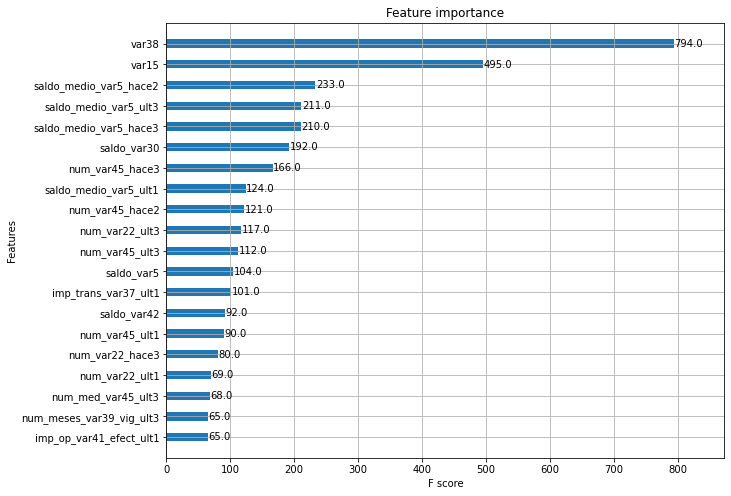

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax=ax, max_num_features = 20, height = 0.4)

# LightGBM 모델 학습과 하이퍼 파라미터 튜닝

 ## 하이퍼 파라미터 튜닝을 하지 않은 LightGBM 모델

In [34]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.831406	training's binary_logloss: 0.158826	valid_1's auc: 0.800667	valid_1's binary_logloss: 0.153741
[2]	training's auc: 0.836656	training's binary_logloss: 0.152848	valid_1's auc: 0.807013	valid_1's binary_logloss: 0.149353
[3]	training's auc: 0.842189	training's binary_logloss: 0.148374	valid_1's auc: 0.809358	valid_1's binary_logloss: 0.14637
[4]	training's auc: 0.848609	training's binary_logloss: 0.144984	valid_1's auc: 0.812287	valid_1's binary_logloss: 0.143985
[5]	training's auc: 0.854197	training's binary_logloss: 0.142145	valid_1's auc: 0.815641	valid_1's binary_logloss: 0.142136
[6]	training's auc: 0.857482	training's binary_logloss: 0.139711	valid_1's auc: 0.819214	valid_1's binary_logloss: 0.14048
[7]	training's auc: 0.86063	training's binary_logloss: 0.137717	valid_1's auc: 0.821702	valid_1's binary_logloss: 0.139141
[8]	training's auc: 0.862196	training's binary_logloss: 0.136001	valid_1's auc: 0.823325	valid_1's binary_logloss: 0.13807
[9]	training

[67]	training's auc: 0.927637	training's binary_logloss: 0.107219	valid_1's auc: 0.827279	valid_1's binary_logloss: 0.132946
[68]	training's auc: 0.928121	training's binary_logloss: 0.106965	valid_1's auc: 0.827327	valid_1's binary_logloss: 0.132926
[69]	training's auc: 0.928239	training's binary_logloss: 0.106831	valid_1's auc: 0.827331	valid_1's binary_logloss: 0.13294
[70]	training's auc: 0.928736	training's binary_logloss: 0.10658	valid_1's auc: 0.827408	valid_1's binary_logloss: 0.132936
[71]	training's auc: 0.92903	training's binary_logloss: 0.106375	valid_1's auc: 0.827123	valid_1's binary_logloss: 0.133034
[72]	training's auc: 0.929284	training's binary_logloss: 0.106189	valid_1's auc: 0.827316	valid_1's binary_logloss: 0.133007
[73]	training's auc: 0.929551	training's binary_logloss: 0.106004	valid_1's auc: 0.827426	valid_1's binary_logloss: 0.133014
[74]	training's auc: 0.930275	training's binary_logloss: 0.105705	valid_1's auc: 0.827374	valid_1's binary_logloss: 0.133055
[75

[136]	training's auc: 0.949476	training's binary_logloss: 0.0946292	valid_1's auc: 0.819667	valid_1's binary_logloss: 0.136151
[137]	training's auc: 0.949677	training's binary_logloss: 0.0945057	valid_1's auc: 0.819664	valid_1's binary_logloss: 0.136187
[138]	training's auc: 0.949869	training's binary_logloss: 0.0944075	valid_1's auc: 0.819691	valid_1's binary_logloss: 0.136209
[139]	training's auc: 0.950139	training's binary_logloss: 0.0942834	valid_1's auc: 0.819573	valid_1's binary_logloss: 0.136281
[140]	training's auc: 0.950262	training's binary_logloss: 0.0941549	valid_1's auc: 0.819224	valid_1's binary_logloss: 0.136348
[141]	training's auc: 0.950335	training's binary_logloss: 0.0940417	valid_1's auc: 0.818968	valid_1's binary_logloss: 0.13643
[142]	training's auc: 0.950401	training's binary_logloss: 0.0939616	valid_1's auc: 0.818958	valid_1's binary_logloss: 0.136473
[143]	training's auc: 0.950512	training's binary_logloss: 0.0938366	valid_1's auc: 0.819075	valid_1's binary_log

## hyperopt로 하이퍼 파라미터 튜닝을 한 LightGBM 모델

In [35]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [36]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [37]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.829117	training's binary_logloss: 0.166068	valid_1's auc: 0.813958	valid_1's binary_logloss: 0.16088
[2]	training's auc: 0.831752	training's binary_logloss: 0.163964	valid_1's auc: 0.814755	valid_1's binary_logloss: 0.159158
[3]	training's auc: 0.834075	training's binary_logloss: 0.162086	valid_1's auc: 0.817047	valid_1's binary_logloss: 0.157587
[4]	training's auc: 0.836349	training's binary_logloss: 0.160373	valid_1's auc: 0.819498	valid_1's binary_logloss: 0.156133
[5]	training's auc: 0.837338	training's binary_logloss: 0.158759	valid_1's auc: 0.819873	valid_1's binary_logloss: 0.154853
[6]	training's auc: 0.839626	training's binary_logloss: 0.157287	valid_1's auc: 0.821021	valid_1's binary_logloss: 0.153685
[7]	training's auc: 0.840867	training's binary_logloss: 0.155944	valid_1's auc: 0.82119	valid_1's binary_logloss: 0.152589
[8]	training's auc: 0.842884	training's binary_logloss: 0.154696	valid_1's auc: 0.822871	valid_1's binary_logloss: 0.15158
[9]	trainin

[66]	training's auc: 0.875129	training's binary_logloss: 0.128889	valid_1's auc: 0.839383	valid_1's binary_logloss: 0.133544
[67]	training's auc: 0.875547	training's binary_logloss: 0.128699	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.133468
[68]	training's auc: 0.875795	training's binary_logloss: 0.12852	valid_1's auc: 0.839569	valid_1's binary_logloss: 0.133403
[69]	training's auc: 0.876086	training's binary_logloss: 0.128354	valid_1's auc: 0.839637	valid_1's binary_logloss: 0.133337
[70]	training's auc: 0.876441	training's binary_logloss: 0.128178	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.133267
[71]	training's auc: 0.876688	training's binary_logloss: 0.128006	valid_1's auc: 0.83967	valid_1's binary_logloss: 0.133208
[72]	training's auc: 0.877033	training's binary_logloss: 0.12784	valid_1's auc: 0.839575	valid_1's binary_logloss: 0.133153
[73]	training's auc: 0.877402	training's binary_logloss: 0.127686	valid_1's auc: 0.839565	valid_1's binary_logloss: 0.13308
[74]

[31]	training's auc: 0.863529	training's binary_logloss: 0.136288	valid_1's auc: 0.834362	valid_1's binary_logloss: 0.143261
[32]	training's auc: 0.86368	training's binary_logloss: 0.135891	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.142968
[33]	training's auc: 0.864334	training's binary_logloss: 0.135466	valid_1's auc: 0.834526	valid_1's binary_logloss: 0.142674
[34]	training's auc: 0.864661	training's binary_logloss: 0.135089	valid_1's auc: 0.834471	valid_1's binary_logloss: 0.1424
[35]	training's auc: 0.865254	training's binary_logloss: 0.134695	valid_1's auc: 0.834286	valid_1's binary_logloss: 0.142157
[36]	training's auc: 0.86607	training's binary_logloss: 0.134325	valid_1's auc: 0.834875	valid_1's binary_logloss: 0.1419
[37]	training's auc: 0.866475	training's binary_logloss: 0.13397	valid_1's auc: 0.834832	valid_1's binary_logloss: 0.14166
[38]	training's auc: 0.867176	training's binary_logloss: 0.133614	valid_1's auc: 0.834912	valid_1's binary_logloss: 0.141432
[39]	tra

[96]	training's auc: 0.889756	training's binary_logloss: 0.121829	valid_1's auc: 0.836994	valid_1's binary_logloss: 0.13613
[97]	training's auc: 0.890043	training's binary_logloss: 0.121703	valid_1's auc: 0.836878	valid_1's binary_logloss: 0.136119
[98]	training's auc: 0.890267	training's binary_logloss: 0.121575	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.136105
[99]	training's auc: 0.890549	training's binary_logloss: 0.121451	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.136083
[100]	training's auc: 0.890922	training's binary_logloss: 0.121328	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.136042
[1]	training's auc: 0.833716	training's binary_logloss: 0.163406	valid_1's auc: 0.823695	valid_1's binary_logloss: 0.166212
[2]	training's auc: 0.834998	training's binary_logloss: 0.161403	valid_1's auc: 0.823718	valid_1's binary_logloss: 0.164401
[3]	training's auc: 0.83775	training's binary_logloss: 0.159568	valid_1's auc: 0.825576	valid_1's binary_logloss: 0.162707
[4]	t

[61]	training's auc: 0.873739	training's binary_logloss: 0.128191	valid_1's auc: 0.839396	valid_1's binary_logloss: 0.13762
[1]	training's auc: 0.836918	training's binary_logloss: 0.155765	valid_1's auc: 0.817936	valid_1's binary_logloss: 0.152744
[2]	training's auc: 0.849625	training's binary_logloss: 0.148812	valid_1's auc: 0.823632	valid_1's binary_logloss: 0.147409
[3]	training's auc: 0.854943	training's binary_logloss: 0.143897	valid_1's auc: 0.823702	valid_1's binary_logloss: 0.143971
[4]	training's auc: 0.862105	training's binary_logloss: 0.140177	valid_1's auc: 0.828653	valid_1's binary_logloss: 0.141332
[5]	training's auc: 0.865151	training's binary_logloss: 0.137165	valid_1's auc: 0.828912	valid_1's binary_logloss: 0.13949
[6]	training's auc: 0.8692	training's binary_logloss: 0.134678	valid_1's auc: 0.831259	valid_1's binary_logloss: 0.13812
[7]	training's auc: 0.872022	training's binary_logloss: 0.132656	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.136968
[8]	training

[4]	training's auc: 0.866077	training's binary_logloss: 0.137816	valid_1's auc: 0.828613	valid_1's binary_logloss: 0.146203
[5]	training's auc: 0.86997	training's binary_logloss: 0.134983	valid_1's auc: 0.830609	valid_1's binary_logloss: 0.144175
[6]	training's auc: 0.873717	training's binary_logloss: 0.132507	valid_1's auc: 0.831156	valid_1's binary_logloss: 0.14252
[7]	training's auc: 0.876199	training's binary_logloss: 0.130429	valid_1's auc: 0.830384	valid_1's binary_logloss: 0.141465
[8]	training's auc: 0.879431	training's binary_logloss: 0.128656	valid_1's auc: 0.831816	valid_1's binary_logloss: 0.140646
[9]	training's auc: 0.882052	training's binary_logloss: 0.127004	valid_1's auc: 0.832578	valid_1's binary_logloss: 0.139724
[10]	training's auc: 0.8838	training's binary_logloss: 0.125544	valid_1's auc: 0.832469	valid_1's binary_logloss: 0.139178
[11]	training's auc: 0.886969	training's binary_logloss: 0.124117	valid_1's auc: 0.833081	valid_1's binary_logloss: 0.138776
[12]	train

[17]	training's auc: 0.897495	training's binary_logloss: 0.119034	valid_1's auc: 0.835735	valid_1's binary_logloss: 0.13692
[18]	training's auc: 0.89921	training's binary_logloss: 0.118158	valid_1's auc: 0.83547	valid_1's binary_logloss: 0.136844
[19]	training's auc: 0.901349	training's binary_logloss: 0.117268	valid_1's auc: 0.835017	valid_1's binary_logloss: 0.136829
[20]	training's auc: 0.902979	training's binary_logloss: 0.116463	valid_1's auc: 0.834849	valid_1's binary_logloss: 0.136825
[21]	training's auc: 0.904772	training's binary_logloss: 0.115683	valid_1's auc: 0.835054	valid_1's binary_logloss: 0.136786
[22]	training's auc: 0.906608	training's binary_logloss: 0.114919	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.136809
[23]	training's auc: 0.908305	training's binary_logloss: 0.114233	valid_1's auc: 0.834987	valid_1's binary_logloss: 0.136749
[24]	training's auc: 0.909724	training's binary_logloss: 0.113549	valid_1's auc: 0.834716	valid_1's binary_logloss: 0.136794
[25

[40]	training's auc: 0.898461	training's binary_logloss: 0.119861	valid_1's auc: 0.841215	valid_1's binary_logloss: 0.131793
[41]	training's auc: 0.899339	training's binary_logloss: 0.119449	valid_1's auc: 0.841454	valid_1's binary_logloss: 0.131741
[42]	training's auc: 0.900038	training's binary_logloss: 0.119106	valid_1's auc: 0.841559	valid_1's binary_logloss: 0.13169
[43]	training's auc: 0.900801	training's binary_logloss: 0.118762	valid_1's auc: 0.841696	valid_1's binary_logloss: 0.131634
[44]	training's auc: 0.901836	training's binary_logloss: 0.11839	valid_1's auc: 0.841802	valid_1's binary_logloss: 0.131594
[45]	training's auc: 0.903432	training's binary_logloss: 0.118075	valid_1's auc: 0.84176	valid_1's binary_logloss: 0.131556
[46]	training's auc: 0.904079	training's binary_logloss: 0.11775	valid_1's auc: 0.841993	valid_1's binary_logloss: 0.13154
[47]	training's auc: 0.905318	training's binary_logloss: 0.117458	valid_1's auc: 0.841874	valid_1's binary_logloss: 0.131522
[48]	

[26]	training's auc: 0.888846	training's binary_logloss: 0.123568	valid_1's auc: 0.835384	valid_1's binary_logloss: 0.137262
[27]	training's auc: 0.889532	training's binary_logloss: 0.123091	valid_1's auc: 0.835304	valid_1's binary_logloss: 0.137153
[28]	training's auc: 0.890837	training's binary_logloss: 0.122563	valid_1's auc: 0.835436	valid_1's binary_logloss: 0.137005
[29]	training's auc: 0.892126	training's binary_logloss: 0.122091	valid_1's auc: 0.836632	valid_1's binary_logloss: 0.136825
[30]	training's auc: 0.893032	training's binary_logloss: 0.121625	valid_1's auc: 0.836849	valid_1's binary_logloss: 0.136699
[31]	training's auc: 0.893814	training's binary_logloss: 0.121184	valid_1's auc: 0.836526	valid_1's binary_logloss: 0.136674
[32]	training's auc: 0.894833	training's binary_logloss: 0.120738	valid_1's auc: 0.835972	valid_1's binary_logloss: 0.136639
[33]	training's auc: 0.89579	training's binary_logloss: 0.12033	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.136542
[3

[31]	training's auc: 0.890432	training's binary_logloss: 0.122065	valid_1's auc: 0.836164	valid_1's binary_logloss: 0.136885
[32]	training's auc: 0.892057	training's binary_logloss: 0.121579	valid_1's auc: 0.836302	valid_1's binary_logloss: 0.136811
[33]	training's auc: 0.893091	training's binary_logloss: 0.121135	valid_1's auc: 0.836417	valid_1's binary_logloss: 0.136714
[34]	training's auc: 0.894297	training's binary_logloss: 0.120666	valid_1's auc: 0.836055	valid_1's binary_logloss: 0.136722
[35]	training's auc: 0.895307	training's binary_logloss: 0.120245	valid_1's auc: 0.836278	valid_1's binary_logloss: 0.136639
[36]	training's auc: 0.896407	training's binary_logloss: 0.119835	valid_1's auc: 0.836309	valid_1's binary_logloss: 0.136551
[37]	training's auc: 0.897412	training's binary_logloss: 0.119456	valid_1's auc: 0.836995	valid_1's binary_logloss: 0.13639
[38]	training's auc: 0.898307	training's binary_logloss: 0.119058	valid_1's auc: 0.83686	valid_1's binary_logloss: 0.136364
[3

[8]	training's auc: 0.87832	training's binary_logloss: 0.131366	valid_1's auc: 0.831237	valid_1's binary_logloss: 0.142265
[9]	training's auc: 0.880716	training's binary_logloss: 0.129697	valid_1's auc: 0.831508	valid_1's binary_logloss: 0.141315
[10]	training's auc: 0.883571	training's binary_logloss: 0.12814	valid_1's auc: 0.831768	valid_1's binary_logloss: 0.140518
[11]	training's auc: 0.885536	training's binary_logloss: 0.126739	valid_1's auc: 0.831399	valid_1's binary_logloss: 0.139929
[12]	training's auc: 0.888098	training's binary_logloss: 0.125445	valid_1's auc: 0.832513	valid_1's binary_logloss: 0.13939
[13]	training's auc: 0.890181	training's binary_logloss: 0.124281	valid_1's auc: 0.831904	valid_1's binary_logloss: 0.139074
[14]	training's auc: 0.892204	training's binary_logloss: 0.123143	valid_1's auc: 0.832352	valid_1's binary_logloss: 0.138626
[15]	training's auc: 0.893709	training's binary_logloss: 0.122101	valid_1's auc: 0.831839	valid_1's binary_logloss: 0.138343
[16]	

[16]	training's auc: 0.893073	training's binary_logloss: 0.121743	valid_1's auc: 0.833763	valid_1's binary_logloss: 0.137894
[17]	training's auc: 0.894696	training's binary_logloss: 0.12089	valid_1's auc: 0.833189	valid_1's binary_logloss: 0.137725
[18]	training's auc: 0.896408	training's binary_logloss: 0.120078	valid_1's auc: 0.832716	valid_1's binary_logloss: 0.137601
[19]	training's auc: 0.898397	training's binary_logloss: 0.119268	valid_1's auc: 0.832925	valid_1's binary_logloss: 0.137407
[20]	training's auc: 0.899893	training's binary_logloss: 0.118476	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.137402
[21]	training's auc: 0.902193	training's binary_logloss: 0.117736	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.13733
[22]	training's auc: 0.904314	training's binary_logloss: 0.116934	valid_1's auc: 0.832188	valid_1's binary_logloss: 0.137283
[23]	training's auc: 0.905812	training's binary_logloss: 0.116215	valid_1's auc: 0.831811	valid_1's binary_logloss: 0.137229
[2

[42]	training's auc: 0.900474	training's binary_logloss: 0.119414	valid_1's auc: 0.841602	valid_1's binary_logloss: 0.131891
[43]	training's auc: 0.901392	training's binary_logloss: 0.119068	valid_1's auc: 0.841349	valid_1's binary_logloss: 0.131868
[44]	training's auc: 0.90215	training's binary_logloss: 0.118721	valid_1's auc: 0.841201	valid_1's binary_logloss: 0.131795
[45]	training's auc: 0.902975	training's binary_logloss: 0.118352	valid_1's auc: 0.841554	valid_1's binary_logloss: 0.13175
[46]	training's auc: 0.903682	training's binary_logloss: 0.117981	valid_1's auc: 0.841536	valid_1's binary_logloss: 0.131752
[47]	training's auc: 0.904517	training's binary_logloss: 0.117635	valid_1's auc: 0.841832	valid_1's binary_logloss: 0.131693
[48]	training's auc: 0.905268	training's binary_logloss: 0.117283	valid_1's auc: 0.841865	valid_1's binary_logloss: 0.131685
[49]	training's auc: 0.906114	training's binary_logloss: 0.116926	valid_1's auc: 0.84195	valid_1's binary_logloss: 0.13162
[50]

[20]	training's auc: 0.882708	training's binary_logloss: 0.128063	valid_1's auc: 0.83507	valid_1's binary_logloss: 0.139336
[21]	training's auc: 0.884112	training's binary_logloss: 0.127386	valid_1's auc: 0.836325	valid_1's binary_logloss: 0.138992
[22]	training's auc: 0.884949	training's binary_logloss: 0.126739	valid_1's auc: 0.836389	valid_1's binary_logloss: 0.138673
[23]	training's auc: 0.886025	training's binary_logloss: 0.12611	valid_1's auc: 0.836374	valid_1's binary_logloss: 0.138389
[24]	training's auc: 0.887016	training's binary_logloss: 0.125509	valid_1's auc: 0.836303	valid_1's binary_logloss: 0.138158
[25]	training's auc: 0.888489	training's binary_logloss: 0.124863	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.137906
[26]	training's auc: 0.889337	training's binary_logloss: 0.124281	valid_1's auc: 0.836782	valid_1's binary_logloss: 0.137647
[27]	training's auc: 0.890079	training's binary_logloss: 0.123748	valid_1's auc: 0.83693	valid_1's binary_logloss: 0.137456
[28

[1]	training's auc: 0.840783	training's binary_logloss: 0.16014	valid_1's auc: 0.826207	valid_1's binary_logloss: 0.163368
[2]	training's auc: 0.844518	training's binary_logloss: 0.155824	valid_1's auc: 0.828741	valid_1's binary_logloss: 0.159646
[3]	training's auc: 0.849187	training's binary_logloss: 0.152412	valid_1's auc: 0.831547	valid_1's binary_logloss: 0.156647
[4]	training's auc: 0.850904	training's binary_logloss: 0.14958	valid_1's auc: 0.830787	valid_1's binary_logloss: 0.154343
[5]	training's auc: 0.856256	training's binary_logloss: 0.147088	valid_1's auc: 0.830236	valid_1's binary_logloss: 0.152281
[6]	training's auc: 0.860006	training's binary_logloss: 0.144882	valid_1's auc: 0.831337	valid_1's binary_logloss: 0.150558
[7]	training's auc: 0.861761	training's binary_logloss: 0.142966	valid_1's auc: 0.831699	valid_1's binary_logloss: 0.149022
[8]	training's auc: 0.863819	training's binary_logloss: 0.141244	valid_1's auc: 0.83183	valid_1's binary_logloss: 0.147703
[9]	trainin

[23]	training's auc: 0.850521	training's binary_logloss: 0.149204	valid_1's auc: 0.825416	valid_1's binary_logloss: 0.147266
[24]	training's auc: 0.850832	training's binary_logloss: 0.148707	valid_1's auc: 0.825301	valid_1's binary_logloss: 0.146885
[25]	training's auc: 0.851034	training's binary_logloss: 0.148217	valid_1's auc: 0.825227	valid_1's binary_logloss: 0.146505
[26]	training's auc: 0.851133	training's binary_logloss: 0.147739	valid_1's auc: 0.825218	valid_1's binary_logloss: 0.146134
[27]	training's auc: 0.851442	training's binary_logloss: 0.147277	valid_1's auc: 0.825256	valid_1's binary_logloss: 0.145766
[28]	training's auc: 0.852499	training's binary_logloss: 0.146824	valid_1's auc: 0.826566	valid_1's binary_logloss: 0.145409
[29]	training's auc: 0.853032	training's binary_logloss: 0.146387	valid_1's auc: 0.82674	valid_1's binary_logloss: 0.145062
[30]	training's auc: 0.855983	training's binary_logloss: 0.145956	valid_1's auc: 0.829349	valid_1's binary_logloss: 0.144734
[

[88]	training's auc: 0.871582	training's binary_logloss: 0.131613	valid_1's auc: 0.837284	valid_1's binary_logloss: 0.135161
[89]	training's auc: 0.871735	training's binary_logloss: 0.13147	valid_1's auc: 0.837292	valid_1's binary_logloss: 0.135071
[90]	training's auc: 0.872065	training's binary_logloss: 0.13132	valid_1's auc: 0.837615	valid_1's binary_logloss: 0.134986
[91]	training's auc: 0.872257	training's binary_logloss: 0.131176	valid_1's auc: 0.837792	valid_1's binary_logloss: 0.134902
[92]	training's auc: 0.872505	training's binary_logloss: 0.131033	valid_1's auc: 0.837946	valid_1's binary_logloss: 0.13482
[93]	training's auc: 0.87267	training's binary_logloss: 0.130899	valid_1's auc: 0.83803	valid_1's binary_logloss: 0.134751
[94]	training's auc: 0.872906	training's binary_logloss: 0.130756	valid_1's auc: 0.838107	valid_1's binary_logloss: 0.134667
[95]	training's auc: 0.873086	training's binary_logloss: 0.130621	valid_1's auc: 0.838062	valid_1's binary_logloss: 0.134593
[96]	

[53]	training's auc: 0.866243	training's binary_logloss: 0.136107	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.143382
[54]	training's auc: 0.866378	training's binary_logloss: 0.135868	valid_1's auc: 0.835028	valid_1's binary_logloss: 0.143205
[55]	training's auc: 0.86658	training's binary_logloss: 0.135636	valid_1's auc: 0.83498	valid_1's binary_logloss: 0.14303
[56]	training's auc: 0.866684	training's binary_logloss: 0.135404	valid_1's auc: 0.83496	valid_1's binary_logloss: 0.142868
[57]	training's auc: 0.866947	training's binary_logloss: 0.135166	valid_1's auc: 0.834897	valid_1's binary_logloss: 0.142696
[58]	training's auc: 0.867216	training's binary_logloss: 0.134946	valid_1's auc: 0.83508	valid_1's binary_logloss: 0.142529
[59]	training's auc: 0.867601	training's binary_logloss: 0.134701	valid_1's auc: 0.835202	valid_1's binary_logloss: 0.142357
[60]	training's auc: 0.868278	training's binary_logloss: 0.134472	valid_1's auc: 0.835537	valid_1's binary_logloss: 0.142205
[61]	

[18]	training's auc: 0.849442	training's binary_logloss: 0.149808	valid_1's auc: 0.830839	valid_1's binary_logloss: 0.154069
[19]	training's auc: 0.85082	training's binary_logloss: 0.149232	valid_1's auc: 0.831653	valid_1's binary_logloss: 0.153576
[20]	training's auc: 0.851371	training's binary_logloss: 0.14867	valid_1's auc: 0.83253	valid_1's binary_logloss: 0.153094
[21]	training's auc: 0.852348	training's binary_logloss: 0.148108	valid_1's auc: 0.832991	valid_1's binary_logloss: 0.152609
[22]	training's auc: 0.853501	training's binary_logloss: 0.147568	valid_1's auc: 0.833375	valid_1's binary_logloss: 0.152146
[23]	training's auc: 0.854276	training's binary_logloss: 0.147043	valid_1's auc: 0.833503	valid_1's binary_logloss: 0.151721
[24]	training's auc: 0.854714	training's binary_logloss: 0.146531	valid_1's auc: 0.833398	valid_1's binary_logloss: 0.151296
[25]	training's auc: 0.855123	training's binary_logloss: 0.146038	valid_1's auc: 0.833381	valid_1's binary_logloss: 0.150884
[26

[5]	training's auc: 0.860619	training's binary_logloss: 0.137269	valid_1's auc: 0.830138	valid_1's binary_logloss: 0.139206
[6]	training's auc: 0.86294	training's binary_logloss: 0.135067	valid_1's auc: 0.831352	valid_1's binary_logloss: 0.137878
[7]	training's auc: 0.86618	training's binary_logloss: 0.133251	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.136648
[8]	training's auc: 0.867925	training's binary_logloss: 0.131624	valid_1's auc: 0.833402	valid_1's binary_logloss: 0.135894
[9]	training's auc: 0.870909	training's binary_logloss: 0.130188	valid_1's auc: 0.835268	valid_1's binary_logloss: 0.135124
[10]	training's auc: 0.873524	training's binary_logloss: 0.128932	valid_1's auc: 0.836968	valid_1's binary_logloss: 0.134473
[11]	training's auc: 0.875568	training's binary_logloss: 0.127854	valid_1's auc: 0.837337	valid_1's binary_logloss: 0.133988
[12]	training's auc: 0.877804	training's binary_logloss: 0.126869	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.13373
[13]	tra

[12]	training's auc: 0.883338	training's binary_logloss: 0.124393	valid_1's auc: 0.836208	valid_1's binary_logloss: 0.137106
[13]	training's auc: 0.885024	training's binary_logloss: 0.123484	valid_1's auc: 0.836224	valid_1's binary_logloss: 0.136818
[14]	training's auc: 0.887872	training's binary_logloss: 0.122565	valid_1's auc: 0.836615	valid_1's binary_logloss: 0.136662
[15]	training's auc: 0.890281	training's binary_logloss: 0.121738	valid_1's auc: 0.836387	valid_1's binary_logloss: 0.136533
[16]	training's auc: 0.891809	training's binary_logloss: 0.120909	valid_1's auc: 0.836245	valid_1's binary_logloss: 0.136458
[17]	training's auc: 0.893433	training's binary_logloss: 0.120167	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.136261
[18]	training's auc: 0.895023	training's binary_logloss: 0.119489	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.136088
[19]	training's auc: 0.897878	training's binary_logloss: 0.118678	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.135967


[27]	training's auc: 0.90551	training's binary_logloss: 0.114786	valid_1's auc: 0.838997	valid_1's binary_logloss: 0.135751
[28]	training's auc: 0.906966	training's binary_logloss: 0.114197	valid_1's auc: 0.838589	valid_1's binary_logloss: 0.135889
[29]	training's auc: 0.90817	training's binary_logloss: 0.113661	valid_1's auc: 0.83859	valid_1's binary_logloss: 0.135923
[30]	training's auc: 0.90957	training's binary_logloss: 0.113138	valid_1's auc: 0.83862	valid_1's binary_logloss: 0.135938
[31]	training's auc: 0.910468	training's binary_logloss: 0.11265	valid_1's auc: 0.838536	valid_1's binary_logloss: 0.13597
[32]	training's auc: 0.911535	training's binary_logloss: 0.112088	valid_1's auc: 0.838293	valid_1's binary_logloss: 0.136055
[33]	training's auc: 0.913002	training's binary_logloss: 0.111552	valid_1's auc: 0.838063	valid_1's binary_logloss: 0.136125
[34]	training's auc: 0.914361	training's binary_logloss: 0.110977	valid_1's auc: 0.837821	valid_1's binary_logloss: 0.136223
[35]	tr

[35]	training's auc: 0.937181	training's binary_logloss: 0.102104	valid_1's auc: 0.836539	valid_1's binary_logloss: 0.132877
[36]	training's auc: 0.938079	training's binary_logloss: 0.10154	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.133057
[37]	training's auc: 0.938695	training's binary_logloss: 0.100995	valid_1's auc: 0.835623	valid_1's binary_logloss: 0.133137
[38]	training's auc: 0.939791	training's binary_logloss: 0.100456	valid_1's auc: 0.835305	valid_1's binary_logloss: 0.133213
[39]	training's auc: 0.94065	training's binary_logloss: 0.0999132	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.133374
[40]	training's auc: 0.941286	training's binary_logloss: 0.0994221	valid_1's auc: 0.83467	valid_1's binary_logloss: 0.133507
[41]	training's auc: 0.942133	training's binary_logloss: 0.0989859	valid_1's auc: 0.834021	valid_1's binary_logloss: 0.133633
[42]	training's auc: 0.943049	training's binary_logloss: 0.0983345	valid_1's auc: 0.833798	valid_1's binary_logloss: 0.13376
[4

[7]	training's auc: 0.87824	training's binary_logloss: 0.127405	valid_1's auc: 0.834837	valid_1's binary_logloss: 0.139856
[8]	training's auc: 0.88243	training's binary_logloss: 0.125599	valid_1's auc: 0.835701	valid_1's binary_logloss: 0.13903
[9]	training's auc: 0.887486	training's binary_logloss: 0.12376	valid_1's auc: 0.834831	valid_1's binary_logloss: 0.138559
[10]	training's auc: 0.8908	training's binary_logloss: 0.122301	valid_1's auc: 0.833925	valid_1's binary_logloss: 0.138234
[11]	training's auc: 0.894021	training's binary_logloss: 0.120917	valid_1's auc: 0.83438	valid_1's binary_logloss: 0.137836
[12]	training's auc: 0.896942	training's binary_logloss: 0.119672	valid_1's auc: 0.834627	valid_1's binary_logloss: 0.137587
[13]	training's auc: 0.899073	training's binary_logloss: 0.11849	valid_1's auc: 0.834193	valid_1's binary_logloss: 0.13749
[14]	training's auc: 0.902059	training's binary_logloss: 0.11731	valid_1's auc: 0.832537	valid_1's binary_logloss: 0.137632
[15]	training

[34]	training's auc: 0.908868	training's binary_logloss: 0.115293	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.132157
[35]	training's auc: 0.91002	training's binary_logloss: 0.114869	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.132162
[36]	training's auc: 0.910732	training's binary_logloss: 0.114436	valid_1's auc: 0.837963	valid_1's binary_logloss: 0.132145
[37]	training's auc: 0.911672	training's binary_logloss: 0.113992	valid_1's auc: 0.8378	valid_1's binary_logloss: 0.132208
[38]	training's auc: 0.912431	training's binary_logloss: 0.11363	valid_1's auc: 0.837429	valid_1's binary_logloss: 0.132253
[39]	training's auc: 0.913371	training's binary_logloss: 0.113251	valid_1's auc: 0.837934	valid_1's binary_logloss: 0.132184
[40]	training's auc: 0.913953	training's binary_logloss: 0.11291	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.132343
[41]	training's auc: 0.914881	training's binary_logloss: 0.112421	valid_1's auc: 0.837551	valid_1's binary_logloss: 0.132315
[42]	

[47]	training's auc: 0.921644	training's binary_logloss: 0.107854	valid_1's auc: 0.834194	valid_1's binary_logloss: 0.137125
[48]	training's auc: 0.922263	training's binary_logloss: 0.107541	valid_1's auc: 0.833995	valid_1's binary_logloss: 0.137185
[49]	training's auc: 0.92264	training's binary_logloss: 0.107286	valid_1's auc: 0.833803	valid_1's binary_logloss: 0.137241
[50]	training's auc: 0.923344	training's binary_logloss: 0.10698	valid_1's auc: 0.83321	valid_1's binary_logloss: 0.137415
[51]	training's auc: 0.924117	training's binary_logloss: 0.106619	valid_1's auc: 0.8329	valid_1's binary_logloss: 0.137509
[52]	training's auc: 0.924603	training's binary_logloss: 0.106311	valid_1's auc: 0.83225	valid_1's binary_logloss: 0.137684
[53]	training's auc: 0.925032	training's binary_logloss: 0.106077	valid_1's auc: 0.831658	valid_1's binary_logloss: 0.137838
[54]	training's auc: 0.925701	training's binary_logloss: 0.105834	valid_1's auc: 0.831732	valid_1's binary_logloss: 0.137868
[1]	tr

[2]	training's auc: 0.843724	training's binary_logloss: 0.156589	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.153321
[3]	training's auc: 0.850105	training's binary_logloss: 0.152722	valid_1's auc: 0.823229	valid_1's binary_logloss: 0.15029
[4]	training's auc: 0.852008	training's binary_logloss: 0.149505	valid_1's auc: 0.823669	valid_1's binary_logloss: 0.147927
[5]	training's auc: 0.856272	training's binary_logloss: 0.146858	valid_1's auc: 0.826638	valid_1's binary_logloss: 0.145934
[6]	training's auc: 0.859762	training's binary_logloss: 0.144533	valid_1's auc: 0.828944	valid_1's binary_logloss: 0.144223
[7]	training's auc: 0.861611	training's binary_logloss: 0.142458	valid_1's auc: 0.829953	valid_1's binary_logloss: 0.14272
[8]	training's auc: 0.863834	training's binary_logloss: 0.140651	valid_1's auc: 0.830753	valid_1's binary_logloss: 0.141509
[9]	training's auc: 0.864687	training's binary_logloss: 0.139028	valid_1's auc: 0.83028	valid_1's binary_logloss: 0.140509
[10]	traini

[67]	training's auc: 0.924808	training's binary_logloss: 0.10939	valid_1's auc: 0.840199	valid_1's binary_logloss: 0.131767
[68]	training's auc: 0.925287	training's binary_logloss: 0.109132	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.131794
[69]	training's auc: 0.925775	training's binary_logloss: 0.108862	valid_1's auc: 0.839996	valid_1's binary_logloss: 0.131794
[70]	training's auc: 0.926266	training's binary_logloss: 0.108588	valid_1's auc: 0.839758	valid_1's binary_logloss: 0.131848
[71]	training's auc: 0.926786	training's binary_logloss: 0.108323	valid_1's auc: 0.839627	valid_1's binary_logloss: 0.131901
[72]	training's auc: 0.927429	training's binary_logloss: 0.108003	valid_1's auc: 0.839327	valid_1's binary_logloss: 0.131934
[73]	training's auc: 0.927909	training's binary_logloss: 0.107722	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.131928
[74]	training's auc: 0.928537	training's binary_logloss: 0.107445	valid_1's auc: 0.839277	valid_1's binary_logloss: 0.131947
[

[53]	training's auc: 0.919257	training's binary_logloss: 0.111105	valid_1's auc: 0.836161	valid_1's binary_logloss: 0.135977
[54]	training's auc: 0.919942	training's binary_logloss: 0.110817	valid_1's auc: 0.836316	valid_1's binary_logloss: 0.135947
[55]	training's auc: 0.920917	training's binary_logloss: 0.110475	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.135976
[56]	training's auc: 0.92169	training's binary_logloss: 0.110105	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.136017
[57]	training's auc: 0.922293	training's binary_logloss: 0.10978	valid_1's auc: 0.835828	valid_1's binary_logloss: 0.136043
[58]	training's auc: 0.922976	training's binary_logloss: 0.109457	valid_1's auc: 0.835904	valid_1's binary_logloss: 0.136027
[59]	training's auc: 0.923342	training's binary_logloss: 0.109195	valid_1's auc: 0.835766	valid_1's binary_logloss: 0.136074
[60]	training's auc: 0.924074	training's binary_logloss: 0.108896	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.136081
[6

[34]	training's auc: 0.898366	training's binary_logloss: 0.118985	valid_1's auc: 0.836233	valid_1's binary_logloss: 0.136428
[35]	training's auc: 0.89939	training's binary_logloss: 0.118566	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.136306
[36]	training's auc: 0.90016	training's binary_logloss: 0.118157	valid_1's auc: 0.836716	valid_1's binary_logloss: 0.136281
[37]	training's auc: 0.900989	training's binary_logloss: 0.117782	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.136205
[38]	training's auc: 0.902037	training's binary_logloss: 0.117357	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.136175
[39]	training's auc: 0.902816	training's binary_logloss: 0.116973	valid_1's auc: 0.837071	valid_1's binary_logloss: 0.136171
[40]	training's auc: 0.903661	training's binary_logloss: 0.11657	valid_1's auc: 0.837271	valid_1's binary_logloss: 0.136147
[41]	training's auc: 0.904503	training's binary_logloss: 0.11619	valid_1's auc: 0.837255	valid_1's binary_logloss: 0.136129
[42]

[22]	training's auc: 0.929019	training's binary_logloss: 0.105895	valid_1's auc: 0.834875	valid_1's binary_logloss: 0.13354
[23]	training's auc: 0.930482	training's binary_logloss: 0.104942	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.133663
[24]	training's auc: 0.93203	training's binary_logloss: 0.10428	valid_1's auc: 0.834015	valid_1's binary_logloss: 0.133776
[25]	training's auc: 0.933391	training's binary_logloss: 0.103497	valid_1's auc: 0.833802	valid_1's binary_logloss: 0.133833
[26]	training's auc: 0.934554	training's binary_logloss: 0.102743	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.133872
[27]	training's auc: 0.935564	training's binary_logloss: 0.10195	valid_1's auc: 0.833815	valid_1's binary_logloss: 0.133839
[28]	training's auc: 0.937193	training's binary_logloss: 0.101155	valid_1's auc: 0.833394	valid_1's binary_logloss: 0.133893
[29]	training's auc: 0.938048	training's binary_logloss: 0.100467	valid_1's auc: 0.833157	valid_1's binary_logloss: 0.134025
[30]

[12]	training's auc: 0.907157	training's binary_logloss: 0.115136	valid_1's auc: 0.830266	valid_1's binary_logloss: 0.138547
[13]	training's auc: 0.91066	training's binary_logloss: 0.113704	valid_1's auc: 0.830451	valid_1's binary_logloss: 0.138518
[14]	training's auc: 0.913432	training's binary_logloss: 0.112397	valid_1's auc: 0.82948	valid_1's binary_logloss: 0.138679
[15]	training's auc: 0.915898	training's binary_logloss: 0.111083	valid_1's auc: 0.829148	valid_1's binary_logloss: 0.138738
[16]	training's auc: 0.918388	training's binary_logloss: 0.109822	valid_1's auc: 0.828955	valid_1's binary_logloss: 0.138799
[17]	training's auc: 0.921698	training's binary_logloss: 0.108718	valid_1's auc: 0.828599	valid_1's binary_logloss: 0.138991
[18]	training's auc: 0.92323	training's binary_logloss: 0.107771	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.138996
[19]	training's auc: 0.92497	training's binary_logloss: 0.106688	valid_1's auc: 0.827636	valid_1's binary_logloss: 0.139265
[20]

[44]	training's auc: 0.908861	training's binary_logloss: 0.11637	valid_1's auc: 0.841148	valid_1's binary_logloss: 0.131942
[45]	training's auc: 0.910073	training's binary_logloss: 0.115925	valid_1's auc: 0.841405	valid_1's binary_logloss: 0.13189
[46]	training's auc: 0.910899	training's binary_logloss: 0.115538	valid_1's auc: 0.841283	valid_1's binary_logloss: 0.131883
[47]	training's auc: 0.911752	training's binary_logloss: 0.115176	valid_1's auc: 0.841382	valid_1's binary_logloss: 0.131825
[48]	training's auc: 0.912705	training's binary_logloss: 0.114798	valid_1's auc: 0.84137	valid_1's binary_logloss: 0.131822
[49]	training's auc: 0.913616	training's binary_logloss: 0.114428	valid_1's auc: 0.841305	valid_1's binary_logloss: 0.131783
[50]	training's auc: 0.914296	training's binary_logloss: 0.114077	valid_1's auc: 0.84156	valid_1's binary_logloss: 0.131729
[51]	training's auc: 0.915083	training's binary_logloss: 0.113717	valid_1's auc: 0.841702	valid_1's binary_logloss: 0.131692
[52]

[28]	training's auc: 0.896636	training's binary_logloss: 0.121405	valid_1's auc: 0.835373	valid_1's binary_logloss: 0.137418
[29]	training's auc: 0.897595	training's binary_logloss: 0.120878	valid_1's auc: 0.835228	valid_1's binary_logloss: 0.137316
[30]	training's auc: 0.89855	training's binary_logloss: 0.12035	valid_1's auc: 0.834915	valid_1's binary_logloss: 0.137226
[31]	training's auc: 0.899554	training's binary_logloss: 0.119834	valid_1's auc: 0.835247	valid_1's binary_logloss: 0.13709
[32]	training's auc: 0.900469	training's binary_logloss: 0.11931	valid_1's auc: 0.835106	valid_1's binary_logloss: 0.137012
[33]	training's auc: 0.901205	training's binary_logloss: 0.118842	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.136907
[34]	training's auc: 0.902832	training's binary_logloss: 0.1183	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.136824
[35]	training's auc: 0.904141	training's binary_logloss: 0.117814	valid_1's auc: 0.835574	valid_1's binary_logloss: 0.13676
[36]	tr

[17]	training's auc: 0.880915	training's binary_logloss: 0.129565	valid_1's auc: 0.836323	valid_1's binary_logloss: 0.140223
[18]	training's auc: 0.88201	training's binary_logloss: 0.128776	valid_1's auc: 0.835943	valid_1's binary_logloss: 0.139822
[19]	training's auc: 0.882853	training's binary_logloss: 0.12798	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.139432
[20]	training's auc: 0.88409	training's binary_logloss: 0.127254	valid_1's auc: 0.836011	valid_1's binary_logloss: 0.139095
[21]	training's auc: 0.885125	training's binary_logloss: 0.126545	valid_1's auc: 0.8358	valid_1's binary_logloss: 0.138781
[22]	training's auc: 0.88636	training's binary_logloss: 0.12585	valid_1's auc: 0.835832	valid_1's binary_logloss: 0.138476
[23]	training's auc: 0.887793	training's binary_logloss: 0.125184	valid_1's auc: 0.835932	valid_1's binary_logloss: 0.138236
[24]	training's auc: 0.888871	training's binary_logloss: 0.12456	valid_1's auc: 0.835843	valid_1's binary_logloss: 0.138035
[25]	tra

[40]	training's auc: 0.932318	training's binary_logloss: 0.103508	valid_1's auc: 0.83099	valid_1's binary_logloss: 0.134683
[41]	training's auc: 0.933028	training's binary_logloss: 0.102973	valid_1's auc: 0.830665	valid_1's binary_logloss: 0.134803
[42]	training's auc: 0.933382	training's binary_logloss: 0.102637	valid_1's auc: 0.830312	valid_1's binary_logloss: 0.134942
[43]	training's auc: 0.934339	training's binary_logloss: 0.10214	valid_1's auc: 0.830276	valid_1's binary_logloss: 0.135019
[44]	training's auc: 0.935112	training's binary_logloss: 0.101883	valid_1's auc: 0.830221	valid_1's binary_logloss: 0.135079
[45]	training's auc: 0.935878	training's binary_logloss: 0.101412	valid_1's auc: 0.829654	valid_1's binary_logloss: 0.135264
[1]	training's auc: 0.834278	training's binary_logloss: 0.148101	valid_1's auc: 0.816094	valid_1's binary_logloss: 0.153099
[2]	training's auc: 0.849566	training's binary_logloss: 0.141472	valid_1's auc: 0.821072	valid_1's binary_logloss: 0.147755
[3]	

[23]	training's auc: 0.914686	training's binary_logloss: 0.110974	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.137275
[24]	training's auc: 0.916352	training's binary_logloss: 0.110215	valid_1's auc: 0.832645	valid_1's binary_logloss: 0.137531
[25]	training's auc: 0.917899	training's binary_logloss: 0.109613	valid_1's auc: 0.83248	valid_1's binary_logloss: 0.137587
[26]	training's auc: 0.919225	training's binary_logloss: 0.109039	valid_1's auc: 0.832224	valid_1's binary_logloss: 0.137679
[27]	training's auc: 0.920675	training's binary_logloss: 0.108385	valid_1's auc: 0.831646	valid_1's binary_logloss: 0.137822
[28]	training's auc: 0.921762	training's binary_logloss: 0.107696	valid_1's auc: 0.830983	valid_1's binary_logloss: 0.137984
[29]	training's auc: 0.922739	training's binary_logloss: 0.107157	valid_1's auc: 0.830511	valid_1's binary_logloss: 0.138159
[30]	training's auc: 0.923899	training's binary_logloss: 0.106458	valid_1's auc: 0.830014	valid_1's binary_logloss: 0.138237
[3

[54]	training's auc: 0.902244	training's binary_logloss: 0.118551	valid_1's auc: 0.842131	valid_1's binary_logloss: 0.13168
[55]	training's auc: 0.902806	training's binary_logloss: 0.118252	valid_1's auc: 0.842148	valid_1's binary_logloss: 0.131686
[56]	training's auc: 0.903508	training's binary_logloss: 0.117983	valid_1's auc: 0.84261	valid_1's binary_logloss: 0.131611
[57]	training's auc: 0.903988	training's binary_logloss: 0.117721	valid_1's auc: 0.842845	valid_1's binary_logloss: 0.13156
[58]	training's auc: 0.904666	training's binary_logloss: 0.11743	valid_1's auc: 0.842796	valid_1's binary_logloss: 0.131518
[59]	training's auc: 0.905261	training's binary_logloss: 0.117158	valid_1's auc: 0.842919	valid_1's binary_logloss: 0.131488
[60]	training's auc: 0.90643	training's binary_logloss: 0.116897	valid_1's auc: 0.843097	valid_1's binary_logloss: 0.131443
[61]	training's auc: 0.907095	training's binary_logloss: 0.116591	valid_1's auc: 0.843288	valid_1's binary_logloss: 0.13141
[62]	t

[28]	training's auc: 0.886869	training's binary_logloss: 0.125966	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.138641
[29]	training's auc: 0.887704	training's binary_logloss: 0.125437	valid_1's auc: 0.834758	valid_1's binary_logloss: 0.138424
[30]	training's auc: 0.888432	training's binary_logloss: 0.124948	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.138187
[31]	training's auc: 0.889369	training's binary_logloss: 0.124446	valid_1's auc: 0.835155	valid_1's binary_logloss: 0.138034
[32]	training's auc: 0.89006	training's binary_logloss: 0.12399	valid_1's auc: 0.835402	valid_1's binary_logloss: 0.137843
[33]	training's auc: 0.891029	training's binary_logloss: 0.123508	valid_1's auc: 0.835331	valid_1's binary_logloss: 0.137687
[34]	training's auc: 0.892002	training's binary_logloss: 0.123063	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.137561
[35]	training's auc: 0.89263	training's binary_logloss: 0.122651	valid_1's auc: 0.835123	valid_1's binary_logloss: 0.137479
[36

[26]	training's auc: 0.880123	training's binary_logloss: 0.127514	valid_1's auc: 0.837165	valid_1's binary_logloss: 0.13902
[27]	training's auc: 0.881094	training's binary_logloss: 0.127009	valid_1's auc: 0.837161	valid_1's binary_logloss: 0.13878
[28]	training's auc: 0.88241	training's binary_logloss: 0.126505	valid_1's auc: 0.837763	valid_1's binary_logloss: 0.138516
[29]	training's auc: 0.883366	training's binary_logloss: 0.126023	valid_1's auc: 0.837923	valid_1's binary_logloss: 0.138263
[30]	training's auc: 0.884689	training's binary_logloss: 0.125535	valid_1's auc: 0.838153	valid_1's binary_logloss: 0.138057
[31]	training's auc: 0.886045	training's binary_logloss: 0.125061	valid_1's auc: 0.837909	valid_1's binary_logloss: 0.137918
[32]	training's auc: 0.88678	training's binary_logloss: 0.1246	valid_1's auc: 0.838119	valid_1's binary_logloss: 0.137777
[33]	training's auc: 0.887649	training's binary_logloss: 0.124154	valid_1's auc: 0.838377	valid_1's binary_logloss: 0.137607
[34]	t

[28]	training's auc: 0.898438	training's binary_logloss: 0.119385	valid_1's auc: 0.84279	valid_1's binary_logloss: 0.131243
[29]	training's auc: 0.899395	training's binary_logloss: 0.118953	valid_1's auc: 0.843262	valid_1's binary_logloss: 0.131125
[30]	training's auc: 0.900325	training's binary_logloss: 0.118531	valid_1's auc: 0.84333	valid_1's binary_logloss: 0.131089
[31]	training's auc: 0.901469	training's binary_logloss: 0.118067	valid_1's auc: 0.843288	valid_1's binary_logloss: 0.131141
[32]	training's auc: 0.902292	training's binary_logloss: 0.117671	valid_1's auc: 0.84335	valid_1's binary_logloss: 0.131137
[33]	training's auc: 0.903611	training's binary_logloss: 0.117239	valid_1's auc: 0.842965	valid_1's binary_logloss: 0.13117
[34]	training's auc: 0.904454	training's binary_logloss: 0.116813	valid_1's auc: 0.842661	valid_1's binary_logloss: 0.131304
[35]	training's auc: 0.905659	training's binary_logloss: 0.11643	valid_1's auc: 0.842364	valid_1's binary_logloss: 0.131325
[36]	

[33]	training's auc: 0.907695	training's binary_logloss: 0.114311	valid_1's auc: 0.83709	valid_1's binary_logloss: 0.136159
[34]	training's auc: 0.908868	training's binary_logloss: 0.113937	valid_1's auc: 0.836877	valid_1's binary_logloss: 0.136195
[35]	training's auc: 0.909995	training's binary_logloss: 0.113561	valid_1's auc: 0.836859	valid_1's binary_logloss: 0.136198
[36]	training's auc: 0.911052	training's binary_logloss: 0.113122	valid_1's auc: 0.83678	valid_1's binary_logloss: 0.136193
[37]	training's auc: 0.911803	training's binary_logloss: 0.112835	valid_1's auc: 0.83682	valid_1's binary_logloss: 0.136187
[38]	training's auc: 0.912596	training's binary_logloss: 0.112436	valid_1's auc: 0.836654	valid_1's binary_logloss: 0.136287
[39]	training's auc: 0.913442	training's binary_logloss: 0.112059	valid_1's auc: 0.83686	valid_1's binary_logloss: 0.13622
[40]	training's auc: 0.914366	training's binary_logloss: 0.111678	valid_1's auc: 0.837293	valid_1's binary_logloss: 0.136212
[41]	

[41]	training's auc: 0.910998	training's binary_logloss: 0.112333	valid_1's auc: 0.836688	valid_1's binary_logloss: 0.13626
[42]	training's auc: 0.911596	training's binary_logloss: 0.112053	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.136322
[43]	training's auc: 0.912682	training's binary_logloss: 0.111656	valid_1's auc: 0.836438	valid_1's binary_logloss: 0.136352
[44]	training's auc: 0.913182	training's binary_logloss: 0.111339	valid_1's auc: 0.836022	valid_1's binary_logloss: 0.136444
[45]	training's auc: 0.9142	training's binary_logloss: 0.110936	valid_1's auc: 0.83616	valid_1's binary_logloss: 0.136435
[46]	training's auc: 0.914686	training's binary_logloss: 0.110617	valid_1's auc: 0.836062	valid_1's binary_logloss: 0.136453
[47]	training's auc: 0.915482	training's binary_logloss: 0.110298	valid_1's auc: 0.836098	valid_1's binary_logloss: 0.136472
[48]	training's auc: 0.915957	training's binary_logloss: 0.109977	valid_1's auc: 0.835782	valid_1's binary_logloss: 0.136521
[49]

[50]	training's auc: 0.912164	training's binary_logloss: 0.115028	valid_1's auc: 0.838811	valid_1's binary_logloss: 0.132312
[51]	training's auc: 0.91352	training's binary_logloss: 0.114692	valid_1's auc: 0.839043	valid_1's binary_logloss: 0.132243
[52]	training's auc: 0.91434	training's binary_logloss: 0.114313	valid_1's auc: 0.839363	valid_1's binary_logloss: 0.13221
[53]	training's auc: 0.915151	training's binary_logloss: 0.114033	valid_1's auc: 0.839134	valid_1's binary_logloss: 0.132212
[54]	training's auc: 0.916106	training's binary_logloss: 0.113646	valid_1's auc: 0.839263	valid_1's binary_logloss: 0.132174
[55]	training's auc: 0.916783	training's binary_logloss: 0.113317	valid_1's auc: 0.839338	valid_1's binary_logloss: 0.132149
[56]	training's auc: 0.917681	training's binary_logloss: 0.112979	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.132145
[57]	training's auc: 0.918334	training's binary_logloss: 0.112685	valid_1's auc: 0.839153	valid_1's binary_logloss: 0.132151
[58

[26]	training's auc: 0.894266	training's binary_logloss: 0.123445	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.138354
[27]	training's auc: 0.895204	training's binary_logloss: 0.122841	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.138164
[28]	training's auc: 0.895894	training's binary_logloss: 0.122285	valid_1's auc: 0.834429	valid_1's binary_logloss: 0.137999
[29]	training's auc: 0.89737	training's binary_logloss: 0.121687	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.137889
[30]	training's auc: 0.898153	training's binary_logloss: 0.121174	valid_1's auc: 0.833916	valid_1's binary_logloss: 0.137749
[31]	training's auc: 0.899312	training's binary_logloss: 0.12063	valid_1's auc: 0.834133	valid_1's binary_logloss: 0.137603
[32]	training's auc: 0.900217	training's binary_logloss: 0.120115	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.137503
[33]	training's auc: 0.901011	training's binary_logloss: 0.119662	valid_1's auc: 0.834005	valid_1's binary_logloss: 0.137417
[3

[42]	training's auc: 0.906399	training's binary_logloss: 0.116649	valid_1's auc: 0.83613	valid_1's binary_logloss: 0.13649
[43]	training's auc: 0.907252	training's binary_logloss: 0.116263	valid_1's auc: 0.835978	valid_1's binary_logloss: 0.136481
[44]	training's auc: 0.908105	training's binary_logloss: 0.115846	valid_1's auc: 0.835924	valid_1's binary_logloss: 0.136451
[1]	training's auc: 0.831653	training's binary_logloss: 0.165972	valid_1's auc: 0.814869	valid_1's binary_logloss: 0.160832
[2]	training's auc: 0.834606	training's binary_logloss: 0.163777	valid_1's auc: 0.816343	valid_1's binary_logloss: 0.159058
[3]	training's auc: 0.837421	training's binary_logloss: 0.161845	valid_1's auc: 0.818913	valid_1's binary_logloss: 0.157472
[4]	training's auc: 0.840227	training's binary_logloss: 0.160087	valid_1's auc: 0.820928	valid_1's binary_logloss: 0.155988
[5]	training's auc: 0.842638	training's binary_logloss: 0.15842	valid_1's auc: 0.822176	valid_1's binary_logloss: 0.154653
[6]	trai

[63]	training's auc: 0.87785	training's binary_logloss: 0.128178	valid_1's auc: 0.839812	valid_1's binary_logloss: 0.133587
[64]	training's auc: 0.878709	training's binary_logloss: 0.127984	valid_1's auc: 0.840152	valid_1's binary_logloss: 0.133504
[65]	training's auc: 0.878919	training's binary_logloss: 0.127793	valid_1's auc: 0.840194	valid_1's binary_logloss: 0.133419
[66]	training's auc: 0.879674	training's binary_logloss: 0.12759	valid_1's auc: 0.840474	valid_1's binary_logloss: 0.133342
[67]	training's auc: 0.879899	training's binary_logloss: 0.127394	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.133274
[68]	training's auc: 0.88031	training's binary_logloss: 0.127213	valid_1's auc: 0.840309	valid_1's binary_logloss: 0.133205
[69]	training's auc: 0.880625	training's binary_logloss: 0.127032	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.133149
[70]	training's auc: 0.881271	training's binary_logloss: 0.12684	valid_1's auc: 0.84026	valid_1's binary_logloss: 0.133076
[71]	t

[28]	training's auc: 0.86626	training's binary_logloss: 0.136744	valid_1's auc: 0.834325	valid_1's binary_logloss: 0.144019
[29]	training's auc: 0.866489	training's binary_logloss: 0.136289	valid_1's auc: 0.834331	valid_1's binary_logloss: 0.143692
[30]	training's auc: 0.866812	training's binary_logloss: 0.135833	valid_1's auc: 0.834552	valid_1's binary_logloss: 0.143345
[31]	training's auc: 0.867157	training's binary_logloss: 0.13541	valid_1's auc: 0.834621	valid_1's binary_logloss: 0.143047
[32]	training's auc: 0.86779	training's binary_logloss: 0.134957	valid_1's auc: 0.834802	valid_1's binary_logloss: 0.142716
[33]	training's auc: 0.868035	training's binary_logloss: 0.134531	valid_1's auc: 0.834789	valid_1's binary_logloss: 0.142407
[34]	training's auc: 0.86893	training's binary_logloss: 0.13412	valid_1's auc: 0.835228	valid_1's binary_logloss: 0.142138
[35]	training's auc: 0.869255	training's binary_logloss: 0.133733	valid_1's auc: 0.83516	valid_1's binary_logloss: 0.141881
[36]	t

[93]	training's auc: 0.893327	training's binary_logloss: 0.120736	valid_1's auc: 0.836885	valid_1's binary_logloss: 0.136131
[94]	training's auc: 0.893588	training's binary_logloss: 0.120603	valid_1's auc: 0.836737	valid_1's binary_logloss: 0.13612
[95]	training's auc: 0.893889	training's binary_logloss: 0.120451	valid_1's auc: 0.836748	valid_1's binary_logloss: 0.1361
[96]	training's auc: 0.894259	training's binary_logloss: 0.120308	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.136097
[97]	training's auc: 0.894553	training's binary_logloss: 0.12017	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.136065
[98]	training's auc: 0.895084	training's binary_logloss: 0.120007	valid_1's auc: 0.836801	valid_1's binary_logloss: 0.136049
[99]	training's auc: 0.895545	training's binary_logloss: 0.119843	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.13605
[100]	training's auc: 0.895805	training's binary_logloss: 0.119714	valid_1's auc: 0.836769	valid_1's binary_logloss: 0.136012
[1]	t

[58]	training's auc: 0.876796	training's binary_logloss: 0.127593	valid_1's auc: 0.838683	valid_1's binary_logloss: 0.137896
[59]	training's auc: 0.877228	training's binary_logloss: 0.127366	valid_1's auc: 0.838765	valid_1's binary_logloss: 0.137787
[60]	training's auc: 0.877677	training's binary_logloss: 0.127156	valid_1's auc: 0.838684	valid_1's binary_logloss: 0.137697
[61]	training's auc: 0.878016	training's binary_logloss: 0.126941	valid_1's auc: 0.838647	valid_1's binary_logloss: 0.137623
[62]	training's auc: 0.878402	training's binary_logloss: 0.126736	valid_1's auc: 0.838664	valid_1's binary_logloss: 0.137536
[1]	training's auc: 0.838493	training's binary_logloss: 0.15828	valid_1's auc: 0.81623	valid_1's binary_logloss: 0.154924
[2]	training's auc: 0.849602	training's binary_logloss: 0.15201	valid_1's auc: 0.821471	valid_1's binary_logloss: 0.150055
[3]	training's auc: 0.855865	training's binary_logloss: 0.147393	valid_1's auc: 0.823925	valid_1's binary_logloss: 0.146734
[4]	tr

[11]	training's auc: 0.882571	training's binary_logloss: 0.127699	valid_1's auc: 0.83233	valid_1's binary_logloss: 0.13985
[12]	training's auc: 0.885163	training's binary_logloss: 0.126471	valid_1's auc: 0.833327	valid_1's binary_logloss: 0.139291
[13]	training's auc: 0.887065	training's binary_logloss: 0.125369	valid_1's auc: 0.833291	valid_1's binary_logloss: 0.138865
[14]	training's auc: 0.889289	training's binary_logloss: 0.124269	valid_1's auc: 0.833481	valid_1's binary_logloss: 0.138472
[15]	training's auc: 0.890847	training's binary_logloss: 0.123306	valid_1's auc: 0.833271	valid_1's binary_logloss: 0.138196
[16]	training's auc: 0.892259	training's binary_logloss: 0.122398	valid_1's auc: 0.833025	valid_1's binary_logloss: 0.137955
[17]	training's auc: 0.894326	training's binary_logloss: 0.121531	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.137709
[18]	training's auc: 0.895814	training's binary_logloss: 0.120685	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.137483
[1

[28]	training's auc: 0.91054	training's binary_logloss: 0.114229	valid_1's auc: 0.833233	valid_1's binary_logloss: 0.136948
[29]	training's auc: 0.911862	training's binary_logloss: 0.113674	valid_1's auc: 0.833326	valid_1's binary_logloss: 0.136934
[30]	training's auc: 0.913021	training's binary_logloss: 0.113059	valid_1's auc: 0.833798	valid_1's binary_logloss: 0.136798
[31]	training's auc: 0.914049	training's binary_logloss: 0.112533	valid_1's auc: 0.833964	valid_1's binary_logloss: 0.1368
[32]	training's auc: 0.915115	training's binary_logloss: 0.112013	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.136764
[33]	training's auc: 0.916082	training's binary_logloss: 0.111486	valid_1's auc: 0.834121	valid_1's binary_logloss: 0.13676
[34]	training's auc: 0.917282	training's binary_logloss: 0.110968	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.136808
[35]	training's auc: 0.918726	training's binary_logloss: 0.110425	valid_1's auc: 0.834066	valid_1's binary_logloss: 0.136829
[36]

[2]	training's auc: 0.850829	training's binary_logloss: 0.14257	valid_1's auc: 0.820365	valid_1's binary_logloss: 0.149475
[3]	training's auc: 0.858752	training's binary_logloss: 0.137625	valid_1's auc: 0.825135	valid_1's binary_logloss: 0.145874
[4]	training's auc: 0.866078	training's binary_logloss: 0.133983	valid_1's auc: 0.82752	valid_1's binary_logloss: 0.143706
[5]	training's auc: 0.871754	training's binary_logloss: 0.131158	valid_1's auc: 0.828454	valid_1's binary_logloss: 0.142014
[6]	training's auc: 0.876024	training's binary_logloss: 0.128645	valid_1's auc: 0.830397	valid_1's binary_logloss: 0.140689
[7]	training's auc: 0.879656	training's binary_logloss: 0.126625	valid_1's auc: 0.831009	valid_1's binary_logloss: 0.139698
[8]	training's auc: 0.883557	training's binary_logloss: 0.124794	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.138869
[9]	training's auc: 0.886498	training's binary_logloss: 0.123168	valid_1's auc: 0.833509	valid_1's binary_logloss: 0.138324
[10]	train

[25]	training's auc: 0.917628	training's binary_logloss: 0.109392	valid_1's auc: 0.82979	valid_1's binary_logloss: 0.138139
[26]	training's auc: 0.919488	training's binary_logloss: 0.108663	valid_1's auc: 0.82933	valid_1's binary_logloss: 0.138262
[27]	training's auc: 0.920834	training's binary_logloss: 0.108022	valid_1's auc: 0.828904	valid_1's binary_logloss: 0.138334
[28]	training's auc: 0.921988	training's binary_logloss: 0.107449	valid_1's auc: 0.828222	valid_1's binary_logloss: 0.138486
[29]	training's auc: 0.923182	training's binary_logloss: 0.106862	valid_1's auc: 0.828185	valid_1's binary_logloss: 0.138552
[30]	training's auc: 0.924601	training's binary_logloss: 0.106224	valid_1's auc: 0.827661	valid_1's binary_logloss: 0.138724
[31]	training's auc: 0.925825	training's binary_logloss: 0.105568	valid_1's auc: 0.827669	valid_1's binary_logloss: 0.138816
[32]	training's auc: 0.926812	training's binary_logloss: 0.105014	valid_1's auc: 0.827389	valid_1's binary_logloss: 0.138879
[3

[48]	training's auc: 0.872623	training's binary_logloss: 0.131522	valid_1's auc: 0.836737	valid_1's binary_logloss: 0.135441
[49]	training's auc: 0.873037	training's binary_logloss: 0.131241	valid_1's auc: 0.836727	valid_1's binary_logloss: 0.135292
[50]	training's auc: 0.873447	training's binary_logloss: 0.130972	valid_1's auc: 0.836607	valid_1's binary_logloss: 0.135142
[51]	training's auc: 0.873752	training's binary_logloss: 0.130717	valid_1's auc: 0.836956	valid_1's binary_logloss: 0.134983
[52]	training's auc: 0.874236	training's binary_logloss: 0.130451	valid_1's auc: 0.837395	valid_1's binary_logloss: 0.134838
[53]	training's auc: 0.874634	training's binary_logloss: 0.130198	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.134704
[54]	training's auc: 0.874977	training's binary_logloss: 0.129943	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.134581
[55]	training's auc: 0.875432	training's binary_logloss: 0.129707	valid_1's auc: 0.838179	valid_1's binary_logloss: 0.13445
[

[13]	training's auc: 0.856807	training's binary_logloss: 0.146432	valid_1's auc: 0.829282	valid_1's binary_logloss: 0.151808
[14]	training's auc: 0.858031	training's binary_logloss: 0.145571	valid_1's auc: 0.82974	valid_1's binary_logloss: 0.151084
[15]	training's auc: 0.858787	training's binary_logloss: 0.14475	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.150393
[16]	training's auc: 0.859553	training's binary_logloss: 0.143969	valid_1's auc: 0.82981	valid_1's binary_logloss: 0.149754
[17]	training's auc: 0.861877	training's binary_logloss: 0.143184	valid_1's auc: 0.832487	valid_1's binary_logloss: 0.149101
[18]	training's auc: 0.8626	training's binary_logloss: 0.142437	valid_1's auc: 0.83264	valid_1's binary_logloss: 0.148507
[19]	training's auc: 0.863249	training's binary_logloss: 0.141737	valid_1's auc: 0.833064	valid_1's binary_logloss: 0.14796
[20]	training's auc: 0.863689	training's binary_logloss: 0.141059	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.147415
[21]	tr

[78]	training's auc: 0.888923	training's binary_logloss: 0.122787	valid_1's auc: 0.837488	valid_1's binary_logloss: 0.136648
[79]	training's auc: 0.889192	training's binary_logloss: 0.122623	valid_1's auc: 0.837511	valid_1's binary_logloss: 0.136608
[80]	training's auc: 0.889511	training's binary_logloss: 0.122451	valid_1's auc: 0.837508	valid_1's binary_logloss: 0.136561
[81]	training's auc: 0.889861	training's binary_logloss: 0.122296	valid_1's auc: 0.837353	valid_1's binary_logloss: 0.136536
[82]	training's auc: 0.89019	training's binary_logloss: 0.122133	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.136514
[83]	training's auc: 0.890612	training's binary_logloss: 0.121985	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.136463
[84]	training's auc: 0.890975	training's binary_logloss: 0.121822	valid_1's auc: 0.837233	valid_1's binary_logloss: 0.136415
[85]	training's auc: 0.891411	training's binary_logloss: 0.121672	valid_1's auc: 0.837134	valid_1's binary_logloss: 0.13639
[86

[53]	training's auc: 0.875002	training's binary_logloss: 0.128569	valid_1's auc: 0.838923	valid_1's binary_logloss: 0.138294
[54]	training's auc: 0.875426	training's binary_logloss: 0.128337	valid_1's auc: 0.838991	valid_1's binary_logloss: 0.138159
[55]	training's auc: 0.876014	training's binary_logloss: 0.128085	valid_1's auc: 0.838758	valid_1's binary_logloss: 0.138067
[56]	training's auc: 0.876466	training's binary_logloss: 0.127854	valid_1's auc: 0.838649	valid_1's binary_logloss: 0.137977
[57]	training's auc: 0.877167	training's binary_logloss: 0.127611	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.137871
[58]	training's auc: 0.877476	training's binary_logloss: 0.127383	valid_1's auc: 0.838584	valid_1's binary_logloss: 0.137773
[59]	training's auc: 0.87809	training's binary_logloss: 0.127165	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.137689
[60]	training's auc: 0.878434	training's binary_logloss: 0.126959	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.137597
[

[43]	training's auc: 0.904906	training's binary_logloss: 0.117049	valid_1's auc: 0.842265	valid_1's binary_logloss: 0.13128
[44]	training's auc: 0.905613	training's binary_logloss: 0.11677	valid_1's auc: 0.842368	valid_1's binary_logloss: 0.131277
[45]	training's auc: 0.906764	training's binary_logloss: 0.11635	valid_1's auc: 0.842359	valid_1's binary_logloss: 0.131288
[46]	training's auc: 0.907676	training's binary_logloss: 0.116034	valid_1's auc: 0.842197	valid_1's binary_logloss: 0.13132
[47]	training's auc: 0.908417	training's binary_logloss: 0.11572	valid_1's auc: 0.842195	valid_1's binary_logloss: 0.131297
[48]	training's auc: 0.909354	training's binary_logloss: 0.115344	valid_1's auc: 0.842034	valid_1's binary_logloss: 0.131316
[49]	training's auc: 0.910188	training's binary_logloss: 0.11505	valid_1's auc: 0.842101	valid_1's binary_logloss: 0.131308
[50]	training's auc: 0.911203	training's binary_logloss: 0.114781	valid_1's auc: 0.841967	valid_1's binary_logloss: 0.131322
[51]	t

[40]	training's auc: 0.90643	training's binary_logloss: 0.115457	valid_1's auc: 0.835599	valid_1's binary_logloss: 0.136085
[41]	training's auc: 0.907151	training's binary_logloss: 0.115118	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.136043
[42]	training's auc: 0.908001	training's binary_logloss: 0.114801	valid_1's auc: 0.83555	valid_1's binary_logloss: 0.136098
[43]	training's auc: 0.908742	training's binary_logloss: 0.114472	valid_1's auc: 0.835452	valid_1's binary_logloss: 0.136159
[44]	training's auc: 0.909592	training's binary_logloss: 0.114094	valid_1's auc: 0.835619	valid_1's binary_logloss: 0.136154
[45]	training's auc: 0.910252	training's binary_logloss: 0.113784	valid_1's auc: 0.835128	valid_1's binary_logloss: 0.136238
[46]	training's auc: 0.911064	training's binary_logloss: 0.11349	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.136196
[47]	training's auc: 0.911867	training's binary_logloss: 0.113224	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.136252
[48

[52]	training's auc: 0.911329	training's binary_logloss: 0.112542	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.135898
[53]	training's auc: 0.911956	training's binary_logloss: 0.112227	valid_1's auc: 0.838489	valid_1's binary_logloss: 0.135918
[54]	training's auc: 0.912535	training's binary_logloss: 0.111954	valid_1's auc: 0.838373	valid_1's binary_logloss: 0.135952
[55]	training's auc: 0.913177	training's binary_logloss: 0.111696	valid_1's auc: 0.838029	valid_1's binary_logloss: 0.136018
[56]	training's auc: 0.913981	training's binary_logloss: 0.111356	valid_1's auc: 0.837752	valid_1's binary_logloss: 0.136107
[57]	training's auc: 0.914707	training's binary_logloss: 0.111057	valid_1's auc: 0.837338	valid_1's binary_logloss: 0.136172
[58]	training's auc: 0.915175	training's binary_logloss: 0.11082	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.136217
[59]	training's auc: 0.915885	training's binary_logloss: 0.110508	valid_1's auc: 0.837576	valid_1's binary_logloss: 0.13617
[6

[46]	training's auc: 0.91178	training's binary_logloss: 0.115285	valid_1's auc: 0.840024	valid_1's binary_logloss: 0.131543
[47]	training's auc: 0.912657	training's binary_logloss: 0.11491	valid_1's auc: 0.839952	valid_1's binary_logloss: 0.131535
[48]	training's auc: 0.913638	training's binary_logloss: 0.11449	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.131576
[49]	training's auc: 0.914289	training's binary_logloss: 0.114137	valid_1's auc: 0.839914	valid_1's binary_logloss: 0.131577
[50]	training's auc: 0.914973	training's binary_logloss: 0.113804	valid_1's auc: 0.839899	valid_1's binary_logloss: 0.131575
[51]	training's auc: 0.915639	training's binary_logloss: 0.113475	valid_1's auc: 0.839876	valid_1's binary_logloss: 0.131581
[52]	training's auc: 0.916281	training's binary_logloss: 0.113172	valid_1's auc: 0.839718	valid_1's binary_logloss: 0.131657
[53]	training's auc: 0.916979	training's binary_logloss: 0.11286	valid_1's auc: 0.839397	valid_1's binary_logloss: 0.131738
[54]

[43]	training's auc: 0.910834	training's binary_logloss: 0.113909	valid_1's auc: 0.837373	valid_1's binary_logloss: 0.13574
[44]	training's auc: 0.911584	training's binary_logloss: 0.113529	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.135758
[45]	training's auc: 0.912454	training's binary_logloss: 0.113223	valid_1's auc: 0.837766	valid_1's binary_logloss: 0.135689
[46]	training's auc: 0.913657	training's binary_logloss: 0.11287	valid_1's auc: 0.837318	valid_1's binary_logloss: 0.135749
[47]	training's auc: 0.914413	training's binary_logloss: 0.112519	valid_1's auc: 0.837431	valid_1's binary_logloss: 0.135763
[48]	training's auc: 0.915106	training's binary_logloss: 0.112189	valid_1's auc: 0.837403	valid_1's binary_logloss: 0.135827
[49]	training's auc: 0.916453	training's binary_logloss: 0.111831	valid_1's auc: 0.837214	valid_1's binary_logloss: 0.135867
[1]	training's auc: 0.838204	training's binary_logloss: 0.157869	valid_1's auc: 0.826287	valid_1's binary_logloss: 0.161378
[2]

[59]	training's auc: 0.920119	training's binary_logloss: 0.109502	valid_1's auc: 0.837812	valid_1's binary_logloss: 0.13626
[60]	training's auc: 0.920583	training's binary_logloss: 0.109273	valid_1's auc: 0.837593	valid_1's binary_logloss: 0.136324
[61]	training's auc: 0.921103	training's binary_logloss: 0.108954	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.136367
[62]	training's auc: 0.921737	training's binary_logloss: 0.108685	valid_1's auc: 0.837204	valid_1's binary_logloss: 0.13643
[63]	training's auc: 0.922339	training's binary_logloss: 0.108385	valid_1's auc: 0.836837	valid_1's binary_logloss: 0.136528
[64]	training's auc: 0.92271	training's binary_logloss: 0.108134	valid_1's auc: 0.836637	valid_1's binary_logloss: 0.136591
[1]	training's auc: 0.828747	training's binary_logloss: 0.157316	valid_1's auc: 0.813884	valid_1's binary_logloss: 0.153942
[2]	training's auc: 0.838579	training's binary_logloss: 0.150991	valid_1's auc: 0.819352	valid_1's binary_logloss: 0.148749
[3]	t

[8]	training's auc: 0.866084	training's binary_logloss: 0.132449	valid_1's auc: 0.832289	valid_1's binary_logloss: 0.140884
[9]	training's auc: 0.869151	training's binary_logloss: 0.131043	valid_1's auc: 0.834196	valid_1's binary_logloss: 0.139894
[10]	training's auc: 0.871796	training's binary_logloss: 0.129683	valid_1's auc: 0.835203	valid_1's binary_logloss: 0.139173
[11]	training's auc: 0.873882	training's binary_logloss: 0.12859	valid_1's auc: 0.835961	valid_1's binary_logloss: 0.13854
[12]	training's auc: 0.875896	training's binary_logloss: 0.127508	valid_1's auc: 0.835659	valid_1's binary_logloss: 0.138122
[13]	training's auc: 0.877398	training's binary_logloss: 0.126539	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.137709
[14]	training's auc: 0.878959	training's binary_logloss: 0.12573	valid_1's auc: 0.835351	valid_1's binary_logloss: 0.137414
[15]	training's auc: 0.88088	training's binary_logloss: 0.124921	valid_1's auc: 0.835346	valid_1's binary_logloss: 0.13713
[16]	tr

[25]	training's auc: 0.892821	training's binary_logloss: 0.119348	valid_1's auc: 0.836563	valid_1's binary_logloss: 0.136368
[26]	training's auc: 0.893941	training's binary_logloss: 0.118889	valid_1's auc: 0.837008	valid_1's binary_logloss: 0.136279
[27]	training's auc: 0.895456	training's binary_logloss: 0.118409	valid_1's auc: 0.836694	valid_1's binary_logloss: 0.136296
[28]	training's auc: 0.897002	training's binary_logloss: 0.117896	valid_1's auc: 0.836411	valid_1's binary_logloss: 0.13633
[29]	training's auc: 0.899004	training's binary_logloss: 0.117388	valid_1's auc: 0.836576	valid_1's binary_logloss: 0.13631
[30]	training's auc: 0.900057	training's binary_logloss: 0.116979	valid_1's auc: 0.837052	valid_1's binary_logloss: 0.136247
[31]	training's auc: 0.90106	training's binary_logloss: 0.116595	valid_1's auc: 0.837146	valid_1's binary_logloss: 0.136198
[32]	training's auc: 0.902048	training's binary_logloss: 0.11616	valid_1's auc: 0.837372	valid_1's binary_logloss: 0.136184
[33]

[25]	training's auc: 0.883761	training's binary_logloss: 0.124179	valid_1's auc: 0.841556	valid_1's binary_logloss: 0.132047
[26]	training's auc: 0.884835	training's binary_logloss: 0.123724	valid_1's auc: 0.841461	valid_1's binary_logloss: 0.131968
[27]	training's auc: 0.886753	training's binary_logloss: 0.123266	valid_1's auc: 0.841554	valid_1's binary_logloss: 0.131849
[28]	training's auc: 0.888377	training's binary_logloss: 0.12279	valid_1's auc: 0.841792	valid_1's binary_logloss: 0.131765
[29]	training's auc: 0.889434	training's binary_logloss: 0.122363	valid_1's auc: 0.842221	valid_1's binary_logloss: 0.131671
[30]	training's auc: 0.890843	training's binary_logloss: 0.121925	valid_1's auc: 0.842448	valid_1's binary_logloss: 0.131572
[31]	training's auc: 0.892514	training's binary_logloss: 0.121468	valid_1's auc: 0.842557	valid_1's binary_logloss: 0.1315
[32]	training's auc: 0.893415	training's binary_logloss: 0.121125	valid_1's auc: 0.842512	valid_1's binary_logloss: 0.131489
[33

[25]	training's auc: 0.888882	training's binary_logloss: 0.121511	valid_1's auc: 0.836057	valid_1's binary_logloss: 0.136399
[26]	training's auc: 0.890074	training's binary_logloss: 0.121082	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.136291
[27]	training's auc: 0.891786	training's binary_logloss: 0.120608	valid_1's auc: 0.836532	valid_1's binary_logloss: 0.136174
[28]	training's auc: 0.892749	training's binary_logloss: 0.120198	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.136123
[29]	training's auc: 0.89372	training's binary_logloss: 0.11976	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.13606
[30]	training's auc: 0.894675	training's binary_logloss: 0.119358	valid_1's auc: 0.836843	valid_1's binary_logloss: 0.136014
[31]	training's auc: 0.896239	training's binary_logloss: 0.118934	valid_1's auc: 0.836298	valid_1's binary_logloss: 0.136049
[32]	training's auc: 0.897462	training's binary_logloss: 0.118514	valid_1's auc: 0.836074	valid_1's binary_logloss: 0.136065
[33

[30]	training's auc: 0.891509	training's binary_logloss: 0.120029	valid_1's auc: 0.838928	valid_1's binary_logloss: 0.135952
[31]	training's auc: 0.892635	training's binary_logloss: 0.119635	valid_1's auc: 0.838747	valid_1's binary_logloss: 0.135946
[32]	training's auc: 0.893394	training's binary_logloss: 0.119288	valid_1's auc: 0.838612	valid_1's binary_logloss: 0.135958
[33]	training's auc: 0.894379	training's binary_logloss: 0.11892	valid_1's auc: 0.838988	valid_1's binary_logloss: 0.135832
[34]	training's auc: 0.895675	training's binary_logloss: 0.118493	valid_1's auc: 0.838858	valid_1's binary_logloss: 0.135806
[35]	training's auc: 0.896549	training's binary_logloss: 0.118138	valid_1's auc: 0.839012	valid_1's binary_logloss: 0.13577
[36]	training's auc: 0.897451	training's binary_logloss: 0.117775	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.135835
[37]	training's auc: 0.898591	training's binary_logloss: 0.117472	valid_1's auc: 0.839091	valid_1's binary_logloss: 0.135745
[3

[25]	training's auc: 0.89141	training's binary_logloss: 0.122466	valid_1's auc: 0.839892	valid_1's binary_logloss: 0.132444
[26]	training's auc: 0.892645	training's binary_logloss: 0.121993	valid_1's auc: 0.839639	valid_1's binary_logloss: 0.132378
[27]	training's auc: 0.893947	training's binary_logloss: 0.121505	valid_1's auc: 0.839542	valid_1's binary_logloss: 0.132286
[28]	training's auc: 0.89501	training's binary_logloss: 0.120978	valid_1's auc: 0.840083	valid_1's binary_logloss: 0.132197
[29]	training's auc: 0.896101	training's binary_logloss: 0.120496	valid_1's auc: 0.840361	valid_1's binary_logloss: 0.1321
[30]	training's auc: 0.897142	training's binary_logloss: 0.120046	valid_1's auc: 0.84013	valid_1's binary_logloss: 0.132041
[31]	training's auc: 0.898096	training's binary_logloss: 0.119549	valid_1's auc: 0.839929	valid_1's binary_logloss: 0.132032
[32]	training's auc: 0.899239	training's binary_logloss: 0.119065	valid_1's auc: 0.84009	valid_1's binary_logloss: 0.131981
[33]	t

[10]	training's auc: 0.87294	training's binary_logloss: 0.132699	valid_1's auc: 0.832087	valid_1's binary_logloss: 0.142134
[11]	training's auc: 0.87529	training's binary_logloss: 0.131386	valid_1's auc: 0.832176	valid_1's binary_logloss: 0.14139
[12]	training's auc: 0.876963	training's binary_logloss: 0.130228	valid_1's auc: 0.832219	valid_1's binary_logloss: 0.140747
[13]	training's auc: 0.879966	training's binary_logloss: 0.129132	valid_1's auc: 0.833414	valid_1's binary_logloss: 0.140165
[14]	training's auc: 0.881324	training's binary_logloss: 0.128067	valid_1's auc: 0.833539	valid_1's binary_logloss: 0.139679
[15]	training's auc: 0.883457	training's binary_logloss: 0.127074	valid_1's auc: 0.834574	valid_1's binary_logloss: 0.139152
[16]	training's auc: 0.885056	training's binary_logloss: 0.126133	valid_1's auc: 0.835118	valid_1's binary_logloss: 0.138742
[17]	training's auc: 0.886054	training's binary_logloss: 0.125268	valid_1's auc: 0.834805	valid_1's binary_logloss: 0.13847
[18]

[9]	training's auc: 0.867272	training's binary_logloss: 0.134479	valid_1's auc: 0.836261	valid_1's binary_logloss: 0.142683
[10]	training's auc: 0.869793	training's binary_logloss: 0.133072	valid_1's auc: 0.836344	valid_1's binary_logloss: 0.141795
[11]	training's auc: 0.870633	training's binary_logloss: 0.131766	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.141037
[12]	training's auc: 0.871555	training's binary_logloss: 0.130616	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.140319
[13]	training's auc: 0.872903	training's binary_logloss: 0.129575	valid_1's auc: 0.835757	valid_1's binary_logloss: 0.139823
[14]	training's auc: 0.875496	training's binary_logloss: 0.128545	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.139298
[15]	training's auc: 0.876999	training's binary_logloss: 0.12769	valid_1's auc: 0.837386	valid_1's binary_logloss: 0.138841
[16]	training's auc: 0.878745	training's binary_logloss: 0.12683	valid_1's auc: 0.837078	valid_1's binary_logloss: 0.138446
[17

[25]	training's auc: 0.894142	training's binary_logloss: 0.121057	valid_1's auc: 0.842257	valid_1's binary_logloss: 0.131706
[26]	training's auc: 0.89558	training's binary_logloss: 0.120575	valid_1's auc: 0.841878	valid_1's binary_logloss: 0.131696
[27]	training's auc: 0.89702	training's binary_logloss: 0.120041	valid_1's auc: 0.841627	valid_1's binary_logloss: 0.131701
[28]	training's auc: 0.898078	training's binary_logloss: 0.119612	valid_1's auc: 0.841568	valid_1's binary_logloss: 0.131645
[29]	training's auc: 0.899221	training's binary_logloss: 0.119158	valid_1's auc: 0.841547	valid_1's binary_logloss: 0.131569
[30]	training's auc: 0.900632	training's binary_logloss: 0.11872	valid_1's auc: 0.841222	valid_1's binary_logloss: 0.131568
[31]	training's auc: 0.901603	training's binary_logloss: 0.118218	valid_1's auc: 0.841233	valid_1's binary_logloss: 0.131586
[32]	training's auc: 0.902605	training's binary_logloss: 0.117793	valid_1's auc: 0.841145	valid_1's binary_logloss: 0.131645
[33

[36]	training's auc: 0.909974	training's binary_logloss: 0.113691	valid_1's auc: 0.835517	valid_1's binary_logloss: 0.136473
[37]	training's auc: 0.911131	training's binary_logloss: 0.113314	valid_1's auc: 0.835268	valid_1's binary_logloss: 0.136526
[38]	training's auc: 0.912113	training's binary_logloss: 0.112902	valid_1's auc: 0.834728	valid_1's binary_logloss: 0.13663
[39]	training's auc: 0.912812	training's binary_logloss: 0.112605	valid_1's auc: 0.835007	valid_1's binary_logloss: 0.136592
[40]	training's auc: 0.91367	training's binary_logloss: 0.112196	valid_1's auc: 0.835141	valid_1's binary_logloss: 0.136602
[41]	training's auc: 0.914471	training's binary_logloss: 0.111876	valid_1's auc: 0.834964	valid_1's binary_logloss: 0.136643
[42]	training's auc: 0.915229	training's binary_logloss: 0.111531	valid_1's auc: 0.835021	valid_1's binary_logloss: 0.136666
[43]	training's auc: 0.915995	training's binary_logloss: 0.111178	valid_1's auc: 0.835038	valid_1's binary_logloss: 0.136676
[4

[42]	training's auc: 0.912877	training's binary_logloss: 0.112161	valid_1's auc: 0.836775	valid_1's binary_logloss: 0.13637
[43]	training's auc: 0.914032	training's binary_logloss: 0.111729	valid_1's auc: 0.836599	valid_1's binary_logloss: 0.136439
[44]	training's auc: 0.914856	training's binary_logloss: 0.111371	valid_1's auc: 0.836457	valid_1's binary_logloss: 0.136446
[45]	training's auc: 0.915637	training's binary_logloss: 0.111005	valid_1's auc: 0.836107	valid_1's binary_logloss: 0.13654
[46]	training's auc: 0.916505	training's binary_logloss: 0.110647	valid_1's auc: 0.835701	valid_1's binary_logloss: 0.136634
[47]	training's auc: 0.91729	training's binary_logloss: 0.110243	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.136558
[48]	training's auc: 0.918021	training's binary_logloss: 0.109934	valid_1's auc: 0.83635	valid_1's binary_logloss: 0.136499
[49]	training's auc: 0.918896	training's binary_logloss: 0.109593	valid_1's auc: 0.83629	valid_1's binary_logloss: 0.136529
[50]	

[45]	training's auc: 0.924665	training's binary_logloss: 0.107833	valid_1's auc: 0.836633	valid_1's binary_logloss: 0.132879
[46]	training's auc: 0.925515	training's binary_logloss: 0.107352	valid_1's auc: 0.836751	valid_1's binary_logloss: 0.132894
[47]	training's auc: 0.92606	training's binary_logloss: 0.107034	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.133029
[48]	training's auc: 0.926468	training's binary_logloss: 0.106744	valid_1's auc: 0.836259	valid_1's binary_logloss: 0.133077
[49]	training's auc: 0.92733	training's binary_logloss: 0.106397	valid_1's auc: 0.836323	valid_1's binary_logloss: 0.133064
[50]	training's auc: 0.928414	training's binary_logloss: 0.106047	valid_1's auc: 0.836396	valid_1's binary_logloss: 0.133041
[51]	training's auc: 0.928838	training's binary_logloss: 0.105744	valid_1's auc: 0.836221	valid_1's binary_logloss: 0.133066
[1]	training's auc: 0.832761	training's binary_logloss: 0.151036	valid_1's auc: 0.817327	valid_1's binary_logloss: 0.155254
[2]

[9]	training's auc: 0.872607	training's binary_logloss: 0.128071	valid_1's auc: 0.840056	valid_1's binary_logloss: 0.137232
[10]	training's auc: 0.875156	training's binary_logloss: 0.126881	valid_1's auc: 0.839936	valid_1's binary_logloss: 0.136823
[11]	training's auc: 0.878226	training's binary_logloss: 0.125784	valid_1's auc: 0.83967	valid_1's binary_logloss: 0.136526
[12]	training's auc: 0.881484	training's binary_logloss: 0.124687	valid_1's auc: 0.839199	valid_1's binary_logloss: 0.136309
[13]	training's auc: 0.884008	training's binary_logloss: 0.123787	valid_1's auc: 0.839163	valid_1's binary_logloss: 0.13602
[14]	training's auc: 0.885917	training's binary_logloss: 0.122932	valid_1's auc: 0.839414	valid_1's binary_logloss: 0.135814
[15]	training's auc: 0.88774	training's binary_logloss: 0.12206	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.135691
[16]	training's auc: 0.889528	training's binary_logloss: 0.121314	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.135734
[17]	

[36]	training's auc: 0.906055	training's binary_logloss: 0.116761	valid_1's auc: 0.842315	valid_1's binary_logloss: 0.131383
[37]	training's auc: 0.90715	training's binary_logloss: 0.116352	valid_1's auc: 0.843015	valid_1's binary_logloss: 0.131264
[38]	training's auc: 0.908197	training's binary_logloss: 0.115961	valid_1's auc: 0.843005	valid_1's binary_logloss: 0.131204
[39]	training's auc: 0.909402	training's binary_logloss: 0.115602	valid_1's auc: 0.843222	valid_1's binary_logloss: 0.131138
[40]	training's auc: 0.910501	training's binary_logloss: 0.115222	valid_1's auc: 0.843532	valid_1's binary_logloss: 0.131072
[41]	training's auc: 0.911363	training's binary_logloss: 0.114903	valid_1's auc: 0.843491	valid_1's binary_logloss: 0.131047
[42]	training's auc: 0.911836	training's binary_logloss: 0.114611	valid_1's auc: 0.843504	valid_1's binary_logloss: 0.131021
[43]	training's auc: 0.912721	training's binary_logloss: 0.114212	valid_1's auc: 0.84364	valid_1's binary_logloss: 0.130988
[4

[28]	training's auc: 0.900159	training's binary_logloss: 0.118188	valid_1's auc: 0.836142	valid_1's binary_logloss: 0.13628
[29]	training's auc: 0.901316	training's binary_logloss: 0.117701	valid_1's auc: 0.836139	valid_1's binary_logloss: 0.13619
[30]	training's auc: 0.902386	training's binary_logloss: 0.117176	valid_1's auc: 0.836162	valid_1's binary_logloss: 0.136164
[31]	training's auc: 0.903287	training's binary_logloss: 0.116745	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.136035
[32]	training's auc: 0.904351	training's binary_logloss: 0.116261	valid_1's auc: 0.836237	valid_1's binary_logloss: 0.13606
[33]	training's auc: 0.906064	training's binary_logloss: 0.115743	valid_1's auc: 0.836603	valid_1's binary_logloss: 0.136024
[34]	training's auc: 0.906982	training's binary_logloss: 0.115365	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.136045
[35]	training's auc: 0.908623	training's binary_logloss: 0.114922	valid_1's auc: 0.835914	valid_1's binary_logloss: 0.136053
[36

[43]	training's auc: 0.913221	training's binary_logloss: 0.112588	valid_1's auc: 0.838113	valid_1's binary_logloss: 0.13585
[44]	training's auc: 0.913937	training's binary_logloss: 0.112245	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.135805
[45]	training's auc: 0.914579	training's binary_logloss: 0.111864	valid_1's auc: 0.83842	valid_1's binary_logloss: 0.135809
[46]	training's auc: 0.915292	training's binary_logloss: 0.111533	valid_1's auc: 0.838168	valid_1's binary_logloss: 0.135865
[47]	training's auc: 0.916129	training's binary_logloss: 0.111217	valid_1's auc: 0.83823	valid_1's binary_logloss: 0.135868
[48]	training's auc: 0.91702	training's binary_logloss: 0.11089	valid_1's auc: 0.837842	valid_1's binary_logloss: 0.135928
[49]	training's auc: 0.917681	training's binary_logloss: 0.110508	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.135991
[50]	training's auc: 0.918575	training's binary_logloss: 0.110126	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.136004
[51]	

[38]	training's auc: 0.87459	training's binary_logloss: 0.128666	valid_1's auc: 0.839688	valid_1's binary_logloss: 0.133396
[39]	training's auc: 0.875432	training's binary_logloss: 0.128354	valid_1's auc: 0.83966	valid_1's binary_logloss: 0.133283
[40]	training's auc: 0.875847	training's binary_logloss: 0.12807	valid_1's auc: 0.839706	valid_1's binary_logloss: 0.133179
[41]	training's auc: 0.876661	training's binary_logloss: 0.127799	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.133059
[42]	training's auc: 0.877066	training's binary_logloss: 0.127539	valid_1's auc: 0.839935	valid_1's binary_logloss: 0.132948
[43]	training's auc: 0.877322	training's binary_logloss: 0.127296	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.132821
[44]	training's auc: 0.877887	training's binary_logloss: 0.127024	valid_1's auc: 0.840068	valid_1's binary_logloss: 0.132727
[45]	training's auc: 0.878152	training's binary_logloss: 0.126781	valid_1's auc: 0.840177	valid_1's binary_logloss: 0.132635
[46

[6]	training's auc: 0.845108	training's binary_logloss: 0.149017	valid_1's auc: 0.822121	valid_1's binary_logloss: 0.153868
[7]	training's auc: 0.849068	training's binary_logloss: 0.147368	valid_1's auc: 0.825806	valid_1's binary_logloss: 0.152422
[8]	training's auc: 0.850986	training's binary_logloss: 0.145862	valid_1's auc: 0.826553	valid_1's binary_logloss: 0.151086
[9]	training's auc: 0.853826	training's binary_logloss: 0.144511	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.149942
[10]	training's auc: 0.85612	training's binary_logloss: 0.143245	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.148896
[11]	training's auc: 0.858631	training's binary_logloss: 0.142021	valid_1's auc: 0.831777	valid_1's binary_logloss: 0.147895
[12]	training's auc: 0.859139	training's binary_logloss: 0.140912	valid_1's auc: 0.83188	valid_1's binary_logloss: 0.146982
[13]	training's auc: 0.860024	training's binary_logloss: 0.139899	valid_1's auc: 0.832468	valid_1's binary_logloss: 0.146164
[14]	t

[71]	training's auc: 0.897872	training's binary_logloss: 0.118585	valid_1's auc: 0.836899	valid_1's binary_logloss: 0.135846
[72]	training's auc: 0.898334	training's binary_logloss: 0.118419	valid_1's auc: 0.837024	valid_1's binary_logloss: 0.13581
[73]	training's auc: 0.898989	training's binary_logloss: 0.118247	valid_1's auc: 0.836882	valid_1's binary_logloss: 0.135811
[74]	training's auc: 0.899522	training's binary_logloss: 0.118054	valid_1's auc: 0.836888	valid_1's binary_logloss: 0.135802
[75]	training's auc: 0.90003	training's binary_logloss: 0.117864	valid_1's auc: 0.836836	valid_1's binary_logloss: 0.13581
[76]	training's auc: 0.900315	training's binary_logloss: 0.117716	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.135793
[77]	training's auc: 0.90069	training's binary_logloss: 0.117538	valid_1's auc: 0.836846	valid_1's binary_logloss: 0.135807
[78]	training's auc: 0.901131	training's binary_logloss: 0.117388	valid_1's auc: 0.836651	valid_1's binary_logloss: 0.135831
[79]	

[40]	training's auc: 0.876749	training's binary_logloss: 0.126334	valid_1's auc: 0.837849	valid_1's binary_logloss: 0.137107
[41]	training's auc: 0.877331	training's binary_logloss: 0.126051	valid_1's auc: 0.837838	valid_1's binary_logloss: 0.137003
[42]	training's auc: 0.877681	training's binary_logloss: 0.125783	valid_1's auc: 0.837649	valid_1's binary_logloss: 0.136914
[43]	training's auc: 0.878489	training's binary_logloss: 0.125495	valid_1's auc: 0.837603	valid_1's binary_logloss: 0.136832
[44]	training's auc: 0.879173	training's binary_logloss: 0.125219	valid_1's auc: 0.837281	valid_1's binary_logloss: 0.136763
[45]	training's auc: 0.879656	training's binary_logloss: 0.124958	valid_1's auc: 0.837177	valid_1's binary_logloss: 0.136674
[46]	training's auc: 0.880453	training's binary_logloss: 0.124684	valid_1's auc: 0.83706	valid_1's binary_logloss: 0.13662
[47]	training's auc: 0.881171	training's binary_logloss: 0.124423	valid_1's auc: 0.836961	valid_1's binary_logloss: 0.136581
[4

[5]	training's auc: 0.840938	training's binary_logloss: 0.15498	valid_1's auc: 0.821209	valid_1's binary_logloss: 0.151788
[6]	training's auc: 0.841464	training's binary_logloss: 0.153183	valid_1's auc: 0.821689	valid_1's binary_logloss: 0.150318
[7]	training's auc: 0.843942	training's binary_logloss: 0.151574	valid_1's auc: 0.823791	valid_1's binary_logloss: 0.14897
[8]	training's auc: 0.845413	training's binary_logloss: 0.15009	valid_1's auc: 0.824339	valid_1's binary_logloss: 0.147762
[9]	training's auc: 0.846644	training's binary_logloss: 0.148762	valid_1's auc: 0.824833	valid_1's binary_logloss: 0.146689
[10]	training's auc: 0.847948	training's binary_logloss: 0.147516	valid_1's auc: 0.825064	valid_1's binary_logloss: 0.145746
[11]	training's auc: 0.849729	training's binary_logloss: 0.146384	valid_1's auc: 0.826229	valid_1's binary_logloss: 0.14483
[12]	training's auc: 0.851543	training's binary_logloss: 0.145271	valid_1's auc: 0.826785	valid_1's binary_logloss: 0.144003
[13]	trai

[70]	training's auc: 0.88827	training's binary_logloss: 0.123319	valid_1's auc: 0.842509	valid_1's binary_logloss: 0.131643
[71]	training's auc: 0.888675	training's binary_logloss: 0.123151	valid_1's auc: 0.842637	valid_1's binary_logloss: 0.131618
[72]	training's auc: 0.889379	training's binary_logloss: 0.122994	valid_1's auc: 0.842614	valid_1's binary_logloss: 0.131582
[73]	training's auc: 0.889857	training's binary_logloss: 0.122826	valid_1's auc: 0.842641	valid_1's binary_logloss: 0.131548
[74]	training's auc: 0.890367	training's binary_logloss: 0.122653	valid_1's auc: 0.842661	valid_1's binary_logloss: 0.131523
[75]	training's auc: 0.890712	training's binary_logloss: 0.122499	valid_1's auc: 0.842726	valid_1's binary_logloss: 0.131489
[76]	training's auc: 0.891056	training's binary_logloss: 0.122335	valid_1's auc: 0.842834	valid_1's binary_logloss: 0.131457
[77]	training's auc: 0.89134	training's binary_logloss: 0.122203	valid_1's auc: 0.842917	valid_1's binary_logloss: 0.131422
[7

[35]	training's auc: 0.874601	training's binary_logloss: 0.129165	valid_1's auc: 0.83574	valid_1's binary_logloss: 0.138794
[36]	training's auc: 0.875126	training's binary_logloss: 0.128832	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.138583
[37]	training's auc: 0.875551	training's binary_logloss: 0.128506	valid_1's auc: 0.835737	valid_1's binary_logloss: 0.138411
[38]	training's auc: 0.876134	training's binary_logloss: 0.128172	valid_1's auc: 0.835996	valid_1's binary_logloss: 0.138231
[39]	training's auc: 0.877205	training's binary_logloss: 0.127819	valid_1's auc: 0.83604	valid_1's binary_logloss: 0.138081
[40]	training's auc: 0.877606	training's binary_logloss: 0.127522	valid_1's auc: 0.836168	valid_1's binary_logloss: 0.137922
[41]	training's auc: 0.877952	training's binary_logloss: 0.127243	valid_1's auc: 0.836112	valid_1's binary_logloss: 0.137797
[42]	training's auc: 0.878656	training's binary_logloss: 0.126925	valid_1's auc: 0.836108	valid_1's binary_logloss: 0.137685
[4

[100]	training's auc: 0.904648	training's binary_logloss: 0.116292	valid_1's auc: 0.836406	valid_1's binary_logloss: 0.135711
[1]	training's auc: 0.834369	training's binary_logloss: 0.162214	valid_1's auc: 0.823851	valid_1's binary_logloss: 0.165119
[2]	training's auc: 0.836943	training's binary_logloss: 0.159317	valid_1's auc: 0.825877	valid_1's binary_logloss: 0.162439
[3]	training's auc: 0.83898	training's binary_logloss: 0.156866	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.160244
[4]	training's auc: 0.840258	training's binary_logloss: 0.154697	valid_1's auc: 0.827191	valid_1's binary_logloss: 0.15828
[5]	training's auc: 0.841937	training's binary_logloss: 0.152785	valid_1's auc: 0.82971	valid_1's binary_logloss: 0.156523
[6]	training's auc: 0.844126	training's binary_logloss: 0.151016	valid_1's auc: 0.830985	valid_1's binary_logloss: 0.155
[7]	training's auc: 0.845573	training's binary_logloss: 0.149426	valid_1's auc: 0.832076	valid_1's binary_logloss: 0.153669
[8]	training

[65]	training's auc: 0.88764	training's binary_logloss: 0.122338	valid_1's auc: 0.837584	valid_1's binary_logloss: 0.13608
[66]	training's auc: 0.887949	training's binary_logloss: 0.122164	valid_1's auc: 0.837751	valid_1's binary_logloss: 0.136029
[67]	training's auc: 0.8885	training's binary_logloss: 0.121951	valid_1's auc: 0.837609	valid_1's binary_logloss: 0.136021
[68]	training's auc: 0.889034	training's binary_logloss: 0.121752	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.136019
[69]	training's auc: 0.889394	training's binary_logloss: 0.121591	valid_1's auc: 0.837393	valid_1's binary_logloss: 0.135987
[1]	training's auc: 0.833091	training's binary_logloss: 0.156927	valid_1's auc: 0.815756	valid_1's binary_logloss: 0.153698
[2]	training's auc: 0.843805	training's binary_logloss: 0.150268	valid_1's auc: 0.822006	valid_1's binary_logloss: 0.14851
[3]	training's auc: 0.850168	training's binary_logloss: 0.145698	valid_1's auc: 0.823352	valid_1's binary_logloss: 0.144967
[4]	trai

[61]	training's auc: 0.933846	training's binary_logloss: 0.103602	valid_1's auc: 0.837297	valid_1's binary_logloss: 0.133009
[1]	training's auc: 0.83405	training's binary_logloss: 0.154019	valid_1's auc: 0.815831	valid_1's binary_logloss: 0.158532
[2]	training's auc: 0.846382	training's binary_logloss: 0.14773	valid_1's auc: 0.822529	valid_1's binary_logloss: 0.15326
[3]	training's auc: 0.857501	training's binary_logloss: 0.143331	valid_1's auc: 0.826776	valid_1's binary_logloss: 0.149797
[4]	training's auc: 0.86229	training's binary_logloss: 0.139809	valid_1's auc: 0.829874	valid_1's binary_logloss: 0.146938
[5]	training's auc: 0.864615	training's binary_logloss: 0.136949	valid_1's auc: 0.831874	valid_1's binary_logloss: 0.144764
[6]	training's auc: 0.867922	training's binary_logloss: 0.13465	valid_1's auc: 0.831856	valid_1's binary_logloss: 0.143216
[7]	training's auc: 0.870995	training's binary_logloss: 0.132704	valid_1's auc: 0.832654	valid_1's binary_logloss: 0.14194
[8]	training'

[14]	training's auc: 0.882717	training's binary_logloss: 0.124474	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.13732
[15]	training's auc: 0.884857	training's binary_logloss: 0.123646	valid_1's auc: 0.83613	valid_1's binary_logloss: 0.137127
[16]	training's auc: 0.886385	training's binary_logloss: 0.122796	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.137043
[17]	training's auc: 0.88774	training's binary_logloss: 0.122027	valid_1's auc: 0.835151	valid_1's binary_logloss: 0.136857
[18]	training's auc: 0.889793	training's binary_logloss: 0.121288	valid_1's auc: 0.835367	valid_1's binary_logloss: 0.136739
[19]	training's auc: 0.892017	training's binary_logloss: 0.120489	valid_1's auc: 0.835395	valid_1's binary_logloss: 0.136658
[20]	training's auc: 0.893513	training's binary_logloss: 0.119775	valid_1's auc: 0.836467	valid_1's binary_logloss: 0.13652
[21]	training's auc: 0.895505	training's binary_logloss: 0.119093	valid_1's auc: 0.837026	valid_1's binary_logloss: 0.136372
[22]	

[38]	training's auc: 0.924438	training's binary_logloss: 0.107405	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.132726
[39]	training's auc: 0.925009	training's binary_logloss: 0.106998	valid_1's auc: 0.836694	valid_1's binary_logloss: 0.132906
[40]	training's auc: 0.925448	training's binary_logloss: 0.106706	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.133043
[41]	training's auc: 0.926028	training's binary_logloss: 0.106306	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.133148
[42]	training's auc: 0.926936	training's binary_logloss: 0.105873	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.133137
[43]	training's auc: 0.927962	training's binary_logloss: 0.105365	valid_1's auc: 0.835896	valid_1's binary_logloss: 0.13323
[44]	training's auc: 0.92845	training's binary_logloss: 0.105027	valid_1's auc: 0.835798	valid_1's binary_logloss: 0.133309
[45]	training's auc: 0.929091	training's binary_logloss: 0.104705	valid_1's auc: 0.835477	valid_1's binary_logloss: 0.133413
[4

[8]	training's auc: 0.873959	training's binary_logloss: 0.12724	valid_1's auc: 0.833245	valid_1's binary_logloss: 0.138436
[9]	training's auc: 0.876892	training's binary_logloss: 0.125927	valid_1's auc: 0.833812	valid_1's binary_logloss: 0.137795
[10]	training's auc: 0.880749	training's binary_logloss: 0.124612	valid_1's auc: 0.833061	valid_1's binary_logloss: 0.137521
[11]	training's auc: 0.883535	training's binary_logloss: 0.123462	valid_1's auc: 0.832237	valid_1's binary_logloss: 0.137384
[12]	training's auc: 0.885731	training's binary_logloss: 0.122541	valid_1's auc: 0.833522	valid_1's binary_logloss: 0.1372
[13]	training's auc: 0.888014	training's binary_logloss: 0.121605	valid_1's auc: 0.833326	valid_1's binary_logloss: 0.137109
[14]	training's auc: 0.890348	training's binary_logloss: 0.120637	valid_1's auc: 0.832712	valid_1's binary_logloss: 0.13716
[15]	training's auc: 0.892477	training's binary_logloss: 0.119781	valid_1's auc: 0.833936	valid_1's binary_logloss: 0.136956
[16]	t

[23]	training's auc: 0.896518	training's binary_logloss: 0.119587	valid_1's auc: 0.838805	valid_1's binary_logloss: 0.132333
[24]	training's auc: 0.898592	training's binary_logloss: 0.119066	valid_1's auc: 0.83854	valid_1's binary_logloss: 0.132325
[25]	training's auc: 0.899834	training's binary_logloss: 0.118493	valid_1's auc: 0.838472	valid_1's binary_logloss: 0.132232
[26]	training's auc: 0.901403	training's binary_logloss: 0.117928	valid_1's auc: 0.83792	valid_1's binary_logloss: 0.132318
[27]	training's auc: 0.902785	training's binary_logloss: 0.117341	valid_1's auc: 0.838234	valid_1's binary_logloss: 0.13222
[28]	training's auc: 0.904268	training's binary_logloss: 0.116781	valid_1's auc: 0.83857	valid_1's binary_logloss: 0.132205
[29]	training's auc: 0.906172	training's binary_logloss: 0.116304	valid_1's auc: 0.838408	valid_1's binary_logloss: 0.132198
[30]	training's auc: 0.907797	training's binary_logloss: 0.115706	valid_1's auc: 0.838291	valid_1's binary_logloss: 0.132232
[31]

[38]	training's auc: 0.917628	training's binary_logloss: 0.109942	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.136595
[39]	training's auc: 0.918666	training's binary_logloss: 0.109504	valid_1's auc: 0.834676	valid_1's binary_logloss: 0.13668
[40]	training's auc: 0.919631	training's binary_logloss: 0.109068	valid_1's auc: 0.834719	valid_1's binary_logloss: 0.136709
[41]	training's auc: 0.920389	training's binary_logloss: 0.108738	valid_1's auc: 0.83461	valid_1's binary_logloss: 0.136771
[42]	training's auc: 0.920955	training's binary_logloss: 0.108389	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.136795
[43]	training's auc: 0.921742	training's binary_logloss: 0.10796	valid_1's auc: 0.834879	valid_1's binary_logloss: 0.136718
[44]	training's auc: 0.922281	training's binary_logloss: 0.107647	valid_1's auc: 0.834356	valid_1's binary_logloss: 0.136884
[45]	training's auc: 0.922856	training's binary_logloss: 0.107341	valid_1's auc: 0.834356	valid_1's binary_logloss: 0.136912
[46

[47]	training's auc: 0.922932	training's binary_logloss: 0.107527	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.13694
[48]	training's auc: 0.92345	training's binary_logloss: 0.107219	valid_1's auc: 0.833891	valid_1's binary_logloss: 0.13699
[49]	training's auc: 0.923988	training's binary_logloss: 0.106887	valid_1's auc: 0.833503	valid_1's binary_logloss: 0.137061
[50]	training's auc: 0.924757	training's binary_logloss: 0.106523	valid_1's auc: 0.833241	valid_1's binary_logloss: 0.137164
[51]	training's auc: 0.925177	training's binary_logloss: 0.106286	valid_1's auc: 0.833193	valid_1's binary_logloss: 0.137203
[52]	training's auc: 0.925675	training's binary_logloss: 0.10598	valid_1's auc: 0.832989	valid_1's binary_logloss: 0.137262
[53]	training's auc: 0.926118	training's binary_logloss: 0.105701	valid_1's auc: 0.833092	valid_1's binary_logloss: 0.137265
[1]	training's auc: 0.833949	training's binary_logloss: 0.16123	valid_1's auc: 0.816653	valid_1's binary_logloss: 0.157061
[2]	tr

[59]	training's auc: 0.920719	training's binary_logloss: 0.11132	valid_1's auc: 0.840791	valid_1's binary_logloss: 0.131563
[60]	training's auc: 0.921294	training's binary_logloss: 0.111042	valid_1's auc: 0.840662	valid_1's binary_logloss: 0.131589
[61]	training's auc: 0.922042	training's binary_logloss: 0.110801	valid_1's auc: 0.84046	valid_1's binary_logloss: 0.131623
[62]	training's auc: 0.922624	training's binary_logloss: 0.110578	valid_1's auc: 0.84041	valid_1's binary_logloss: 0.131622
[63]	training's auc: 0.923146	training's binary_logloss: 0.110288	valid_1's auc: 0.840253	valid_1's binary_logloss: 0.131655
[64]	training's auc: 0.923554	training's binary_logloss: 0.110034	valid_1's auc: 0.840198	valid_1's binary_logloss: 0.131659
[65]	training's auc: 0.924014	training's binary_logloss: 0.109773	valid_1's auc: 0.840098	valid_1's binary_logloss: 0.131659
[66]	training's auc: 0.924514	training's binary_logloss: 0.109577	valid_1's auc: 0.840112	valid_1's binary_logloss: 0.131661
[67

[48]	training's auc: 0.915657	training's binary_logloss: 0.112036	valid_1's auc: 0.833052	valid_1's binary_logloss: 0.136718
[1]	training's auc: 0.83712	training's binary_logloss: 0.158693	valid_1's auc: 0.823525	valid_1's binary_logloss: 0.162181
[2]	training's auc: 0.844694	training's binary_logloss: 0.153672	valid_1's auc: 0.827921	valid_1's binary_logloss: 0.15782
[3]	training's auc: 0.847561	training's binary_logloss: 0.149856	valid_1's auc: 0.830103	valid_1's binary_logloss: 0.15444
[4]	training's auc: 0.855817	training's binary_logloss: 0.146663	valid_1's auc: 0.832352	valid_1's binary_logloss: 0.151942
[5]	training's auc: 0.858781	training's binary_logloss: 0.143952	valid_1's auc: 0.831977	valid_1's binary_logloss: 0.14981
[6]	training's auc: 0.859776	training's binary_logloss: 0.141739	valid_1's auc: 0.833216	valid_1's binary_logloss: 0.147993
[7]	training's auc: 0.862114	training's binary_logloss: 0.139719	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.146514
[8]	trainin

[65]	training's auc: 0.923512	training's binary_logloss: 0.107716	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.13625
[66]	training's auc: 0.924153	training's binary_logloss: 0.107423	valid_1's auc: 0.83659	valid_1's binary_logloss: 0.136256
[67]	training's auc: 0.924678	training's binary_logloss: 0.107167	valid_1's auc: 0.836532	valid_1's binary_logloss: 0.136289
[68]	training's auc: 0.925202	training's binary_logloss: 0.10692	valid_1's auc: 0.836184	valid_1's binary_logloss: 0.136369
[69]	training's auc: 0.92559	training's binary_logloss: 0.106682	valid_1's auc: 0.835919	valid_1's binary_logloss: 0.136441
[70]	training's auc: 0.926162	training's binary_logloss: 0.106452	valid_1's auc: 0.835913	valid_1's binary_logloss: 0.136469
[71]	training's auc: 0.926668	training's binary_logloss: 0.106219	valid_1's auc: 0.835805	valid_1's binary_logloss: 0.136512
[72]	training's auc: 0.927018	training's binary_logloss: 0.105984	valid_1's auc: 0.835416	valid_1's binary_logloss: 0.136602
[1]	

[58]	training's auc: 0.938572	training's binary_logloss: 0.101532	valid_1's auc: 0.837658	valid_1's binary_logloss: 0.132427
[59]	training's auc: 0.939381	training's binary_logloss: 0.101121	valid_1's auc: 0.837566	valid_1's binary_logloss: 0.132439
[60]	training's auc: 0.939985	training's binary_logloss: 0.100838	valid_1's auc: 0.83732	valid_1's binary_logloss: 0.132501
[61]	training's auc: 0.940258	training's binary_logloss: 0.100573	valid_1's auc: 0.837075	valid_1's binary_logloss: 0.132568
[62]	training's auc: 0.940831	training's binary_logloss: 0.100206	valid_1's auc: 0.836916	valid_1's binary_logloss: 0.132614
[63]	training's auc: 0.941149	training's binary_logloss: 0.0999241	valid_1's auc: 0.837056	valid_1's binary_logloss: 0.132607
[64]	training's auc: 0.941723	training's binary_logloss: 0.099554	valid_1's auc: 0.836954	valid_1's binary_logloss: 0.132659
[65]	training's auc: 0.942383	training's binary_logloss: 0.0991815	valid_1's auc: 0.837009	valid_1's binary_logloss: 0.132684

[4]	training's auc: 0.859636	training's binary_logloss: 0.140863	valid_1's auc: 0.829469	valid_1's binary_logloss: 0.147863
[5]	training's auc: 0.864105	training's binary_logloss: 0.137924	valid_1's auc: 0.83336	valid_1's binary_logloss: 0.145672
[6]	training's auc: 0.866284	training's binary_logloss: 0.13552	valid_1's auc: 0.833548	valid_1's binary_logloss: 0.144001
[7]	training's auc: 0.869951	training's binary_logloss: 0.133428	valid_1's auc: 0.833505	valid_1's binary_logloss: 0.142692
[8]	training's auc: 0.872131	training's binary_logloss: 0.131652	valid_1's auc: 0.834403	valid_1's binary_logloss: 0.141584
[9]	training's auc: 0.875405	training's binary_logloss: 0.130071	valid_1's auc: 0.835772	valid_1's binary_logloss: 0.14065
[10]	training's auc: 0.876878	training's binary_logloss: 0.12865	valid_1's auc: 0.836131	valid_1's binary_logloss: 0.139869
[11]	training's auc: 0.878764	training's binary_logloss: 0.127397	valid_1's auc: 0.836111	valid_1's binary_logloss: 0.13926
[12]	traini

[14]	training's auc: 0.848489	training's binary_logloss: 0.154999	valid_1's auc: 0.824902	valid_1's binary_logloss: 0.151945
[15]	training's auc: 0.849157	training's binary_logloss: 0.154322	valid_1's auc: 0.824815	valid_1's binary_logloss: 0.151402
[16]	training's auc: 0.849911	training's binary_logloss: 0.153656	valid_1's auc: 0.824769	valid_1's binary_logloss: 0.150886
[17]	training's auc: 0.85007	training's binary_logloss: 0.15303	valid_1's auc: 0.824656	valid_1's binary_logloss: 0.150403
[18]	training's auc: 0.850531	training's binary_logloss: 0.152413	valid_1's auc: 0.824835	valid_1's binary_logloss: 0.149924
[19]	training's auc: 0.850816	training's binary_logloss: 0.151823	valid_1's auc: 0.824824	valid_1's binary_logloss: 0.14946
[20]	training's auc: 0.851056	training's binary_logloss: 0.15125	valid_1's auc: 0.824703	valid_1's binary_logloss: 0.149013
[21]	training's auc: 0.851349	training's binary_logloss: 0.150695	valid_1's auc: 0.824817	valid_1's binary_logloss: 0.148553
[22]

[79]	training's auc: 0.870855	training's binary_logloss: 0.133278	valid_1's auc: 0.835561	valid_1's binary_logloss: 0.136409
[80]	training's auc: 0.87099	training's binary_logloss: 0.133109	valid_1's auc: 0.835619	valid_1's binary_logloss: 0.136305
[81]	training's auc: 0.871245	training's binary_logloss: 0.132945	valid_1's auc: 0.835675	valid_1's binary_logloss: 0.136207
[82]	training's auc: 0.87141	training's binary_logloss: 0.132787	valid_1's auc: 0.835766	valid_1's binary_logloss: 0.136116
[83]	training's auc: 0.87165	training's binary_logloss: 0.132631	valid_1's auc: 0.83587	valid_1's binary_logloss: 0.136027
[84]	training's auc: 0.871787	training's binary_logloss: 0.132466	valid_1's auc: 0.835905	valid_1's binary_logloss: 0.135939
[85]	training's auc: 0.872085	training's binary_logloss: 0.132307	valid_1's auc: 0.836077	valid_1's binary_logloss: 0.135852
[86]	training's auc: 0.872247	training's binary_logloss: 0.132149	valid_1's auc: 0.836125	valid_1's binary_logloss: 0.135767
[87]

[44]	training's auc: 0.865777	training's binary_logloss: 0.13898	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.145841
[45]	training's auc: 0.866005	training's binary_logloss: 0.138681	valid_1's auc: 0.834469	valid_1's binary_logloss: 0.145604
[46]	training's auc: 0.866228	training's binary_logloss: 0.138383	valid_1's auc: 0.834487	valid_1's binary_logloss: 0.145375
[47]	training's auc: 0.86625	training's binary_logloss: 0.1381	valid_1's auc: 0.834553	valid_1's binary_logloss: 0.145153
[48]	training's auc: 0.866675	training's binary_logloss: 0.137815	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.144937
[49]	training's auc: 0.866875	training's binary_logloss: 0.13754	valid_1's auc: 0.834581	valid_1's binary_logloss: 0.144725
[50]	training's auc: 0.867035	training's binary_logloss: 0.137267	valid_1's auc: 0.834663	valid_1's binary_logloss: 0.144516
[51]	training's auc: 0.86728	training's binary_logloss: 0.137001	valid_1's auc: 0.834755	valid_1's binary_logloss: 0.144328
[52]	t

[9]	training's auc: 0.844738	training's binary_logloss: 0.156437	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.159973
[10]	training's auc: 0.844935	training's binary_logloss: 0.155639	valid_1's auc: 0.829939	valid_1's binary_logloss: 0.159259
[11]	training's auc: 0.845229	training's binary_logloss: 0.154874	valid_1's auc: 0.829771	valid_1's binary_logloss: 0.158594
[12]	training's auc: 0.845303	training's binary_logloss: 0.154146	valid_1's auc: 0.829849	valid_1's binary_logloss: 0.157925
[13]	training's auc: 0.846342	training's binary_logloss: 0.153442	valid_1's auc: 0.829977	valid_1's binary_logloss: 0.157286
[14]	training's auc: 0.847197	training's binary_logloss: 0.152762	valid_1's auc: 0.830731	valid_1's binary_logloss: 0.156675
[15]	training's auc: 0.848339	training's binary_logloss: 0.152108	valid_1's auc: 0.831134	valid_1's binary_logloss: 0.156102
[16]	training's auc: 0.84965	training's binary_logloss: 0.151462	valid_1's auc: 0.831794	valid_1's binary_logloss: 0.15555
[17

[74]	training's auc: 0.870633	training's binary_logloss: 0.132483	valid_1's auc: 0.839144	valid_1's binary_logloss: 0.140592
[75]	training's auc: 0.870765	training's binary_logloss: 0.1323	valid_1's auc: 0.839075	valid_1's binary_logloss: 0.140488
[76]	training's auc: 0.870969	training's binary_logloss: 0.132126	valid_1's auc: 0.838894	valid_1's binary_logloss: 0.140395
[77]	training's auc: 0.871114	training's binary_logloss: 0.131952	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140285
[78]	training's auc: 0.871203	training's binary_logloss: 0.131783	valid_1's auc: 0.838675	valid_1's binary_logloss: 0.140192
[79]	training's auc: 0.871419	training's binary_logloss: 0.13161	valid_1's auc: 0.838591	valid_1's binary_logloss: 0.140098
[80]	training's auc: 0.871589	training's binary_logloss: 0.131449	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.14001
[81]	training's auc: 0.871729	training's binary_logloss: 0.131289	valid_1's auc: 0.838503	valid_1's binary_logloss: 0.139919
[82]

[55]	training's auc: 0.881377	training's binary_logloss: 0.125631	valid_1's auc: 0.84139	valid_1's binary_logloss: 0.131891
[56]	training's auc: 0.881972	training's binary_logloss: 0.125399	valid_1's auc: 0.841626	valid_1's binary_logloss: 0.131829
[57]	training's auc: 0.88232	training's binary_logloss: 0.125193	valid_1's auc: 0.841544	valid_1's binary_logloss: 0.131808
[58]	training's auc: 0.882856	training's binary_logloss: 0.124994	valid_1's auc: 0.841676	valid_1's binary_logloss: 0.131763
[59]	training's auc: 0.883342	training's binary_logloss: 0.124807	valid_1's auc: 0.841909	valid_1's binary_logloss: 0.131693
[60]	training's auc: 0.883686	training's binary_logloss: 0.12462	valid_1's auc: 0.841945	valid_1's binary_logloss: 0.131652
[61]	training's auc: 0.884201	training's binary_logloss: 0.124427	valid_1's auc: 0.842155	valid_1's binary_logloss: 0.131613
[62]	training's auc: 0.884969	training's binary_logloss: 0.124265	valid_1's auc: 0.842446	valid_1's binary_logloss: 0.131553
[63

[20]	training's auc: 0.863178	training's binary_logloss: 0.135262	valid_1's auc: 0.834456	valid_1's binary_logloss: 0.142118
[21]	training's auc: 0.863852	training's binary_logloss: 0.134636	valid_1's auc: 0.83441	valid_1's binary_logloss: 0.141658
[22]	training's auc: 0.865084	training's binary_logloss: 0.13405	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.14127
[23]	training's auc: 0.865811	training's binary_logloss: 0.133452	valid_1's auc: 0.834936	valid_1's binary_logloss: 0.140899
[24]	training's auc: 0.866844	training's binary_logloss: 0.132899	valid_1's auc: 0.835897	valid_1's binary_logloss: 0.140499
[25]	training's auc: 0.8678	training's binary_logloss: 0.132394	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.140176
[26]	training's auc: 0.868256	training's binary_logloss: 0.131915	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.139846
[27]	training's auc: 0.869089	training's binary_logloss: 0.131448	valid_1's auc: 0.836363	valid_1's binary_logloss: 0.139536
[28]	

[85]	training's auc: 0.900195	training's binary_logloss: 0.117587	valid_1's auc: 0.837577	valid_1's binary_logloss: 0.135573
[86]	training's auc: 0.900493	training's binary_logloss: 0.117446	valid_1's auc: 0.837636	valid_1's binary_logloss: 0.135555
[87]	training's auc: 0.900818	training's binary_logloss: 0.1173	valid_1's auc: 0.837784	valid_1's binary_logloss: 0.135522
[88]	training's auc: 0.901338	training's binary_logloss: 0.11713	valid_1's auc: 0.837729	valid_1's binary_logloss: 0.13553
[89]	training's auc: 0.901753	training's binary_logloss: 0.116977	valid_1's auc: 0.837648	valid_1's binary_logloss: 0.135539
[90]	training's auc: 0.902213	training's binary_logloss: 0.116817	valid_1's auc: 0.837822	valid_1's binary_logloss: 0.135503
[91]	training's auc: 0.90263	training's binary_logloss: 0.11666	valid_1's auc: 0.837795	valid_1's binary_logloss: 0.135496
[92]	training's auc: 0.903177	training's binary_logloss: 0.116525	valid_1's auc: 0.837817	valid_1's binary_logloss: 0.135501
[93]	t

[50]	training's auc: 0.880567	training's binary_logloss: 0.12491	valid_1's auc: 0.83876	valid_1's binary_logloss: 0.136324
[51]	training's auc: 0.881259	training's binary_logloss: 0.124682	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13631
[52]	training's auc: 0.881598	training's binary_logloss: 0.124472	valid_1's auc: 0.838834	valid_1's binary_logloss: 0.13621
[53]	training's auc: 0.882345	training's binary_logloss: 0.124246	valid_1's auc: 0.839007	valid_1's binary_logloss: 0.136145
[54]	training's auc: 0.882988	training's binary_logloss: 0.124013	valid_1's auc: 0.838624	valid_1's binary_logloss: 0.13613
[55]	training's auc: 0.883649	training's binary_logloss: 0.123792	valid_1's auc: 0.838899	valid_1's binary_logloss: 0.136057
[56]	training's auc: 0.884232	training's binary_logloss: 0.12357	valid_1's auc: 0.838822	valid_1's binary_logloss: 0.136021
[57]	training's auc: 0.884691	training's binary_logloss: 0.123349	valid_1's auc: 0.838979	valid_1's binary_logloss: 0.135958
[58]	t

[16]	training's auc: 0.854683	training's binary_logloss: 0.143929	valid_1's auc: 0.830486	valid_1's binary_logloss: 0.142648
[17]	training's auc: 0.855332	training's binary_logloss: 0.143146	valid_1's auc: 0.830875	valid_1's binary_logloss: 0.142063
[18]	training's auc: 0.855939	training's binary_logloss: 0.142396	valid_1's auc: 0.831232	valid_1's binary_logloss: 0.141508
[19]	training's auc: 0.856207	training's binary_logloss: 0.141712	valid_1's auc: 0.831278	valid_1's binary_logloss: 0.14102
[20]	training's auc: 0.856448	training's binary_logloss: 0.141058	valid_1's auc: 0.831366	valid_1's binary_logloss: 0.140562
[21]	training's auc: 0.857051	training's binary_logloss: 0.1404	valid_1's auc: 0.831335	valid_1's binary_logloss: 0.140145
[22]	training's auc: 0.857643	training's binary_logloss: 0.139785	valid_1's auc: 0.831641	valid_1's binary_logloss: 0.139739
[23]	training's auc: 0.858122	training's binary_logloss: 0.139211	valid_1's auc: 0.831554	valid_1's binary_logloss: 0.139359
[24

[81]	training's auc: 0.884383	training's binary_logloss: 0.12433	valid_1's auc: 0.842412	valid_1's binary_logloss: 0.131576
[82]	training's auc: 0.884888	training's binary_logloss: 0.124193	valid_1's auc: 0.842203	valid_1's binary_logloss: 0.131563
[83]	training's auc: 0.885512	training's binary_logloss: 0.124043	valid_1's auc: 0.842421	valid_1's binary_logloss: 0.13152
[84]	training's auc: 0.8858	training's binary_logloss: 0.123914	valid_1's auc: 0.842517	valid_1's binary_logloss: 0.131496
[85]	training's auc: 0.886059	training's binary_logloss: 0.123781	valid_1's auc: 0.842518	valid_1's binary_logloss: 0.131485
[86]	training's auc: 0.886483	training's binary_logloss: 0.123657	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.131452
[87]	training's auc: 0.886793	training's binary_logloss: 0.123528	valid_1's auc: 0.842725	valid_1's binary_logloss: 0.13143
[88]	training's auc: 0.887373	training's binary_logloss: 0.123399	valid_1's auc: 0.842879	valid_1's binary_logloss: 0.131407
[89]	

[46]	training's auc: 0.875467	training's binary_logloss: 0.128209	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.137773
[47]	training's auc: 0.876025	training's binary_logloss: 0.127945	valid_1's auc: 0.836858	valid_1's binary_logloss: 0.137657
[48]	training's auc: 0.876336	training's binary_logloss: 0.127697	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.137534
[49]	training's auc: 0.877035	training's binary_logloss: 0.127444	valid_1's auc: 0.837009	valid_1's binary_logloss: 0.137425
[50]	training's auc: 0.877323	training's binary_logloss: 0.127211	valid_1's auc: 0.836761	valid_1's binary_logloss: 0.13735
[51]	training's auc: 0.877766	training's binary_logloss: 0.126973	valid_1's auc: 0.836765	valid_1's binary_logloss: 0.137257
[52]	training's auc: 0.878046	training's binary_logloss: 0.126759	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.137178
[53]	training's auc: 0.878523	training's binary_logloss: 0.126538	valid_1's auc: 0.836776	valid_1's binary_logloss: 0.137077
[

[11]	training's auc: 0.849922	training's binary_logloss: 0.146349	valid_1's auc: 0.831762	valid_1's binary_logloss: 0.150757
[12]	training's auc: 0.85021	training's binary_logloss: 0.145351	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.149903
[13]	training's auc: 0.850593	training's binary_logloss: 0.144405	valid_1's auc: 0.831575	valid_1's binary_logloss: 0.149125
[14]	training's auc: 0.852338	training's binary_logloss: 0.143516	valid_1's auc: 0.832639	valid_1's binary_logloss: 0.148369
[15]	training's auc: 0.854257	training's binary_logloss: 0.142664	valid_1's auc: 0.833563	valid_1's binary_logloss: 0.14763
[16]	training's auc: 0.854867	training's binary_logloss: 0.141889	valid_1's auc: 0.834391	valid_1's binary_logloss: 0.146931
[17]	training's auc: 0.855501	training's binary_logloss: 0.141155	valid_1's auc: 0.834963	valid_1's binary_logloss: 0.146282
[18]	training's auc: 0.856151	training's binary_logloss: 0.14045	valid_1's auc: 0.83539	valid_1's binary_logloss: 0.145694
[19]

[76]	training's auc: 0.884908	training's binary_logloss: 0.123207	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.135852
[77]	training's auc: 0.885328	training's binary_logloss: 0.123059	valid_1's auc: 0.839645	valid_1's binary_logloss: 0.135809
[78]	training's auc: 0.88571	training's binary_logloss: 0.122931	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.13576
[79]	training's auc: 0.886138	training's binary_logloss: 0.122775	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.135719
[80]	training's auc: 0.886447	training's binary_logloss: 0.122649	valid_1's auc: 0.840032	valid_1's binary_logloss: 0.135677
[81]	training's auc: 0.886777	training's binary_logloss: 0.122501	valid_1's auc: 0.839937	valid_1's binary_logloss: 0.135656
[82]	training's auc: 0.887259	training's binary_logloss: 0.122352	valid_1's auc: 0.839904	valid_1's binary_logloss: 0.13564
[83]	training's auc: 0.88778	training's binary_logloss: 0.122178	valid_1's auc: 0.840066	valid_1's binary_logloss: 0.135619
[84]

[41]	training's auc: 0.871691	training's binary_logloss: 0.131251	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.134836
[42]	training's auc: 0.872157	training's binary_logloss: 0.130936	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.134667
[43]	training's auc: 0.872802	training's binary_logloss: 0.130634	valid_1's auc: 0.838148	valid_1's binary_logloss: 0.134498
[44]	training's auc: 0.873292	training's binary_logloss: 0.130353	valid_1's auc: 0.838253	valid_1's binary_logloss: 0.134369
[45]	training's auc: 0.873791	training's binary_logloss: 0.130068	valid_1's auc: 0.838573	valid_1's binary_logloss: 0.134209
[46]	training's auc: 0.874241	training's binary_logloss: 0.12978	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.134093
[47]	training's auc: 0.874694	training's binary_logloss: 0.129522	valid_1's auc: 0.838849	valid_1's binary_logloss: 0.133946
[48]	training's auc: 0.875129	training's binary_logloss: 0.129267	valid_1's auc: 0.839229	valid_1's binary_logloss: 0.133807
[

[6]	training's auc: 0.846885	training's binary_logloss: 0.152215	valid_1's auc: 0.824599	valid_1's binary_logloss: 0.156645
[7]	training's auc: 0.848581	training's binary_logloss: 0.150745	valid_1's auc: 0.824429	valid_1's binary_logloss: 0.155338
[8]	training's auc: 0.849978	training's binary_logloss: 0.149401	valid_1's auc: 0.824497	valid_1's binary_logloss: 0.154149
[9]	training's auc: 0.853215	training's binary_logloss: 0.148101	valid_1's auc: 0.827328	valid_1's binary_logloss: 0.153012
[10]	training's auc: 0.854737	training's binary_logloss: 0.146924	valid_1's auc: 0.827874	valid_1's binary_logloss: 0.152013
[11]	training's auc: 0.856193	training's binary_logloss: 0.145814	valid_1's auc: 0.828341	valid_1's binary_logloss: 0.151057
[12]	training's auc: 0.857209	training's binary_logloss: 0.144762	valid_1's auc: 0.829066	valid_1's binary_logloss: 0.15017
[13]	training's auc: 0.85963	training's binary_logloss: 0.143739	valid_1's auc: 0.831856	valid_1's binary_logloss: 0.149329
[14]	t

[71]	training's auc: 0.889594	training's binary_logloss: 0.122055	valid_1's auc: 0.837367	valid_1's binary_logloss: 0.136025
[72]	training's auc: 0.890099	training's binary_logloss: 0.121855	valid_1's auc: 0.837406	valid_1's binary_logloss: 0.135982
[73]	training's auc: 0.890466	training's binary_logloss: 0.121683	valid_1's auc: 0.837457	valid_1's binary_logloss: 0.135951
[74]	training's auc: 0.890912	training's binary_logloss: 0.121502	valid_1's auc: 0.837686	valid_1's binary_logloss: 0.135902
[75]	training's auc: 0.89134	training's binary_logloss: 0.121343	valid_1's auc: 0.837611	valid_1's binary_logloss: 0.135885
[76]	training's auc: 0.891792	training's binary_logloss: 0.121176	valid_1's auc: 0.837627	valid_1's binary_logloss: 0.135861
[77]	training's auc: 0.892116	training's binary_logloss: 0.121013	valid_1's auc: 0.837778	valid_1's binary_logloss: 0.135814
[78]	training's auc: 0.892513	training's binary_logloss: 0.120851	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.135786
[

[36]	training's auc: 0.868649	training's binary_logloss: 0.131356	valid_1's auc: 0.838126	valid_1's binary_logloss: 0.139496
[37]	training's auc: 0.869144	training's binary_logloss: 0.131006	valid_1's auc: 0.838256	valid_1's binary_logloss: 0.139267
[38]	training's auc: 0.869646	training's binary_logloss: 0.130656	valid_1's auc: 0.838242	valid_1's binary_logloss: 0.139064
[39]	training's auc: 0.870286	training's binary_logloss: 0.130329	valid_1's auc: 0.838168	valid_1's binary_logloss: 0.1389
[40]	training's auc: 0.870678	training's binary_logloss: 0.130018	valid_1's auc: 0.837964	valid_1's binary_logloss: 0.138722
[41]	training's auc: 0.870993	training's binary_logloss: 0.129722	valid_1's auc: 0.83797	valid_1's binary_logloss: 0.138555
[42]	training's auc: 0.87166	training's binary_logloss: 0.129419	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.138383
[43]	training's auc: 0.872451	training's binary_logloss: 0.12912	valid_1's auc: 0.837982	valid_1's binary_logloss: 0.13823
[44]	t

[46]	training's auc: 0.867744	training's binary_logloss: 0.140583	valid_1's auc: 0.833457	valid_1's binary_logloss: 0.141315
[47]	training's auc: 0.86805	training's binary_logloss: 0.140272	valid_1's auc: 0.833265	valid_1's binary_logloss: 0.141123
[48]	training's auc: 0.868281	training's binary_logloss: 0.139972	valid_1's auc: 0.833261	valid_1's binary_logloss: 0.140929
[49]	training's auc: 0.868533	training's binary_logloss: 0.13968	valid_1's auc: 0.833165	valid_1's binary_logloss: 0.140739
[50]	training's auc: 0.868754	training's binary_logloss: 0.139396	valid_1's auc: 0.833171	valid_1's binary_logloss: 0.140552
[51]	training's auc: 0.868879	training's binary_logloss: 0.139113	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.140372
[52]	training's auc: 0.869088	training's binary_logloss: 0.138837	valid_1's auc: 0.833294	valid_1's binary_logloss: 0.140198
[53]	training's auc: 0.86968	training's binary_logloss: 0.138562	valid_1's auc: 0.833948	valid_1's binary_logloss: 0.140025
[54

[11]	training's auc: 0.851621	training's binary_logloss: 0.154674	valid_1's auc: 0.823523	valid_1's binary_logloss: 0.159137
[12]	training's auc: 0.852057	training's binary_logloss: 0.15393	valid_1's auc: 0.823634	valid_1's binary_logloss: 0.158533
[13]	training's auc: 0.853648	training's binary_logloss: 0.153207	valid_1's auc: 0.82391	valid_1's binary_logloss: 0.157926
[14]	training's auc: 0.854801	training's binary_logloss: 0.152521	valid_1's auc: 0.824279	valid_1's binary_logloss: 0.157361
[15]	training's auc: 0.855667	training's binary_logloss: 0.151866	valid_1's auc: 0.82407	valid_1's binary_logloss: 0.156804
[16]	training's auc: 0.859369	training's binary_logloss: 0.151231	valid_1's auc: 0.82703	valid_1's binary_logloss: 0.156265
[17]	training's auc: 0.859805	training's binary_logloss: 0.150621	valid_1's auc: 0.826846	valid_1's binary_logloss: 0.155745
[18]	training's auc: 0.861243	training's binary_logloss: 0.150025	valid_1's auc: 0.827885	valid_1's binary_logloss: 0.155239
[19]

[76]	training's auc: 0.880491	training's binary_logloss: 0.131146	valid_1's auc: 0.835904	valid_1's binary_logloss: 0.140957
[77]	training's auc: 0.88065	training's binary_logloss: 0.130952	valid_1's auc: 0.83582	valid_1's binary_logloss: 0.140859
[78]	training's auc: 0.8809	training's binary_logloss: 0.130767	valid_1's auc: 0.836142	valid_1's binary_logloss: 0.140731
[79]	training's auc: 0.881166	training's binary_logloss: 0.130582	valid_1's auc: 0.836392	valid_1's binary_logloss: 0.140607
[80]	training's auc: 0.881358	training's binary_logloss: 0.130403	valid_1's auc: 0.836533	valid_1's binary_logloss: 0.140485
[81]	training's auc: 0.881575	training's binary_logloss: 0.130229	valid_1's auc: 0.836624	valid_1's binary_logloss: 0.14037
[82]	training's auc: 0.881827	training's binary_logloss: 0.130057	valid_1's auc: 0.836636	valid_1's binary_logloss: 0.140261
[83]	training's auc: 0.881973	training's binary_logloss: 0.129887	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.140149
[84]	

[41]	training's auc: 0.866828	training's binary_logloss: 0.140342	valid_1's auc: 0.835426	valid_1's binary_logloss: 0.14677
[42]	training's auc: 0.867252	training's binary_logloss: 0.14001	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.146515
[43]	training's auc: 0.867358	training's binary_logloss: 0.139696	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.146266
[44]	training's auc: 0.867809	training's binary_logloss: 0.139383	valid_1's auc: 0.835646	valid_1's binary_logloss: 0.146012
[45]	training's auc: 0.868116	training's binary_logloss: 0.139076	valid_1's auc: 0.835572	valid_1's binary_logloss: 0.145778
[46]	training's auc: 0.868341	training's binary_logloss: 0.138778	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.145544
[47]	training's auc: 0.868648	training's binary_logloss: 0.13848	valid_1's auc: 0.836015	valid_1's binary_logloss: 0.145323
[48]	training's auc: 0.868869	training's binary_logloss: 0.138197	valid_1's auc: 0.83612	valid_1's binary_logloss: 0.145102
[49]

[18]	training's auc: 0.868706	training's binary_logloss: 0.135056	valid_1's auc: 0.833985	valid_1's binary_logloss: 0.137612
[19]	training's auc: 0.869747	training's binary_logloss: 0.134329	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.137183
[20]	training's auc: 0.870759	training's binary_logloss: 0.133672	valid_1's auc: 0.834766	valid_1's binary_logloss: 0.136726
[21]	training's auc: 0.871635	training's binary_logloss: 0.133033	valid_1's auc: 0.83503	valid_1's binary_logloss: 0.136351
[22]	training's auc: 0.872173	training's binary_logloss: 0.132442	valid_1's auc: 0.835107	valid_1's binary_logloss: 0.136023
[23]	training's auc: 0.872719	training's binary_logloss: 0.131876	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.13568
[24]	training's auc: 0.873551	training's binary_logloss: 0.131308	valid_1's auc: 0.835549	valid_1's binary_logloss: 0.135359
[25]	training's auc: 0.874693	training's binary_logloss: 0.130751	valid_1's auc: 0.836648	valid_1's binary_logloss: 0.135019
[2

[83]	training's auc: 0.91467	training's binary_logloss: 0.11385	valid_1's auc: 0.841064	valid_1's binary_logloss: 0.131358
[84]	training's auc: 0.915201	training's binary_logloss: 0.113652	valid_1's auc: 0.840971	valid_1's binary_logloss: 0.131375
[85]	training's auc: 0.91561	training's binary_logloss: 0.113469	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.131377
[86]	training's auc: 0.916062	training's binary_logloss: 0.11329	valid_1's auc: 0.840952	valid_1's binary_logloss: 0.131374
[87]	training's auc: 0.916541	training's binary_logloss: 0.11308	valid_1's auc: 0.840715	valid_1's binary_logloss: 0.131432
[88]	training's auc: 0.917152	training's binary_logloss: 0.112882	valid_1's auc: 0.840691	valid_1's binary_logloss: 0.131433
[89]	training's auc: 0.917604	training's binary_logloss: 0.112655	valid_1's auc: 0.840726	valid_1's binary_logloss: 0.131416
[90]	training's auc: 0.918034	training's binary_logloss: 0.112464	valid_1's auc: 0.840671	valid_1's binary_logloss: 0.131422
[91]	

[51]	training's auc: 0.899863	training's binary_logloss: 0.118491	valid_1's auc: 0.836387	valid_1's binary_logloss: 0.136186
[52]	training's auc: 0.90055	training's binary_logloss: 0.118222	valid_1's auc: 0.83654	valid_1's binary_logloss: 0.136139
[53]	training's auc: 0.901117	training's binary_logloss: 0.11794	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.136104
[54]	training's auc: 0.901946	training's binary_logloss: 0.117649	valid_1's auc: 0.836242	valid_1's binary_logloss: 0.136129
[55]	training's auc: 0.902433	training's binary_logloss: 0.117408	valid_1's auc: 0.836203	valid_1's binary_logloss: 0.136105
[56]	training's auc: 0.903169	training's binary_logloss: 0.117134	valid_1's auc: 0.836133	valid_1's binary_logloss: 0.136077
[57]	training's auc: 0.90436	training's binary_logloss: 0.116816	valid_1's auc: 0.836231	valid_1's binary_logloss: 0.136069
[58]	training's auc: 0.904856	training's binary_logloss: 0.116553	valid_1's auc: 0.836314	valid_1's binary_logloss: 0.136031
[59]

[24]	training's auc: 0.873484	training's binary_logloss: 0.129601	valid_1's auc: 0.837252	valid_1's binary_logloss: 0.13912
[25]	training's auc: 0.874423	training's binary_logloss: 0.129107	valid_1's auc: 0.837153	valid_1's binary_logloss: 0.13884
[26]	training's auc: 0.875515	training's binary_logloss: 0.128581	valid_1's auc: 0.837643	valid_1's binary_logloss: 0.138533
[27]	training's auc: 0.876742	training's binary_logloss: 0.128085	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.138282
[28]	training's auc: 0.87759	training's binary_logloss: 0.127581	valid_1's auc: 0.83808	valid_1's binary_logloss: 0.138055
[29]	training's auc: 0.878376	training's binary_logloss: 0.127122	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.137829
[30]	training's auc: 0.879561	training's binary_logloss: 0.12667	valid_1's auc: 0.83782	valid_1's binary_logloss: 0.137651
[31]	training's auc: 0.880285	training's binary_logloss: 0.126242	valid_1's auc: 0.838365	valid_1's binary_logloss: 0.137478
[32]	t

[89]	training's auc: 0.917409	training's binary_logloss: 0.110888	valid_1's auc: 0.838815	valid_1's binary_logloss: 0.135782
[90]	training's auc: 0.917839	training's binary_logloss: 0.110697	valid_1's auc: 0.838697	valid_1's binary_logloss: 0.135796
[91]	training's auc: 0.918318	training's binary_logloss: 0.110497	valid_1's auc: 0.838577	valid_1's binary_logloss: 0.135816
[92]	training's auc: 0.918616	training's binary_logloss: 0.110322	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.135836
[93]	training's auc: 0.91907	training's binary_logloss: 0.11015	valid_1's auc: 0.838368	valid_1's binary_logloss: 0.135862
[94]	training's auc: 0.919358	training's binary_logloss: 0.109991	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.135897
[95]	training's auc: 0.919713	training's binary_logloss: 0.109821	valid_1's auc: 0.838233	valid_1's binary_logloss: 0.1359
[96]	training's auc: 0.920162	training's binary_logloss: 0.109625	valid_1's auc: 0.838171	valid_1's binary_logloss: 0.135919
[97]

[54]	training's auc: 0.898722	training's binary_logloss: 0.119327	valid_1's auc: 0.842562	valid_1's binary_logloss: 0.131332
[55]	training's auc: 0.899571	training's binary_logloss: 0.11909	valid_1's auc: 0.842294	valid_1's binary_logloss: 0.13136
[56]	training's auc: 0.900348	training's binary_logloss: 0.118796	valid_1's auc: 0.842184	valid_1's binary_logloss: 0.131417
[57]	training's auc: 0.900891	training's binary_logloss: 0.118579	valid_1's auc: 0.841948	valid_1's binary_logloss: 0.131432
[58]	training's auc: 0.901716	training's binary_logloss: 0.118346	valid_1's auc: 0.841756	valid_1's binary_logloss: 0.131466
[59]	training's auc: 0.902204	training's binary_logloss: 0.118117	valid_1's auc: 0.84158	valid_1's binary_logloss: 0.131476
[60]	training's auc: 0.902833	training's binary_logloss: 0.117893	valid_1's auc: 0.841362	valid_1's binary_logloss: 0.131491
[61]	training's auc: 0.903522	training's binary_logloss: 0.117638	valid_1's auc: 0.841441	valid_1's binary_logloss: 0.131454
[62

[39]	training's auc: 0.892253	training's binary_logloss: 0.120541	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.135776
[40]	training's auc: 0.892775	training's binary_logloss: 0.120256	valid_1's auc: 0.838196	valid_1's binary_logloss: 0.135723
[41]	training's auc: 0.89335	training's binary_logloss: 0.119978	valid_1's auc: 0.838078	valid_1's binary_logloss: 0.135703
[42]	training's auc: 0.894962	training's binary_logloss: 0.119639	valid_1's auc: 0.838067	valid_1's binary_logloss: 0.135673
[43]	training's auc: 0.895949	training's binary_logloss: 0.119323	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.135566
[44]	training's auc: 0.896614	training's binary_logloss: 0.119037	valid_1's auc: 0.838574	valid_1's binary_logloss: 0.13552
[45]	training's auc: 0.897626	training's binary_logloss: 0.118784	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.135538
[46]	training's auc: 0.898515	training's binary_logloss: 0.118494	valid_1's auc: 0.838434	valid_1's binary_logloss: 0.135522
[47

[30]	training's auc: 0.881237	training's binary_logloss: 0.124493	valid_1's auc: 0.837863	valid_1's binary_logloss: 0.136464
[31]	training's auc: 0.882563	training's binary_logloss: 0.124076	valid_1's auc: 0.838069	valid_1's binary_logloss: 0.136386
[32]	training's auc: 0.883305	training's binary_logloss: 0.123724	valid_1's auc: 0.838615	valid_1's binary_logloss: 0.136234
[33]	training's auc: 0.88444	training's binary_logloss: 0.123375	valid_1's auc: 0.838974	valid_1's binary_logloss: 0.136077
[34]	training's auc: 0.885562	training's binary_logloss: 0.123017	valid_1's auc: 0.839089	valid_1's binary_logloss: 0.13595
[35]	training's auc: 0.886255	training's binary_logloss: 0.122686	valid_1's auc: 0.839034	valid_1's binary_logloss: 0.135865
[36]	training's auc: 0.887136	training's binary_logloss: 0.122354	valid_1's auc: 0.839299	valid_1's binary_logloss: 0.135797
[37]	training's auc: 0.887984	training's binary_logloss: 0.122035	valid_1's auc: 0.839303	valid_1's binary_logloss: 0.135732
[3

[17]	training's auc: 0.857587	training's binary_logloss: 0.142481	valid_1's auc: 0.832193	valid_1's binary_logloss: 0.141929
[18]	training's auc: 0.858101	training's binary_logloss: 0.141705	valid_1's auc: 0.832263	valid_1's binary_logloss: 0.14138
[19]	training's auc: 0.858589	training's binary_logloss: 0.141015	valid_1's auc: 0.832269	valid_1's binary_logloss: 0.140885
[20]	training's auc: 0.859243	training's binary_logloss: 0.140339	valid_1's auc: 0.832228	valid_1's binary_logloss: 0.140405
[21]	training's auc: 0.859931	training's binary_logloss: 0.139707	valid_1's auc: 0.83234	valid_1's binary_logloss: 0.139973
[22]	training's auc: 0.860573	training's binary_logloss: 0.139061	valid_1's auc: 0.832786	valid_1's binary_logloss: 0.13955
[23]	training's auc: 0.86132	training's binary_logloss: 0.138456	valid_1's auc: 0.832839	valid_1's binary_logloss: 0.139195
[24]	training's auc: 0.861895	training's binary_logloss: 0.137895	valid_1's auc: 0.833104	valid_1's binary_logloss: 0.138821
[25]

[82]	training's auc: 0.890711	training's binary_logloss: 0.122449	valid_1's auc: 0.842418	valid_1's binary_logloss: 0.131537
[83]	training's auc: 0.891115	training's binary_logloss: 0.122295	valid_1's auc: 0.842423	valid_1's binary_logloss: 0.131521
[84]	training's auc: 0.891476	training's binary_logloss: 0.122157	valid_1's auc: 0.842511	valid_1's binary_logloss: 0.131485
[85]	training's auc: 0.891868	training's binary_logloss: 0.12201	valid_1's auc: 0.842404	valid_1's binary_logloss: 0.131474
[86]	training's auc: 0.892159	training's binary_logloss: 0.121873	valid_1's auc: 0.842469	valid_1's binary_logloss: 0.131454
[87]	training's auc: 0.892484	training's binary_logloss: 0.121742	valid_1's auc: 0.842447	valid_1's binary_logloss: 0.131434
[88]	training's auc: 0.892946	training's binary_logloss: 0.121585	valid_1's auc: 0.842587	valid_1's binary_logloss: 0.131399
[89]	training's auc: 0.893345	training's binary_logloss: 0.12146	valid_1's auc: 0.842541	valid_1's binary_logloss: 0.131376
[9

[47]	training's auc: 0.880146	training's binary_logloss: 0.126907	valid_1's auc: 0.837054	valid_1's binary_logloss: 0.137612
[48]	training's auc: 0.880603	training's binary_logloss: 0.126641	valid_1's auc: 0.837152	valid_1's binary_logloss: 0.137486
[49]	training's auc: 0.881091	training's binary_logloss: 0.126375	valid_1's auc: 0.837282	valid_1's binary_logloss: 0.137363
[50]	training's auc: 0.881368	training's binary_logloss: 0.126137	valid_1's auc: 0.837141	valid_1's binary_logloss: 0.137277
[51]	training's auc: 0.881893	training's binary_logloss: 0.125886	valid_1's auc: 0.837221	valid_1's binary_logloss: 0.137188
[52]	training's auc: 0.88235	training's binary_logloss: 0.125642	valid_1's auc: 0.837188	valid_1's binary_logloss: 0.137115
[53]	training's auc: 0.882746	training's binary_logloss: 0.125412	valid_1's auc: 0.837334	valid_1's binary_logloss: 0.137022
[54]	training's auc: 0.883272	training's binary_logloss: 0.125179	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.136946
[

[21]	training's auc: 0.862965	training's binary_logloss: 0.137791	valid_1's auc: 0.839	valid_1's binary_logloss: 0.143863
[22]	training's auc: 0.863346	training's binary_logloss: 0.137178	valid_1's auc: 0.838969	valid_1's binary_logloss: 0.14341
[23]	training's auc: 0.863795	training's binary_logloss: 0.136596	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.142978
[24]	training's auc: 0.864278	training's binary_logloss: 0.136052	valid_1's auc: 0.838964	valid_1's binary_logloss: 0.142585
[25]	training's auc: 0.86449	training's binary_logloss: 0.135531	valid_1's auc: 0.839003	valid_1's binary_logloss: 0.142192
[26]	training's auc: 0.864832	training's binary_logloss: 0.13504	valid_1's auc: 0.839022	valid_1's binary_logloss: 0.141842
[27]	training's auc: 0.865175	training's binary_logloss: 0.134569	valid_1's auc: 0.839081	valid_1's binary_logloss: 0.141509
[28]	training's auc: 0.865638	training's binary_logloss: 0.13411	valid_1's auc: 0.839068	valid_1's binary_logloss: 0.141188
[29]	tr

[86]	training's auc: 0.894253	training's binary_logloss: 0.120063	valid_1's auc: 0.839898	valid_1's binary_logloss: 0.135433
[87]	training's auc: 0.894671	training's binary_logloss: 0.119917	valid_1's auc: 0.839903	valid_1's binary_logloss: 0.135418
[88]	training's auc: 0.895019	training's binary_logloss: 0.119775	valid_1's auc: 0.839846	valid_1's binary_logloss: 0.135414
[89]	training's auc: 0.895413	training's binary_logloss: 0.119609	valid_1's auc: 0.839872	valid_1's binary_logloss: 0.135413
[90]	training's auc: 0.895768	training's binary_logloss: 0.119465	valid_1's auc: 0.839692	valid_1's binary_logloss: 0.135434
[91]	training's auc: 0.896185	training's binary_logloss: 0.119318	valid_1's auc: 0.839741	valid_1's binary_logloss: 0.135416
[92]	training's auc: 0.896439	training's binary_logloss: 0.119181	valid_1's auc: 0.8398	valid_1's binary_logloss: 0.135404
[93]	training's auc: 0.896747	training's binary_logloss: 0.119037	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.135414
[9

[51]	training's auc: 0.909772	training's binary_logloss: 0.115354	valid_1's auc: 0.840821	valid_1's binary_logloss: 0.1314
[52]	training's auc: 0.910346	training's binary_logloss: 0.115066	valid_1's auc: 0.840823	valid_1's binary_logloss: 0.131402
[53]	training's auc: 0.91097	training's binary_logloss: 0.114736	valid_1's auc: 0.840788	valid_1's binary_logloss: 0.131402
[54]	training's auc: 0.911852	training's binary_logloss: 0.114409	valid_1's auc: 0.840903	valid_1's binary_logloss: 0.131376
[55]	training's auc: 0.912622	training's binary_logloss: 0.114078	valid_1's auc: 0.840754	valid_1's binary_logloss: 0.131387
[56]	training's auc: 0.913468	training's binary_logloss: 0.113722	valid_1's auc: 0.840694	valid_1's binary_logloss: 0.131426
[57]	training's auc: 0.914077	training's binary_logloss: 0.113456	valid_1's auc: 0.840539	valid_1's binary_logloss: 0.131443
[58]	training's auc: 0.914733	training's binary_logloss: 0.113146	valid_1's auc: 0.840501	valid_1's binary_logloss: 0.131449
[59

[43]	training's auc: 0.907046	training's binary_logloss: 0.115533	valid_1's auc: 0.835747	valid_1's binary_logloss: 0.13604
[44]	training's auc: 0.908126	training's binary_logloss: 0.115167	valid_1's auc: 0.83535	valid_1's binary_logloss: 0.136103
[45]	training's auc: 0.909061	training's binary_logloss: 0.114855	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.13611
[46]	training's auc: 0.910329	training's binary_logloss: 0.114517	valid_1's auc: 0.835446	valid_1's binary_logloss: 0.136096
[47]	training's auc: 0.910984	training's binary_logloss: 0.114194	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.136179
[48]	training's auc: 0.912211	training's binary_logloss: 0.113881	valid_1's auc: 0.835119	valid_1's binary_logloss: 0.136169
[49]	training's auc: 0.912894	training's binary_logloss: 0.113552	valid_1's auc: 0.835332	valid_1's binary_logloss: 0.136146
[50]	training's auc: 0.913494	training's binary_logloss: 0.11325	valid_1's auc: 0.835296	valid_1's binary_logloss: 0.136144
[1]	

[58]	training's auc: 0.915015	training's binary_logloss: 0.111569	valid_1's auc: 0.83806	valid_1's binary_logloss: 0.135958
[59]	training's auc: 0.915654	training's binary_logloss: 0.111296	valid_1's auc: 0.837966	valid_1's binary_logloss: 0.136003
[60]	training's auc: 0.916269	training's binary_logloss: 0.110995	valid_1's auc: 0.837678	valid_1's binary_logloss: 0.136037
[61]	training's auc: 0.916749	training's binary_logloss: 0.110738	valid_1's auc: 0.837476	valid_1's binary_logloss: 0.136086
[62]	training's auc: 0.917367	training's binary_logloss: 0.110453	valid_1's auc: 0.837338	valid_1's binary_logloss: 0.136129
[63]	training's auc: 0.917834	training's binary_logloss: 0.110179	valid_1's auc: 0.837367	valid_1's binary_logloss: 0.136147
[64]	training's auc: 0.918363	training's binary_logloss: 0.109921	valid_1's auc: 0.837192	valid_1's binary_logloss: 0.136185
[65]	training's auc: 0.918846	training's binary_logloss: 0.109666	valid_1's auc: 0.837177	valid_1's binary_logloss: 0.136235
[

[55]	training's auc: 0.879671	training's binary_logloss: 0.132305	valid_1's auc: 0.834458	valid_1's binary_logloss: 0.137056
[56]	training's auc: 0.8801	training's binary_logloss: 0.132047	valid_1's auc: 0.834583	valid_1's binary_logloss: 0.136914
[57]	training's auc: 0.880458	training's binary_logloss: 0.131793	valid_1's auc: 0.83451	valid_1's binary_logloss: 0.136783
[58]	training's auc: 0.880767	training's binary_logloss: 0.131538	valid_1's auc: 0.834497	valid_1's binary_logloss: 0.136638
[59]	training's auc: 0.881063	training's binary_logloss: 0.131295	valid_1's auc: 0.83453	valid_1's binary_logloss: 0.136515
[60]	training's auc: 0.881441	training's binary_logloss: 0.131049	valid_1's auc: 0.834533	valid_1's binary_logloss: 0.136405
[61]	training's auc: 0.881735	training's binary_logloss: 0.13081	valid_1's auc: 0.83457	valid_1's binary_logloss: 0.13628
[62]	training's auc: 0.882205	training's binary_logloss: 0.130571	valid_1's auc: 0.834788	valid_1's binary_logloss: 0.136161
[63]	tr

[20]	training's auc: 0.86847	training's binary_logloss: 0.144443	valid_1's auc: 0.828336	valid_1's binary_logloss: 0.150922
[21]	training's auc: 0.869536	training's binary_logloss: 0.143806	valid_1's auc: 0.828498	valid_1's binary_logloss: 0.150422
[22]	training's auc: 0.870025	training's binary_logloss: 0.143212	valid_1's auc: 0.828483	valid_1's binary_logloss: 0.14995
[23]	training's auc: 0.870771	training's binary_logloss: 0.14261	valid_1's auc: 0.828963	valid_1's binary_logloss: 0.149482
[24]	training's auc: 0.871384	training's binary_logloss: 0.142038	valid_1's auc: 0.829546	valid_1's binary_logloss: 0.14904
[25]	training's auc: 0.871779	training's binary_logloss: 0.141477	valid_1's auc: 0.829795	valid_1's binary_logloss: 0.148613
[26]	training's auc: 0.872434	training's binary_logloss: 0.140939	valid_1's auc: 0.830006	valid_1's binary_logloss: 0.148205
[27]	training's auc: 0.873226	training's binary_logloss: 0.140418	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.147813
[28]

[85]	training's auc: 0.894351	training's binary_logloss: 0.123596	valid_1's auc: 0.835675	valid_1's binary_logloss: 0.1378
[86]	training's auc: 0.894692	training's binary_logloss: 0.123415	valid_1's auc: 0.835701	valid_1's binary_logloss: 0.137742
[87]	training's auc: 0.894964	training's binary_logloss: 0.123227	valid_1's auc: 0.835669	valid_1's binary_logloss: 0.137692
[88]	training's auc: 0.895289	training's binary_logloss: 0.123046	valid_1's auc: 0.835649	valid_1's binary_logloss: 0.137637
[89]	training's auc: 0.895499	training's binary_logloss: 0.122869	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.137586
[90]	training's auc: 0.895818	training's binary_logloss: 0.122692	valid_1's auc: 0.835737	valid_1's binary_logloss: 0.137538
[1]	training's auc: 0.846391	training's binary_logloss: 0.163935	valid_1's auc: 0.822885	valid_1's binary_logloss: 0.166778
[2]	training's auc: 0.847031	training's binary_logloss: 0.162334	valid_1's auc: 0.823614	valid_1's binary_logloss: 0.165404
[3]	

[60]	training's auc: 0.881546	training's binary_logloss: 0.129506	valid_1's auc: 0.836438	valid_1's binary_logloss: 0.140009
[61]	training's auc: 0.882122	training's binary_logloss: 0.129266	valid_1's auc: 0.83656	valid_1's binary_logloss: 0.139894
[62]	training's auc: 0.882379	training's binary_logloss: 0.129033	valid_1's auc: 0.836411	valid_1's binary_logloss: 0.139796
[63]	training's auc: 0.882754	training's binary_logloss: 0.128793	valid_1's auc: 0.836315	valid_1's binary_logloss: 0.139699
[64]	training's auc: 0.883069	training's binary_logloss: 0.128558	valid_1's auc: 0.836342	valid_1's binary_logloss: 0.139578
[65]	training's auc: 0.883376	training's binary_logloss: 0.12832	valid_1's auc: 0.83618	valid_1's binary_logloss: 0.139461
[66]	training's auc: 0.883609	training's binary_logloss: 0.128105	valid_1's auc: 0.836134	valid_1's binary_logloss: 0.13936
[67]	training's auc: 0.883916	training's binary_logloss: 0.127885	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139253
[68]

[51]	training's auc: 0.906151	training's binary_logloss: 0.116986	valid_1's auc: 0.842672	valid_1's binary_logloss: 0.131238
[52]	training's auc: 0.906851	training's binary_logloss: 0.116656	valid_1's auc: 0.84252	valid_1's binary_logloss: 0.131262
[53]	training's auc: 0.907491	training's binary_logloss: 0.116376	valid_1's auc: 0.842727	valid_1's binary_logloss: 0.13122
[54]	training's auc: 0.908555	training's binary_logloss: 0.11608	valid_1's auc: 0.842519	valid_1's binary_logloss: 0.131191
[55]	training's auc: 0.909725	training's binary_logloss: 0.115779	valid_1's auc: 0.842305	valid_1's binary_logloss: 0.131165
[56]	training's auc: 0.910322	training's binary_logloss: 0.115511	valid_1's auc: 0.842282	valid_1's binary_logloss: 0.131156
[57]	training's auc: 0.910969	training's binary_logloss: 0.115202	valid_1's auc: 0.842476	valid_1's binary_logloss: 0.131116
[58]	training's auc: 0.911576	training's binary_logloss: 0.114909	valid_1's auc: 0.842294	valid_1's binary_logloss: 0.131194
[59

[33]	training's auc: 0.895072	training's binary_logloss: 0.120821	valid_1's auc: 0.83659	valid_1's binary_logloss: 0.136408
[34]	training's auc: 0.895957	training's binary_logloss: 0.120412	valid_1's auc: 0.836435	valid_1's binary_logloss: 0.136335
[35]	training's auc: 0.896802	training's binary_logloss: 0.119954	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.136263
[36]	training's auc: 0.897823	training's binary_logloss: 0.119515	valid_1's auc: 0.83646	valid_1's binary_logloss: 0.136201
[37]	training's auc: 0.898811	training's binary_logloss: 0.119134	valid_1's auc: 0.836566	valid_1's binary_logloss: 0.136138
[38]	training's auc: 0.899581	training's binary_logloss: 0.118762	valid_1's auc: 0.836841	valid_1's binary_logloss: 0.136085
[39]	training's auc: 0.900436	training's binary_logloss: 0.118398	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.136072
[40]	training's auc: 0.901082	training's binary_logloss: 0.118057	valid_1's auc: 0.83654	valid_1's binary_logloss: 0.136063
[41

[19]	training's auc: 0.875225	training's binary_logloss: 0.129307	valid_1's auc: 0.83769	valid_1's binary_logloss: 0.139011
[20]	training's auc: 0.876337	training's binary_logloss: 0.1286	valid_1's auc: 0.837864	valid_1's binary_logloss: 0.138638
[21]	training's auc: 0.877754	training's binary_logloss: 0.127932	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.138299
[22]	training's auc: 0.878871	training's binary_logloss: 0.127307	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.138002
[23]	training's auc: 0.880089	training's binary_logloss: 0.12672	valid_1's auc: 0.837724	valid_1's binary_logloss: 0.137754
[24]	training's auc: 0.881696	training's binary_logloss: 0.126149	valid_1's auc: 0.83718	valid_1's binary_logloss: 0.137583
[25]	training's auc: 0.882938	training's binary_logloss: 0.125607	valid_1's auc: 0.837114	valid_1's binary_logloss: 0.13739
[26]	training's auc: 0.883656	training's binary_logloss: 0.125134	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.137211
[27]	t

[40]	training's auc: 0.881632	training's binary_logloss: 0.12587	valid_1's auc: 0.840272	valid_1's binary_logloss: 0.132511
[41]	training's auc: 0.882295	training's binary_logloss: 0.125567	valid_1's auc: 0.840308	valid_1's binary_logloss: 0.132462
[42]	training's auc: 0.883134	training's binary_logloss: 0.125275	valid_1's auc: 0.840209	valid_1's binary_logloss: 0.132398
[43]	training's auc: 0.883891	training's binary_logloss: 0.124946	valid_1's auc: 0.841059	valid_1's binary_logloss: 0.13229
[44]	training's auc: 0.884442	training's binary_logloss: 0.124682	valid_1's auc: 0.841282	valid_1's binary_logloss: 0.132174
[45]	training's auc: 0.884991	training's binary_logloss: 0.124421	valid_1's auc: 0.841119	valid_1's binary_logloss: 0.132147
[46]	training's auc: 0.885406	training's binary_logloss: 0.124168	valid_1's auc: 0.841423	valid_1's binary_logloss: 0.132052
[47]	training's auc: 0.885846	training's binary_logloss: 0.123917	valid_1's auc: 0.841485	valid_1's binary_logloss: 0.132
[48]	

[10]	training's auc: 0.860203	training's binary_logloss: 0.140932	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.146997
[11]	training's auc: 0.861198	training's binary_logloss: 0.139692	valid_1's auc: 0.833559	valid_1's binary_logloss: 0.146008
[12]	training's auc: 0.861385	training's binary_logloss: 0.138575	valid_1's auc: 0.833455	valid_1's binary_logloss: 0.145079
[13]	training's auc: 0.862406	training's binary_logloss: 0.137575	valid_1's auc: 0.833798	valid_1's binary_logloss: 0.144261
[14]	training's auc: 0.863076	training's binary_logloss: 0.136623	valid_1's auc: 0.834172	valid_1's binary_logloss: 0.143508
[15]	training's auc: 0.863417	training's binary_logloss: 0.135765	valid_1's auc: 0.833957	valid_1's binary_logloss: 0.142889
[16]	training's auc: 0.864894	training's binary_logloss: 0.134895	valid_1's auc: 0.834268	valid_1's binary_logloss: 0.142296
[17]	training's auc: 0.865723	training's binary_logloss: 0.134164	valid_1's auc: 0.834639	valid_1's binary_logloss: 0.141782


[75]	training's auc: 0.906913	training's binary_logloss: 0.115292	valid_1's auc: 0.836252	valid_1's binary_logloss: 0.135871
[76]	training's auc: 0.907467	training's binary_logloss: 0.115077	valid_1's auc: 0.836252	valid_1's binary_logloss: 0.135882
[77]	training's auc: 0.90792	training's binary_logloss: 0.114891	valid_1's auc: 0.836253	valid_1's binary_logloss: 0.135894
[78]	training's auc: 0.908563	training's binary_logloss: 0.114701	valid_1's auc: 0.835949	valid_1's binary_logloss: 0.135949
[79]	training's auc: 0.908977	training's binary_logloss: 0.11456	valid_1's auc: 0.83594	valid_1's binary_logloss: 0.135951
[80]	training's auc: 0.909488	training's binary_logloss: 0.114368	valid_1's auc: 0.835856	valid_1's binary_logloss: 0.135965
[81]	training's auc: 0.910065	training's binary_logloss: 0.114199	valid_1's auc: 0.836004	valid_1's binary_logloss: 0.13595
[82]	training's auc: 0.910643	training's binary_logloss: 0.114024	valid_1's auc: 0.835791	valid_1's binary_logloss: 0.135997
[83]

[11]	training's auc: 0.857162	training's binary_logloss: 0.144087	valid_1's auc: 0.830185	valid_1's binary_logloss: 0.143347
[12]	training's auc: 0.858269	training's binary_logloss: 0.142936	valid_1's auc: 0.831488	valid_1's binary_logloss: 0.142481
[13]	training's auc: 0.858979	training's binary_logloss: 0.141889	valid_1's auc: 0.831469	valid_1's binary_logloss: 0.141726
[14]	training's auc: 0.859806	training's binary_logloss: 0.140905	valid_1's auc: 0.831862	valid_1's binary_logloss: 0.141036
[15]	training's auc: 0.860335	training's binary_logloss: 0.140025	valid_1's auc: 0.83215	valid_1's binary_logloss: 0.140414
[16]	training's auc: 0.861008	training's binary_logloss: 0.139175	valid_1's auc: 0.83255	valid_1's binary_logloss: 0.13984
[17]	training's auc: 0.861965	training's binary_logloss: 0.138316	valid_1's auc: 0.832666	valid_1's binary_logloss: 0.139328
[18]	training's auc: 0.862797	training's binary_logloss: 0.137532	valid_1's auc: 0.832875	valid_1's binary_logloss: 0.138835
[19

[76]	training's auc: 0.900313	training's binary_logloss: 0.118917	valid_1's auc: 0.843457	valid_1's binary_logloss: 0.131227
[77]	training's auc: 0.900711	training's binary_logloss: 0.118735	valid_1's auc: 0.843486	valid_1's binary_logloss: 0.131193
[78]	training's auc: 0.901297	training's binary_logloss: 0.118545	valid_1's auc: 0.843417	valid_1's binary_logloss: 0.131184
[79]	training's auc: 0.901641	training's binary_logloss: 0.118381	valid_1's auc: 0.843355	valid_1's binary_logloss: 0.131171
[80]	training's auc: 0.90217	training's binary_logloss: 0.118229	valid_1's auc: 0.843383	valid_1's binary_logloss: 0.131133
[81]	training's auc: 0.902637	training's binary_logloss: 0.11807	valid_1's auc: 0.843268	valid_1's binary_logloss: 0.131146
[82]	training's auc: 0.903161	training's binary_logloss: 0.117901	valid_1's auc: 0.843296	valid_1's binary_logloss: 0.131102
[83]	training's auc: 0.903732	training's binary_logloss: 0.11776	valid_1's auc: 0.84323	valid_1's binary_logloss: 0.131113
[84]

[41]	training's auc: 0.884846	training's binary_logloss: 0.124477	valid_1's auc: 0.836157	valid_1's binary_logloss: 0.137131
[42]	training's auc: 0.885511	training's binary_logloss: 0.124156	valid_1's auc: 0.83616	valid_1's binary_logloss: 0.137023
[43]	training's auc: 0.886085	training's binary_logloss: 0.123851	valid_1's auc: 0.836297	valid_1's binary_logloss: 0.136935
[44]	training's auc: 0.886577	training's binary_logloss: 0.12354	valid_1's auc: 0.836277	valid_1's binary_logloss: 0.136841
[45]	training's auc: 0.887139	training's binary_logloss: 0.123243	valid_1's auc: 0.836224	valid_1's binary_logloss: 0.136751
[46]	training's auc: 0.88831	training's binary_logloss: 0.122959	valid_1's auc: 0.837163	valid_1's binary_logloss: 0.136666
[47]	training's auc: 0.888872	training's binary_logloss: 0.12268	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.136607
[48]	training's auc: 0.889408	training's binary_logloss: 0.122425	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.136554
[49]

[6]	training's auc: 0.848941	training's binary_logloss: 0.149215	valid_1's auc: 0.828673	valid_1's binary_logloss: 0.15358
[7]	training's auc: 0.852729	training's binary_logloss: 0.147556	valid_1's auc: 0.832469	valid_1's binary_logloss: 0.152125
[8]	training's auc: 0.85452	training's binary_logloss: 0.145958	valid_1's auc: 0.831528	valid_1's binary_logloss: 0.150822
[9]	training's auc: 0.855817	training's binary_logloss: 0.144557	valid_1's auc: 0.833086	valid_1's binary_logloss: 0.149667
[10]	training's auc: 0.856883	training's binary_logloss: 0.143278	valid_1's auc: 0.833425	valid_1's binary_logloss: 0.148589
[11]	training's auc: 0.858471	training's binary_logloss: 0.142088	valid_1's auc: 0.834987	valid_1's binary_logloss: 0.147567
[12]	training's auc: 0.85963	training's binary_logloss: 0.140992	valid_1's auc: 0.835922	valid_1's binary_logloss: 0.146619
[13]	training's auc: 0.859831	training's binary_logloss: 0.140011	valid_1's auc: 0.836542	valid_1's binary_logloss: 0.145768
[14]	tr

[71]	training's auc: 0.898821	training's binary_logloss: 0.118351	valid_1's auc: 0.839445	valid_1's binary_logloss: 0.135454
[72]	training's auc: 0.899329	training's binary_logloss: 0.118179	valid_1's auc: 0.839435	valid_1's binary_logloss: 0.135456
[73]	training's auc: 0.899846	training's binary_logloss: 0.11796	valid_1's auc: 0.839364	valid_1's binary_logloss: 0.135481
[74]	training's auc: 0.900255	training's binary_logloss: 0.117783	valid_1's auc: 0.839296	valid_1's binary_logloss: 0.135478
[75]	training's auc: 0.900641	training's binary_logloss: 0.117593	valid_1's auc: 0.839379	valid_1's binary_logloss: 0.13547
[76]	training's auc: 0.901015	training's binary_logloss: 0.117392	valid_1's auc: 0.839341	valid_1's binary_logloss: 0.13548
[77]	training's auc: 0.901337	training's binary_logloss: 0.117197	valid_1's auc: 0.83931	valid_1's binary_logloss: 0.135496
[78]	training's auc: 0.901798	training's binary_logloss: 0.117038	valid_1's auc: 0.839308	valid_1's binary_logloss: 0.135487
[79]

[36]	training's auc: 0.877775	training's binary_logloss: 0.132888	valid_1's auc: 0.834033	valid_1's binary_logloss: 0.137277
[37]	training's auc: 0.878167	training's binary_logloss: 0.132484	valid_1's auc: 0.834348	valid_1's binary_logloss: 0.137065
[38]	training's auc: 0.878682	training's binary_logloss: 0.132109	valid_1's auc: 0.83498	valid_1's binary_logloss: 0.136843
[39]	training's auc: 0.879313	training's binary_logloss: 0.13173	valid_1's auc: 0.835279	valid_1's binary_logloss: 0.136625
[40]	training's auc: 0.879727	training's binary_logloss: 0.131363	valid_1's auc: 0.835183	valid_1's binary_logloss: 0.136435
[41]	training's auc: 0.880269	training's binary_logloss: 0.131009	valid_1's auc: 0.835441	valid_1's binary_logloss: 0.136232
[42]	training's auc: 0.881116	training's binary_logloss: 0.130666	valid_1's auc: 0.835508	valid_1's binary_logloss: 0.13605
[43]	training's auc: 0.881805	training's binary_logloss: 0.13033	valid_1's auc: 0.835749	valid_1's binary_logloss: 0.135857
[44]

[1]	training's auc: 0.846747	training's binary_logloss: 0.162861	valid_1's auc: 0.810775	valid_1's binary_logloss: 0.16625
[2]	training's auc: 0.849161	training's binary_logloss: 0.160511	valid_1's auc: 0.817824	valid_1's binary_logloss: 0.164246
[3]	training's auc: 0.8496	training's binary_logloss: 0.158463	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.162455
[4]	training's auc: 0.851329	training's binary_logloss: 0.156616	valid_1's auc: 0.822159	valid_1's binary_logloss: 0.160877
[5]	training's auc: 0.852347	training's binary_logloss: 0.154932	valid_1's auc: 0.822076	valid_1's binary_logloss: 0.159459
[6]	training's auc: 0.853883	training's binary_logloss: 0.15338	valid_1's auc: 0.821749	valid_1's binary_logloss: 0.158183
[7]	training's auc: 0.858412	training's binary_logloss: 0.151907	valid_1's auc: 0.824555	valid_1's binary_logloss: 0.157008
[8]	training's auc: 0.860641	training's binary_logloss: 0.150554	valid_1's auc: 0.826538	valid_1's binary_logloss: 0.1559
[9]	training's

[66]	training's auc: 0.896716	training's binary_logloss: 0.121604	valid_1's auc: 0.835293	valid_1's binary_logloss: 0.137314
[67]	training's auc: 0.897259	training's binary_logloss: 0.121352	valid_1's auc: 0.835258	valid_1's binary_logloss: 0.137277
[68]	training's auc: 0.897755	training's binary_logloss: 0.12111	valid_1's auc: 0.835244	valid_1's binary_logloss: 0.137227
[69]	training's auc: 0.898185	training's binary_logloss: 0.12089	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.137158
[70]	training's auc: 0.898538	training's binary_logloss: 0.120676	valid_1's auc: 0.835303	valid_1's binary_logloss: 0.137111
[71]	training's auc: 0.898875	training's binary_logloss: 0.120471	valid_1's auc: 0.835317	valid_1's binary_logloss: 0.137067
[72]	training's auc: 0.899238	training's binary_logloss: 0.120238	valid_1's auc: 0.835333	valid_1's binary_logloss: 0.137035
[73]	training's auc: 0.899609	training's binary_logloss: 0.120019	valid_1's auc: 0.835259	valid_1's binary_logloss: 0.137004
[7

[54]	training's auc: 0.88712	training's binary_logloss: 0.125461	valid_1's auc: 0.837022	valid_1's binary_logloss: 0.138026
[55]	training's auc: 0.888024	training's binary_logloss: 0.125179	valid_1's auc: 0.837096	valid_1's binary_logloss: 0.137914
[56]	training's auc: 0.888536	training's binary_logloss: 0.124902	valid_1's auc: 0.837163	valid_1's binary_logloss: 0.137807
[57]	training's auc: 0.889142	training's binary_logloss: 0.124638	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.137711
[58]	training's auc: 0.889823	training's binary_logloss: 0.124365	valid_1's auc: 0.837036	valid_1's binary_logloss: 0.137643
[59]	training's auc: 0.890363	training's binary_logloss: 0.124103	valid_1's auc: 0.837095	valid_1's binary_logloss: 0.137586
[60]	training's auc: 0.891063	training's binary_logloss: 0.123852	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.137506
[61]	training's auc: 0.891462	training's binary_logloss: 0.123612	valid_1's auc: 0.837167	valid_1's binary_logloss: 0.137432
[

[58]	training's auc: 0.911353	training's binary_logloss: 0.114949	valid_1's auc: 0.841684	valid_1's binary_logloss: 0.131504
[59]	training's auc: 0.911929	training's binary_logloss: 0.114655	valid_1's auc: 0.84186	valid_1's binary_logloss: 0.131449
[60]	training's auc: 0.912754	training's binary_logloss: 0.114365	valid_1's auc: 0.84166	valid_1's binary_logloss: 0.131459
[61]	training's auc: 0.913349	training's binary_logloss: 0.114093	valid_1's auc: 0.841742	valid_1's binary_logloss: 0.131451
[62]	training's auc: 0.913899	training's binary_logloss: 0.11381	valid_1's auc: 0.842033	valid_1's binary_logloss: 0.131394
[63]	training's auc: 0.914694	training's binary_logloss: 0.113575	valid_1's auc: 0.841828	valid_1's binary_logloss: 0.131402
[64]	training's auc: 0.915385	training's binary_logloss: 0.113329	valid_1's auc: 0.841843	valid_1's binary_logloss: 0.131405
[65]	training's auc: 0.915985	training's binary_logloss: 0.113033	valid_1's auc: 0.841999	valid_1's binary_logloss: 0.131383
[66

[38]	training's auc: 0.89991	training's binary_logloss: 0.11902	valid_1's auc: 0.835932	valid_1's binary_logloss: 0.136548
[39]	training's auc: 0.900772	training's binary_logloss: 0.118639	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.136492
[40]	training's auc: 0.90171	training's binary_logloss: 0.118247	valid_1's auc: 0.835781	valid_1's binary_logloss: 0.136452
[41]	training's auc: 0.902566	training's binary_logloss: 0.117878	valid_1's auc: 0.835896	valid_1's binary_logloss: 0.136416
[42]	training's auc: 0.903183	training's binary_logloss: 0.117525	valid_1's auc: 0.836105	valid_1's binary_logloss: 0.136367
[43]	training's auc: 0.903789	training's binary_logloss: 0.117173	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.13636
[44]	training's auc: 0.904501	training's binary_logloss: 0.116834	valid_1's auc: 0.836347	valid_1's binary_logloss: 0.136282
[45]	training's auc: 0.905518	training's binary_logloss: 0.11644	valid_1's auc: 0.836535	valid_1's binary_logloss: 0.136246
[46]	

[26]	training's auc: 0.884126	training's binary_logloss: 0.125543	valid_1's auc: 0.837385	valid_1's binary_logloss: 0.13761
[27]	training's auc: 0.88523	training's binary_logloss: 0.12501	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.137445
[28]	training's auc: 0.886128	training's binary_logloss: 0.124547	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.137328
[29]	training's auc: 0.887406	training's binary_logloss: 0.124079	valid_1's auc: 0.837248	valid_1's binary_logloss: 0.137175
[30]	training's auc: 0.888335	training's binary_logloss: 0.123595	valid_1's auc: 0.836985	valid_1's binary_logloss: 0.13709
[31]	training's auc: 0.889334	training's binary_logloss: 0.123166	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.136981
[32]	training's auc: 0.890695	training's binary_logloss: 0.122675	valid_1's auc: 0.837137	valid_1's binary_logloss: 0.136875
[33]	training's auc: 0.891834	training's binary_logloss: 0.122225	valid_1's auc: 0.837324	valid_1's binary_logloss: 0.13675
[34]	

In [38]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.832004	training's binary_logloss: 0.165818	valid_1's auc: 0.80532	valid_1's binary_logloss: 0.158599
[2]	training's auc: 0.834661	training's binary_logloss: 0.163119	valid_1's auc: 0.80582	valid_1's binary_logloss: 0.156566
[3]	training's auc: 0.837719	training's binary_logloss: 0.16078	valid_1's auc: 0.809246	valid_1's binary_logloss: 0.154725
[4]	training's auc: 0.83892	training's binary_logloss: 0.158728	valid_1's auc: 0.810475	valid_1's binary_logloss: 0.153121
[5]	training's auc: 0.84197	training's binary_logloss: 0.156877	valid_1's auc: 0.811455	valid_1's binary_logloss: 0.151724
[6]	training's auc: 0.843498	training's binary_logloss: 0.155183	valid_1's auc: 0.811996	valid_1's binary_logloss: 0.150431
[7]	training's auc: 0.844043	training's binary_logloss: 0.153673	valid_1's auc: 0.812463	valid_1's binary_logloss: 0.149257
[8]	training's auc: 0.846029	training's binary_logloss: 0.152301	valid_1's auc: 0.812465	valid_1's binary_logloss: 0.148201
[9]	training'

[74]	training's auc: 0.885	training's binary_logloss: 0.12557	valid_1's auc: 0.830968	valid_1's binary_logloss: 0.132218
[75]	training's auc: 0.885489	training's binary_logloss: 0.125402	valid_1's auc: 0.831391	valid_1's binary_logloss: 0.13216
[76]	training's auc: 0.885793	training's binary_logloss: 0.125249	valid_1's auc: 0.831188	valid_1's binary_logloss: 0.132165
[77]	training's auc: 0.886116	training's binary_logloss: 0.125097	valid_1's auc: 0.831167	valid_1's binary_logloss: 0.132139
[78]	training's auc: 0.886568	training's binary_logloss: 0.124936	valid_1's auc: 0.831104	valid_1's binary_logloss: 0.132131
[79]	training's auc: 0.886944	training's binary_logloss: 0.124792	valid_1's auc: 0.831088	valid_1's binary_logloss: 0.132121
[80]	training's auc: 0.887413	training's binary_logloss: 0.124634	valid_1's auc: 0.831062	valid_1's binary_logloss: 0.132081
[81]	training's auc: 0.887723	training's binary_logloss: 0.124506	valid_1's auc: 0.831008	valid_1's binary_logloss: 0.132067
[82]	

[162]	training's auc: 0.910207	training's binary_logloss: 0.11591	valid_1's auc: 0.832159	valid_1's binary_logloss: 0.131766
[163]	training's auc: 0.910459	training's binary_logloss: 0.115812	valid_1's auc: 0.832325	valid_1's binary_logloss: 0.131738
[164]	training's auc: 0.910717	training's binary_logloss: 0.1157	valid_1's auc: 0.832489	valid_1's binary_logloss: 0.13171
[165]	training's auc: 0.910946	training's binary_logloss: 0.115609	valid_1's auc: 0.832504	valid_1's binary_logloss: 0.131701
[166]	training's auc: 0.911065	training's binary_logloss: 0.115542	valid_1's auc: 0.832386	valid_1's binary_logloss: 0.131725
[167]	training's auc: 0.911276	training's binary_logloss: 0.115453	valid_1's auc: 0.832384	valid_1's binary_logloss: 0.131719
[168]	training's auc: 0.911431	training's binary_logloss: 0.115377	valid_1's auc: 0.832274	valid_1's binary_logloss: 0.131739
[169]	training's auc: 0.911628	training's binary_logloss: 0.115296	valid_1's auc: 0.832447	valid_1's binary_logloss: 0.131

ROC AUC: 0.8233
